<div class="alert alert-info">

<h2>Challenge: What is the future selling price of a home?</h2>
<br>
A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring homeowners have a trusted way to monitor this asset is incredibly important.

In this competition, students are required to develop a full-fledged approach to make predictions about the future sale prices of homes. A full-fledged approach constist, at least, in the following steps:
<ul>
    <li> Descriptive statistics about the data</li>
    <li> Data cleaning and pre-processing</li>
<li>Defining a modeling approach to the problem</li>
    <li> Build such a statistical model</li>
<li>Validate the outcome of the model</li></ul>
<br>
Now, should you ask a home buyer to describe their dream house, they probably wouldn't begin with describing features such as the height of the basement ceiling or the proximity to a railroad. As you will see, the dataset we use in this competition proves that many more features influence price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in a small city in the US, this competition challenges you to predict the final price of each home.
</div>

In [1]:
#this is just to remove the warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
#installing some libraries
!pip install pandas_profiling
!pip install xgboost

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 501kB 1.2MB/s ta 0:00:01
  Running setup.py bdist_wheel for xgboost ... done
  Stored in directory: /root/.cache/pip/wheels/4e/6d/1d/0bc23240225fe411315d8abb5d4521b9ff002493ff77515ccc
Successfully built xgboost
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_profiling
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


from sklearn.preprocessing import Imputer,OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA       



<div class="alert alert-success">

<h1>Approach #1</h1>
</div>

<div class="alert alert-warning">
This is going to be a very simple and naive approach of what we already know.<br>
It is also useful to compare it with other later approaches.<br>
We will proceed in the following steps:<br>
<ul><li> Descriptive Statistics of the data</li>
    <li>Data Cleaning and Feature Selection </li>
    <li>Testing different models and comparing</li>
    </ul>
</div>

<div class="alert alert-success">

<h2>  Descriptive Statistics of the data</h2>
</div>

<div class="alert alert-warning">

We begin by visualising the data to get some more feel of it.<br>
We will import the data first.
</div>

In [5]:
def import_data():
    train=pd.read_csv("Challenge Data/train.csv")
    test=pd.read_csv("Challenge Data/test.csv")
    return train,test

train,test=import_data()

<div class="alert alert-warning">
Let's get a sense of the data by looking at some rows.
</div>

In [6]:
train.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
test.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1201          20       RL         71.0     9353   Pave   NaN      Reg   
1  1202          60       RL         80.0    10400   Pave   NaN      Reg   
2  1203          50       RM         50.0     6000   Pave   NaN      Reg   
3  1204          20       RL         75.0     9750   Pave   NaN      Reg   
4  1205          20       RL         78.0    10140   Pave   NaN      Reg   

  LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub      ...                 0        0    NaN    NaN   
1         Lvl    AllPub      ...                 0        0    NaN    NaN   
2         Lvl    AllPub      ...                 0        0    NaN    NaN   
3         Lvl    AllPub      ...                 0        0    NaN    NaN   
4         Lvl    AllPub      ...                 0        0    NaN  MnPrv   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0        Shed       0      7    2006       Oth        Abnorml  
1         NaN       0      3    2009        WD         Normal  
2         NaN       0      5    2009        WD         Normal  
3         NaN       0     10    2009        WD         Normal  
4         NaN       0      7    2006        WD         Normal  

[5 rows x 80 columns]

<div class="alert alert-warning">

We will use a very cool trick to visualise the input data taught from <a href="https://www.youtube.com/watch?v=FxrGx8cPJlQ">here</a>.<br>
Please note that clicking on "Toggle details" doesn't work unless you use an ipynb file.
</div>

In [8]:
pandas_profiling.ProfileReport(train)

<div class="alert alert-warning">
We can see that we have some missing data,both for numerical and categorical data.<br>
For categorical data,missing data refers to the fact that the house doesn't have the feature. For example, we have a lot of missing values in the feature <b>PoolQC</b>. This means that there are lots of houses that have a pool quality of "NaN",meaning they don't have a pool.<br>
What we want to solve is the missing values for numerical features such as <b> Lot Frontage</b>.<br>
But before we do so,let us first separate the features from the output and join both train and test dataframes so that we can preprocess their data together.



</div>

<div class="alert alert-success">

<h2>  Data Cleaning and Feature Selection</h2>
</div>

In [6]:
#get the IDs
train_ID=train.Id
test_ID=test.Id

#get sales price
y=train.SalePrice

In [7]:
#drop the non-feature columns
train=train.drop(['Id','SalePrice'],axis=1)
test=test.drop('Id',axis=1)

<div class="alert alert-warning">
We now append the <b>test</b> to the <b>train</b> set,so that we can preprocess their data together,but first we save a variable so that we can split the data then.
</div>

In [8]:
index=train.shape[0]

In [9]:
#combine both dataframes
combined=train.append(test)

<div class="alert alert-warning">
Let us now deal with the missing values for numerical features.<br>



</div>

In [10]:
#this is the number of elements for each feature
combined.describe().iloc[0,:]

MSSubClass       1460.0
LotFrontage      1201.0
LotArea          1460.0
OverallQual      1460.0
OverallCond      1460.0
YearBuilt        1460.0
YearRemodAdd     1460.0
MasVnrArea       1452.0
BsmtFinSF1       1460.0
BsmtFinSF2       1460.0
BsmtUnfSF        1460.0
TotalBsmtSF      1460.0
1stFlrSF         1460.0
2ndFlrSF         1460.0
LowQualFinSF     1460.0
GrLivArea        1460.0
BsmtFullBath     1460.0
BsmtHalfBath     1460.0
FullBath         1460.0
HalfBath         1460.0
BedroomAbvGr     1460.0
KitchenAbvGr     1460.0
TotRmsAbvGrd     1460.0
Fireplaces       1460.0
GarageYrBlt      1379.0
GarageCars       1460.0
GarageArea       1460.0
WoodDeckSF       1460.0
OpenPorchSF      1460.0
EnclosedPorch    1460.0
3SsnPorch        1460.0
ScreenPorch      1460.0
PoolArea         1460.0
MiscVal          1460.0
MoSold           1460.0
YrSold           1460.0
Name: count, dtype: float64

<div class="alert alert-warning">
We can see that we have missing values in the features: <b>LotFrontage</b>,<b>MasVnrArea</b>,and <b>GarageYrBlt</b>.
<br>
Let us check each feature separatly and figure out how to impute the missing values.


</div>

In [11]:
combined.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<div class="alert alert-warning">
We have a few undefined values in the columns. We are going to fill them by the mean of the column.<br>
(filling by the mean is not the best approach,but since we are implementing a naive approach,we will fill by the mean as it is the one of the most common ways for imputing missing data)
</div>

In [12]:
combined.LotFrontage.fillna(combined.LotFrontage.mean(),inplace=True)

In [13]:
combined.LotFrontage.describe()

count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

<div class="alert alert-warning">
Let's check for <b>MasVnArea</b>.
</div>

In [14]:
combined.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

<div class="alert alert-warning">
We also have a few missing values that we are going to fill with the mean of the column.
</div>

In [15]:
combined.MasVnrArea.fillna(combined.MasVnrArea.mean(),inplace=True)

<div class="alert alert-warning">
Let's look at the last feature.
</div>

In [16]:
combined.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

<div class="alert alert-warning">
We also have a few missing values that we are going to fill with the mean of the column.
</div>

In [17]:
combined.GarageYrBlt.fillna(combined.GarageYrBlt.mean(),inplace=True)

In [18]:
combined.describe().iloc[0,:]

MSSubClass       1460.0
LotFrontage      1460.0
LotArea          1460.0
OverallQual      1460.0
OverallCond      1460.0
YearBuilt        1460.0
YearRemodAdd     1460.0
MasVnrArea       1460.0
BsmtFinSF1       1460.0
BsmtFinSF2       1460.0
BsmtUnfSF        1460.0
TotalBsmtSF      1460.0
1stFlrSF         1460.0
2ndFlrSF         1460.0
LowQualFinSF     1460.0
GrLivArea        1460.0
BsmtFullBath     1460.0
BsmtHalfBath     1460.0
FullBath         1460.0
HalfBath         1460.0
BedroomAbvGr     1460.0
KitchenAbvGr     1460.0
TotRmsAbvGrd     1460.0
Fireplaces       1460.0
GarageYrBlt      1460.0
GarageCars       1460.0
GarageArea       1460.0
WoodDeckSF       1460.0
OpenPorchSF      1460.0
EnclosedPorch    1460.0
3SsnPorch        1460.0
ScreenPorch      1460.0
PoolArea         1460.0
MiscVal          1460.0
MoSold           1460.0
YrSold           1460.0
Name: count, dtype: float64

<div class="alert alert-warning">
We can see that we managed fix the issue of the missing values.<br>
Let's now check the correlation between the features and the Sale Price feature.
</div>

In [19]:
combined['SalePrice']=y

In [20]:
combined.corr().SalePrice.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.654385
GrLivArea        0.590617
GarageCars       0.524004
GarageArea       0.513377
TotalBsmtSF      0.501647
1stFlrSF         0.490801
FullBath         0.461570
TotRmsAbvGrd     0.448564
YearBuilt        0.432041
YearRemodAdd     0.427852
MasVnrArea       0.403802
GarageYrBlt      0.386839
Fireplaces       0.372401
BsmtFinSF1       0.333616
LotFrontage      0.290158
2ndFlrSF         0.278702
WoodDeckSF       0.270388
OpenPorchSF      0.258385
HalfBath         0.234466
LotArea          0.233986
BsmtFullBath     0.198040
BsmtUnfSF        0.146941
BedroomAbvGr     0.141105
ScreenPorch      0.104810
PoolArea         0.046896
MoSold           0.041965
BsmtFinSF2       0.018506
3SsnPorch        0.012448
BsmtHalfBath    -0.014629
LowQualFinSF    -0.021420
YrSold          -0.036494
MiscVal         -0.050300
OverallCond     -0.056972
MSSubClass      -0.059659
EnclosedPorch   -0.116645
KitchenAbvGr    -0.129535
Name: SalePrice, dtype: float64

<div class="alert alert-warning">
The features <b>PoolArea, MoSold, BsmtFinSF2, 3SsnPorch, BsmtHalfBath, LowQualFinSF, YrSold,MiscVal, OverallCond, and MSSubClass</b> have very low correlations,so we are going to drop them.
</div>

In [21]:
combined.drop(['PoolArea','MoSold','BsmtFinSF2','3SsnPorch','BsmtHalfBath','LowQualFinSF','YrSold','MiscVal','OverallCond','MSSubClass','SalePrice'],axis=1,inplace=True)

<div class="alert alert-warning">
Now time for the categorical features.
We are going to <b>one-hot encode</b> them,but before that we need to fill the missing values by "None".
</div>

In [22]:
combined.Alley.isna().sum()

1369

In [23]:
combined.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
GarageFinish       81
GarageType         81
GarageCond         81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrType          8
Electrical          1
Exterior1st         0
Exterior2nd         0
RoofMatl            0
ExterCond           0
MasVnrArea          0
ExterQual           0
YearRemodAdd        0
Foundation          0
RoofStyle           0
SaleCondition       0
YearBuilt           0
OverallQual         0
HouseStyle          0
BldgType            0
                 ... 
LotFrontage         0
Condition1          0
TotalBsmtSF         0
BsmtFinSF1          0
KitchenQual         0
ScreenPorch         0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
GarageArea          0
GarageCars          0
GarageYrBlt         0
Fireplaces          0
Functional

In [24]:
combined.fillna("None",inplace=True)

In [25]:
#hot encode the data
combined=pd.get_dummies(combined)

<div class="alert alert-warning">
Let's check if we have any missing values.
</div>

In [26]:
combined.isnull().sum().sort_values(ascending=False)

SaleCondition_Partial    0
HouseStyle_SLvl          0
Condition2_PosN          0
Condition2_RRAe          0
Condition2_RRAn          0
Condition2_RRNn          0
BldgType_1Fam            0
BldgType_2fmCon          0
BldgType_Duplex          0
BldgType_Twnhs           0
BldgType_TwnhsE          0
HouseStyle_1.5Fin        0
HouseStyle_1.5Unf        0
HouseStyle_1Story        0
HouseStyle_2.5Fin        0
HouseStyle_2.5Unf        0
HouseStyle_2Story        0
Condition2_PosA          0
Condition2_Norm          0
Condition2_Feedr         0
Condition1_Feedr         0
Neighborhood_SawyerW     0
Neighborhood_Somerst     0
Neighborhood_StoneBr     0
Neighborhood_Timber      0
Neighborhood_Veenker     0
Condition1_Artery        0
Condition1_Norm          0
Condition2_Artery        0
Condition1_PosA          0
                        ..
Heating_OthW             0
Heating_Wall             0
HeatingQC_Ex             0
HeatingQC_Gd             0
BsmtFinType2_Unf         0
HeatingQC_Po             0
H

<div class="alert alert-warning">
Let's now get the modified train and test sets.
</div>

In [27]:
mtrain=combined.iloc[:index,:]

In [28]:
mtest=combined.iloc[index:,:]

<div class="alert alert-success">

<h2>  Testing Different Models and Comparing</h2>
</div>

<div class="alert alert-warning">
We will train different models but we must first assess them.<br>
We will apply <b>cross fold validation</b> in order to do so.
</div>

In [29]:
#this function takes an input as a model and prints the average rmse of k-fold cross validation
def model_score(model,mtrain,y,cv=50):
    #mse are by default negative in sklearn
    mse=-cross_val_score(model,mtrain,y,cv=50,scoring='neg_mean_squared_error')
    #take square root
    rmse=np.sqrt(mse)
    #average
    average_rmse=np.mean(rmse)
    print("The average RMSE is: %f." %rmse[0])

<div class="alert alert-warning">
Now time to test some models.<br>
We first <b> initiate</b> the model, then we <b>fit</b> the data to it, and finally we use <b>model_score</b> to assess the model.
</div>

In [30]:
#Linear Regressor
regressor=LinearRegression()
regressor.fit(mtrain,y)
model_score(regressor,mtrain,y)

The average RMSE is: 28940.975976.


In [31]:
#random forest
rf=RandomForestRegressor(n_estimators=100)
rf.fit(mtrain,y)
model_score(rf,mtrain,y)

The average RMSE is: 24086.086256.


In [32]:
#XGBoost
xgb=XGBRegressor()
xgb.fit(mtrain,y)
model_score(xgb,mtrain,y)

The average RMSE is: 22355.793436.


In [33]:
#SVR
svr=SVR(kernel='rbf')
svr.fit(mtrain,y)
model_score(svr,mtrain,y)


The average RMSE is: 72607.925589.


In [34]:
#we will the same models but we will apply PCA to the data
pca=PCA(n_components=100)
pca_mtrain=pca.fit_transform(mtrain)

In [35]:
regressor.fit(pca_mtrain,y)
model_score(regressor,pca_mtrain,y)

The average RMSE is: 28435.432337.


In [36]:
rf.fit(pca_mtrain,y)
model_score(rf,pca_mtrain,y)

The average RMSE is: 23866.225774.


In [37]:
xgb.fit(pca_mtrain,y)
model_score(xgb,pca_mtrain,y)


The average RMSE is: 25108.068674.


In [38]:
svr=SVR(kernel='rbf')
svr.fit(pca_mtrain,y)
model_score(svr,mtrain,y)


The average RMSE is: 72607.925589.


<div class="alert alert-danger">
<h2> Remarks and Notes </h2>
<ul>
    <li> Clearly this approach isn't the best as many things we did were not justified scientifically.</li>
    <li>Even if you use the most sophisticated model, if you input garbage,then you will also output garbage.</li>
    <li>A lot of work needs to be done on data cleaning and feature selection</li>
    </ul>
<br><br>
All this will be tackled in the second approach.
</div>

<div class="alert alert-success">

<h1>Approach #2</h1>
</div>

<div class="alert alert-warning">
The approach done before was a bit naive and lacks any statistical reasons behind it. <br> We fix this here in this approach and hope to get a lower rmse.
</div>

<div class="alert alert-warning">
We first begin by reimporting the data again.
</div>

In [39]:
def import_data():
    train=pd.read_csv("Challenge Data/train.csv")
    test=pd.read_csv("Challenge Data/test.csv")
    return train,test


train,test=import_data()

<div class="alert alert-warning">

Let's separate the IDs and Sale Price
</div>

In [40]:
#get IDs
train_ID=train.Id
test_ID=test.Id

In [41]:
#get SalePrices
y=train.SalePrice

In [42]:
train.shape


(1200, 81)

In [43]:
#drop the unwanted columns
train.drop(['Id','SalePrice'],axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

In [44]:
train.shape

(1200, 79)

<div class="alert alert-warning">

Let's see how much missing values we have.</div>

In [45]:
#total number of rows of dataset
n_rows=train.shape[0]+test.shape[0]

In [46]:
#proportions of number of rows that have missing data to total number of rows 
test_miss=test.isna().sum()/n_rows
train_miss=train.isna().sum()/n_rows

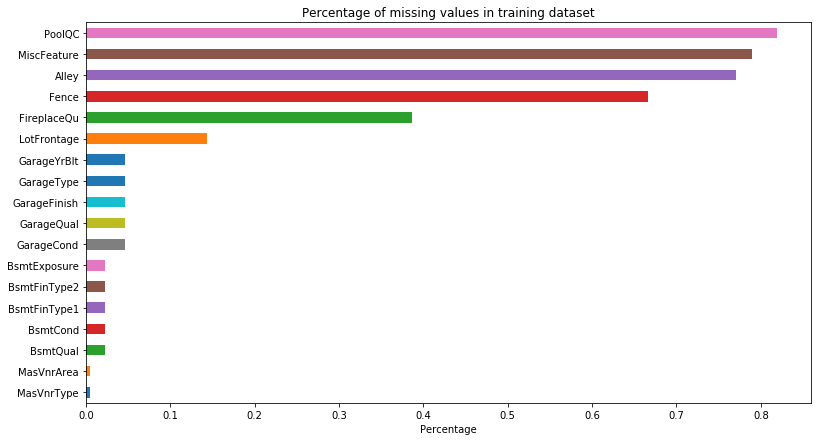

In [51]:
plt.figure(figsize=(13,7))
plt.title("Percentage of missing values in training dataset")
train_miss[train_miss>0].sort_values(ascending=True).plot(kind="barh")
plt.xlabel("Percentage")
plt.show()

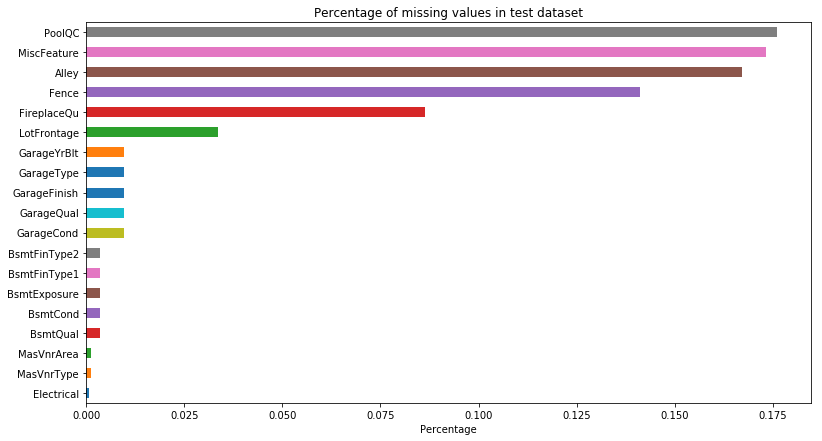

In [52]:
plt.figure(figsize=(13,7))
plt.title("Percentage of missing values in test dataset")
test_miss[test_miss>0].sort_values(ascending=True).plot(kind="barh")
plt.xlabel("Percentage")
plt.show()

<div class="alert alert-warning">

In addition to the data visualisation done in <b>Approach#1</b>, we will explore the data more.<br>
Let's start by plotting the Sale Price</div>

Text(0.5,1,'Distribution Plot of SalePrice')

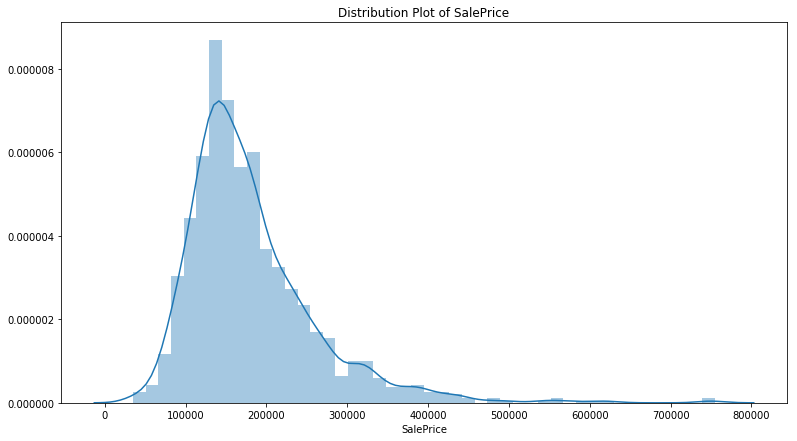

In [55]:
plt.figure(figsize=(13,7))
sns.distplot(y)
plt.title("Distribution Plot of SalePrice")

<div class="alert alert-warning">

We see here that the SalePrice is skewed and has a peak value. This mean more people tend to buy houses which are not expensive and a few people buy expensive houses.<br>
Let's check its <b><a href = "https://www.youtube.com/watch?v=Pf7awGwzy4k">Kurtosis</a></b> and <b><a href="https://www.youtube.com/watch?v=z3XaFUP1rAM">Skewness</a></b>.<br>
To simply put it, a higher kurtosis means that the distribution has fat tails compared to a standard normal distribution.<br>
A Positive skeweness means that the distribution is positively skewed,i.e., the tail is located to the right.
</div>

In [56]:
print("Kurtosis: %f" %y.kurt())
print("Skewness: %f" %y.skew())

Kurtosis: 7.033907
Skewness: 1.967215


<div class="alert alert-warning">
Apparently, many people tend to take the log of right skewed depenedent variables and work with it and then use the exponentiation function to get the result.<br>
We will do so and compare both ways to see which is better.
</div>

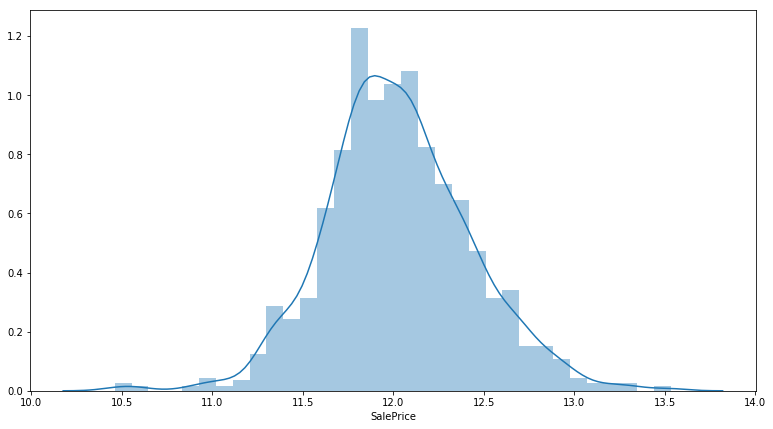

Kurtosis: 0.888850
Skewness: 0.132714


In [57]:
plt.figure(figsize=(13,7))
log_y=np.log(y)
sns.distplot(log_y)
plt.show()
print("Kurtosis: %f" %log_y.kurt())
print("Skewness: %f" %log_y.skew())

<div class="alert alert-warning">
We can see that the data has become more uniform.<br>
We will now study numerical and categorical features.<br>
Let's write a function that extracts the numerical and categorical features.
</div>

In [58]:
def get_features(train):
    #select all numerical feature names
    numerical_features=train.select_dtypes(include=np.number).columns

    #select all categorical feature names
    categorical_features=train.select_dtypes(exclude=np.number).columns
    
    return numerical_features,categorical_features

In [59]:
numerical_features,categorical_features=get_features(train)

<div class="alert alert-warning">
We begin with numerical features. We will  study each one by plotting distribution of each and a scatter plot against the SalePrice.<br>
Let's begin with the distribution plot.</div>

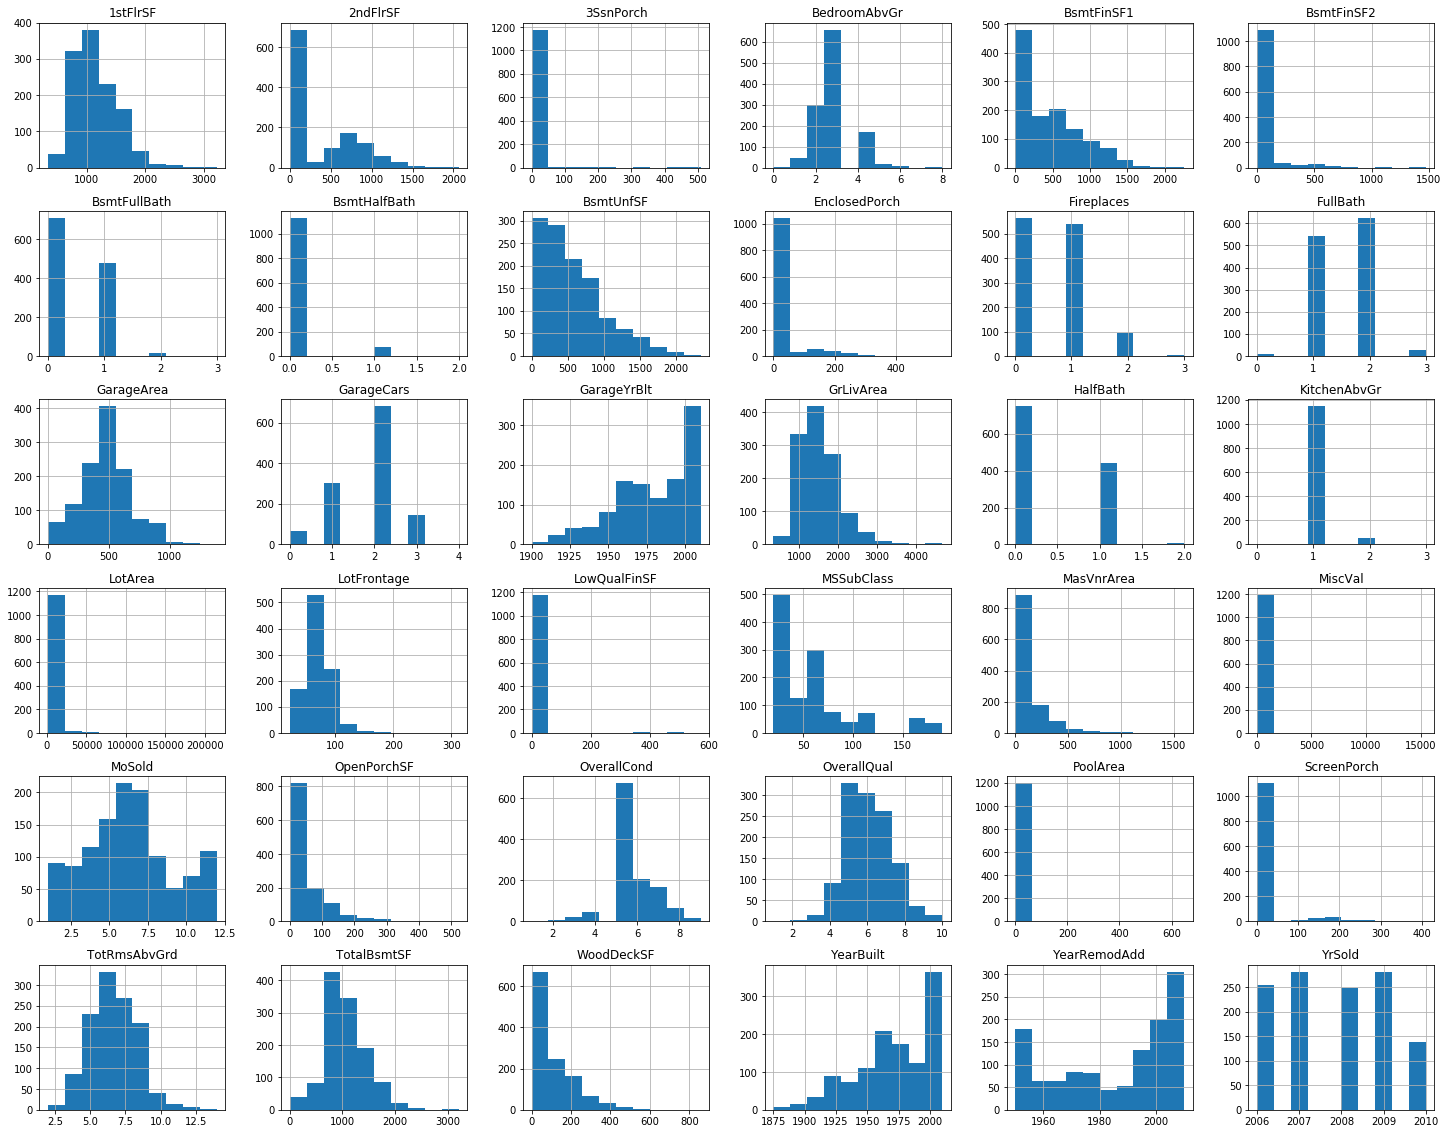

In [60]:
train.hist(figsize=(25,20))
plt.show()

<div class="alert alert-warning">
A few remarks:<br>
<ul> <li> We have some features such as <b>Garage Cars</b>  that seem to have a certain dominant value over the other values. A suggestion here might be to replace this dominant values by a "1" and all others by a "0".</li>
<li>It might be a good idea to sum all features related to a house area into one feature that denotes the total house area. </li>
<li> The <b>YrSold</b> variable seems to have nearly the same number of houses sold in all years except for <b>2010</b>. That was probably due to the <a href="https://www.statista.com/statistics/219963/number-of-us-house-sales/">financial crisis</a> that hit the world. We might encode it as a cat egorical variable with a value of "1" for years where sold houses are in 2010 and 0 for years which houses were not sold in 2010.</li>
<li> The <b>GarageYrBuilt</b> and the <b>YearBuilt</b> features are somehow similar. Usually,one builds the house along with the garage. It seems reasonable here to drop one of these variables as they are redundant.</li>
<li>The <b>MiscVal</b> feature seems useless as most of the data is 0 and it would be a good idea to drop the feature.</li>
<li>A lot of houses don't seem to have pools</li>
<li>It might be a good idea to sum features corresponding to the number of rooms,number of kitchens,number of bedrooms,and number of baths into one feature</li></ul><br>
We will tackle these in the <i>Feature Engineering and Selection</i> part.<br><br>
Now let's plot scatter plots between each numerical features and the SalePrice variable.
<br>As garage cars increase,garage area increases.</div>

In [61]:
#dictionary contraing features name as keys and correlation with sale price as value
corr_dict=train[numerical_features].corrwith(y).sort_values(ascending=False).to_dict()

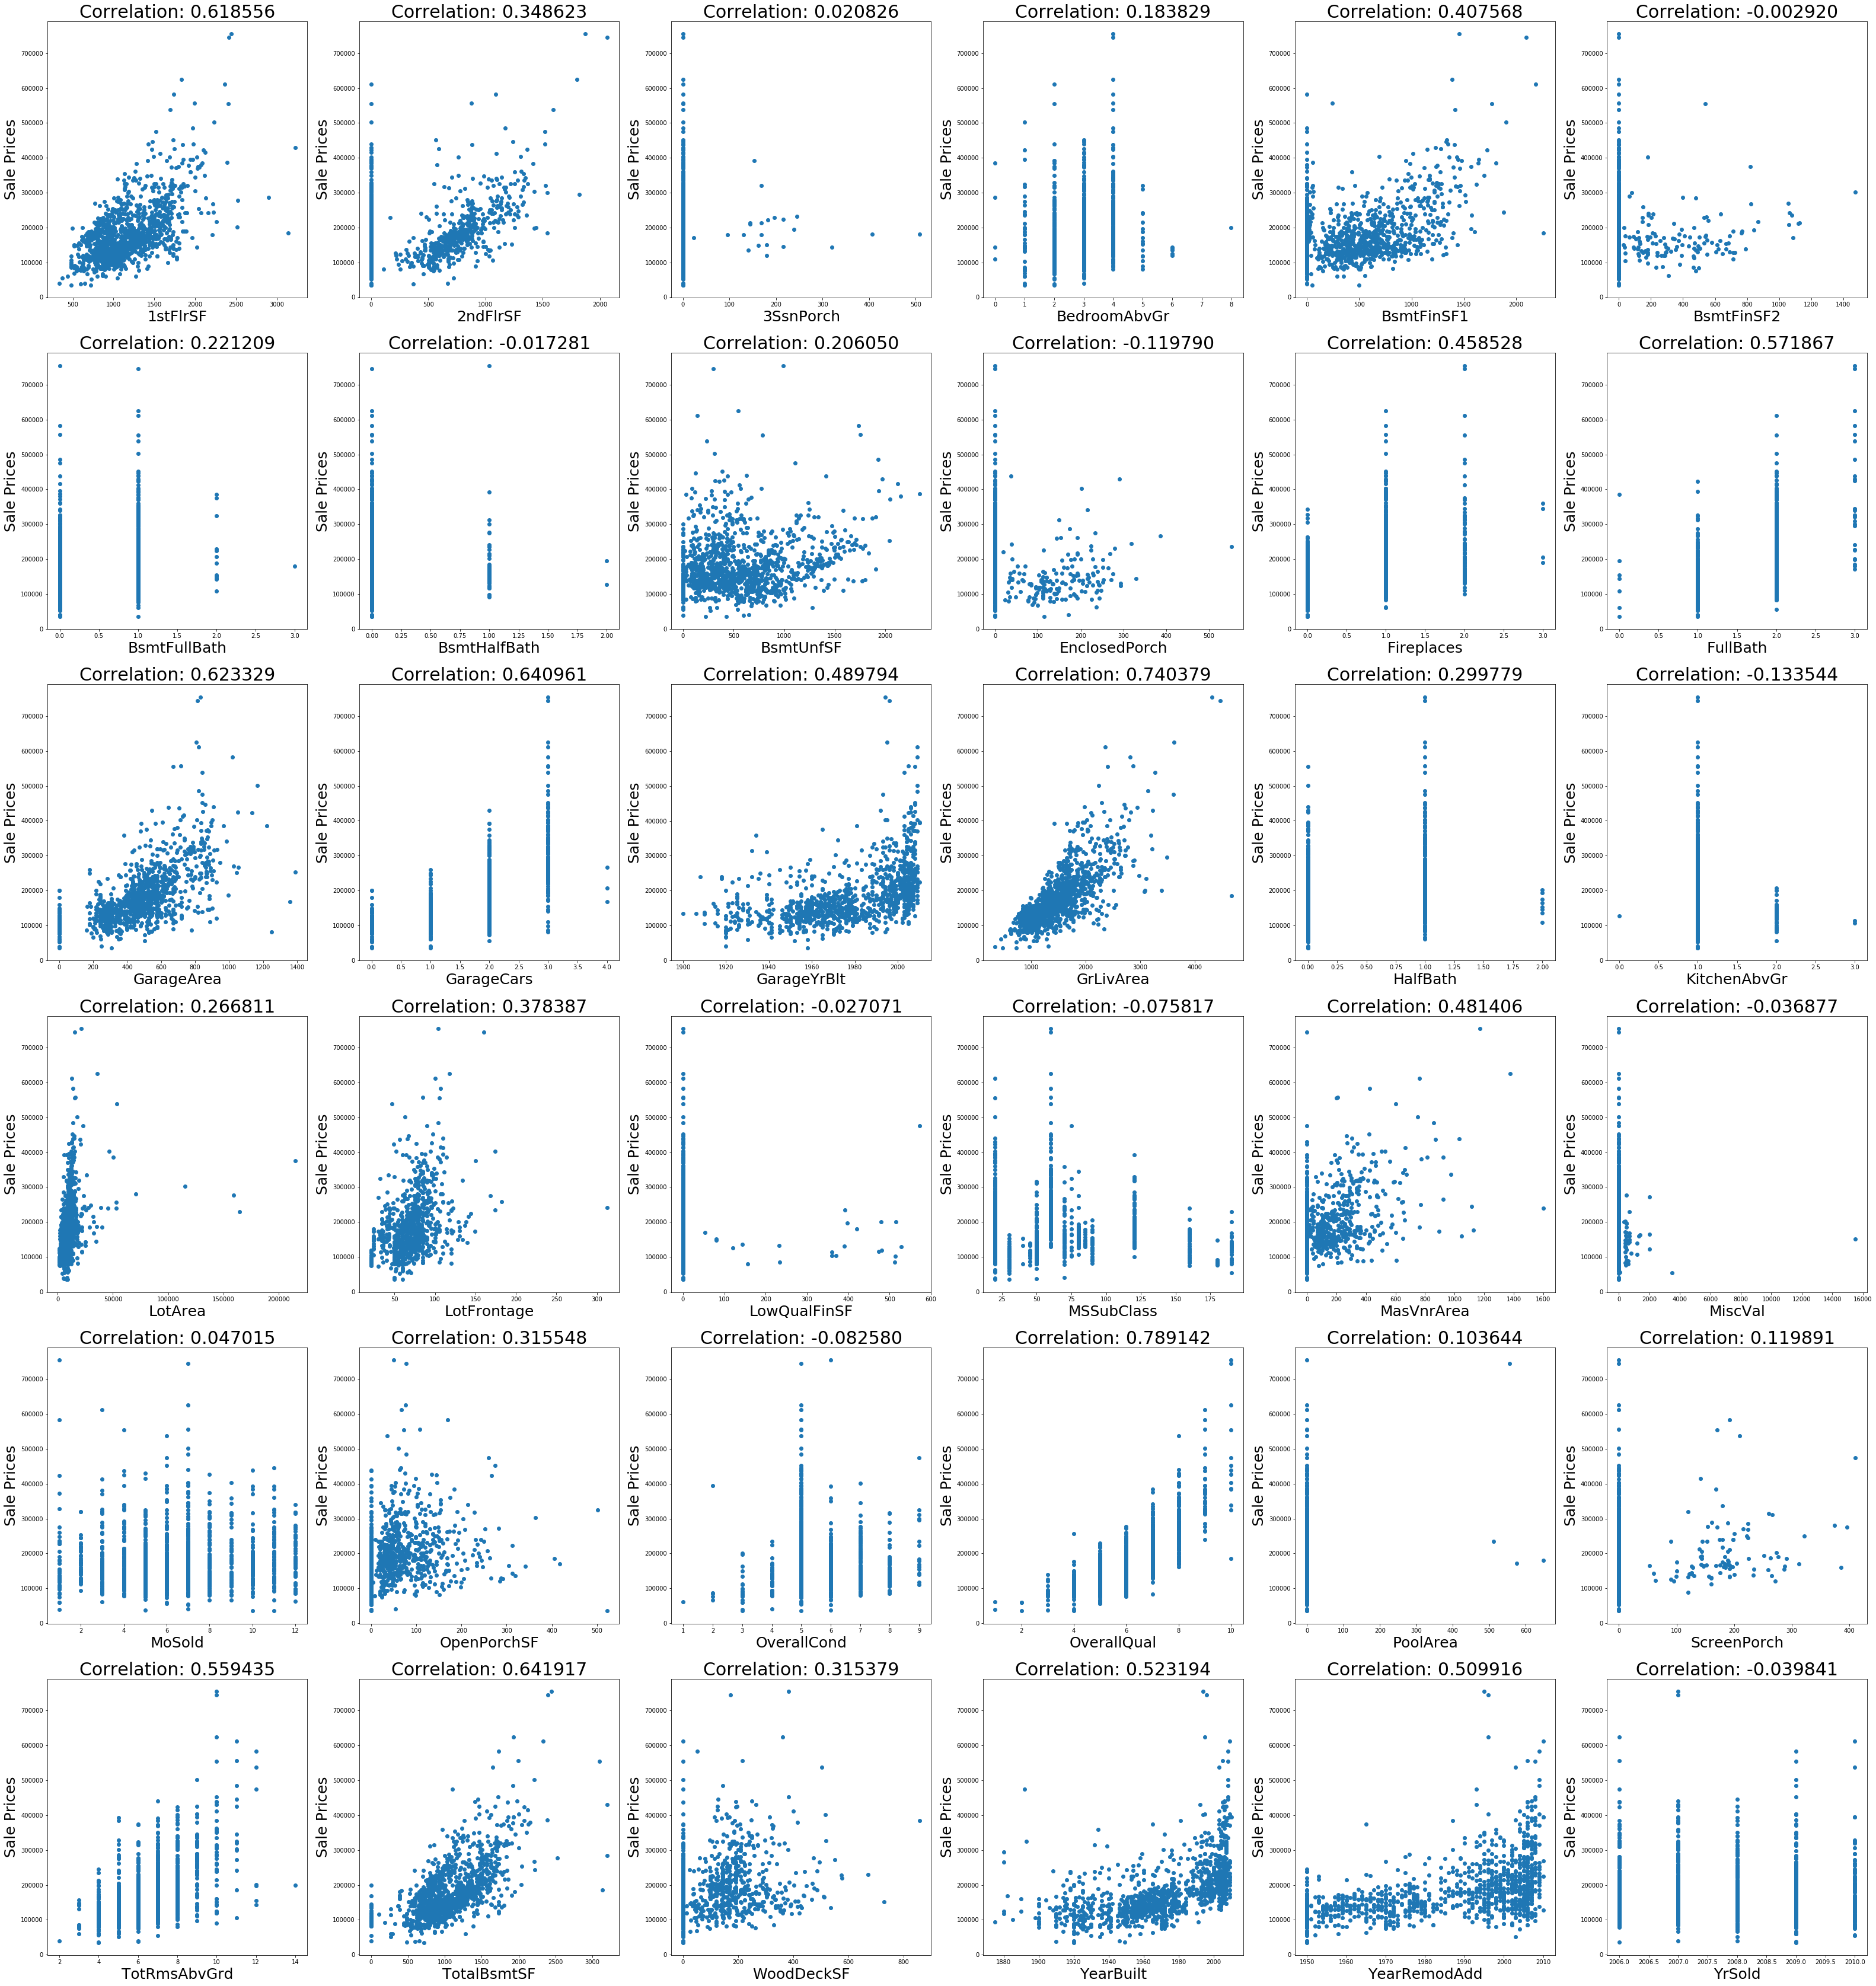

In [62]:
#graphs are sorted by alphabetical order of the feature names
i=1
plt.figure(figsize=(55, 60))
for k in sorted(corr_dict):
    plt.subplot(6,6,i)
    plt.scatter(train[k],y)
    plt.title("Correlation: %f" %corr_dict[k],fontsize=30)
    plt.xlabel(k,fontsize=25)
    plt.ylabel("Sale Prices",fontsize=25)
    i+=1

<div class="alert alert-warning">
A few remarks:<br>
<ul><li> There are some outliers in features such as <b>GrLivArea and TotalBsmtSF</b>. We should consider removing them. </li>
<li>   There are features such as <b>BsmtFinSF2</b> that have near zero correlation.  In the previous approach, we removed such low corrleations. In this approach, we will keep a few of them and try to generate some useful features that might help us.</li>
</ul></div>

<div class="alert alert-warning">
To finish visualisation of numerical features,let us plot a heat map to see correlations between the features.
</div>

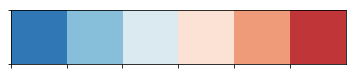

In [63]:
#tryong colors for heat map
sns.palplot(sns.color_palette("RdBu_r", 6))


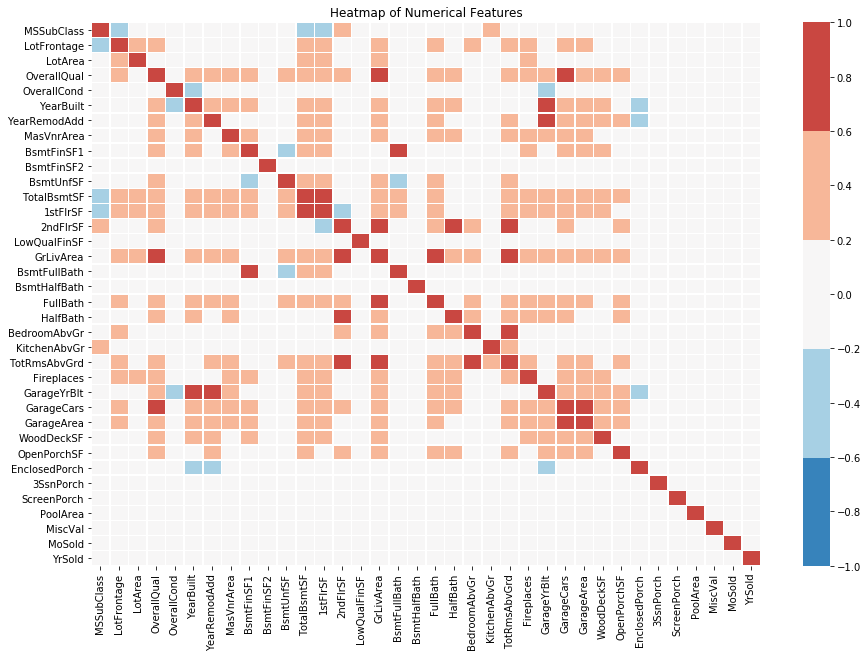

In [79]:
plt.subplots(figsize=(15,10))
ax=sns.heatmap(train.corr(),cmap=sns.color_palette("RdBu_r", 5),linewidths=.5,vmin=-1,vmax=1)
cbar = ax.collections[0].colorbar
cbar.set_ticks(np.arange(-1,1.1,0.2))
plt.title("Heatmap of Numerical Features")
plt.show()

<div class="alert alert-warning">
We see that we have a lot of correlations between -0.2 and 0.2.<br> There also exists some nearly perfect corrleations between some features.<br>
We will now study categorical features and then try to find best features to match our data.
</div>

<div class="alert alert-warning">
We now study categorical features.</div>

In [80]:
i=1
plt.figure(figsize=(80, 350))
for cat in sorted(categorical_features):
    plt.subplot(22,2,i)
    
    #this is just for the xlabels to not overlap
    if(cat=="Neighborhood"):
        plt.xticks(rotation=30)
        
    
    #stripplot generalizes scatter to categorical variables
    sns.stripplot(train[cat],y)
    plt.xlabel(cat,fontsize=30)
    plt.ylabel("Sale Prices",fontsize=30)
    plt.xticks(fontsize=27)
    plt.yticks(fontsize=27)
    i+=1

<div class="alert alert-warning">

<ul>
<li>Obviously,we have missing values by looking at the feature <b>PoolQC</b>. We will deal with those in the next section.</li>
<li>Most of the data in the feature <b>Utilities</b> is dominated by a single value and we could consider removing it. Usually,people buy a house equiped with all the utilities.(Electricity, Water, Gas, and Sewer)</li>
</ul><br>
We will now impute the missing data.
</div>

<div class="alert alert-success">
<h1>Data Cleaning</h1>
</div>

<div class="alert alert-warning">
Let's see how much missing values we have for numerical features in the train and test dataset.
</div>

In [81]:
miss_train=train.isna().sum().sort_values(ascending=False)
miss_train[miss_train>0]

PoolQC          1196
MiscFeature     1153
Alley           1125
Fence            973
FireplaceQu      564
LotFrontage      210
GarageType        67
GarageFinish      67
GarageQual        67
GarageCond        67
GarageYrBlt       67
BsmtExposure      33
BsmtFinType2      33
BsmtCond          32
BsmtFinType1      32
BsmtQual          32
MasVnrArea         6
MasVnrType         6
dtype: int64

In [82]:
miss_test=test.isna().sum().sort_values(ascending=False)
miss_test[miss_test>0]

PoolQC          257
MiscFeature     253
Alley           244
Fence           206
FireplaceQu     126
LotFrontage      49
GarageCond       14
GarageType       14
GarageYrBlt      14
GarageFinish     14
GarageQual       14
BsmtFinType1      5
BsmtExposure      5
BsmtCond          5
BsmtQual          5
BsmtFinType2      5
MasVnrArea        2
MasVnrType        2
Electrical        1
dtype: int64

<div class="alert alert-warning">
Let's combine the train and test set so that we can clean thier data together.
</div>

In [83]:
#used to slice test from train
index=train.shape[0]

In [84]:
index

1200

In [85]:
full=pd.concat([train,test],ignore_index=True)


<div class="alert alert-warning">
Let's start with numerical features.
</div>

In [86]:
miss_full=full[numerical_features].isna().sum().sort_values(ascending=False)
miss_full=miss_full[miss_full>0]
miss_full

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

In [87]:
miss_full_cols=miss_full.index

In [185]:
pandas_profiling.ProfileReport(full[miss_full_cols])

<div class="alert alert-warning">
For the feature <b>GarageYrBlt</b>, we have some missing values. What we will do now is fill the missing values by zero since this means that these houses have no garage. We will experiment later on with other approaches such as removing the rows or filling them with the mode.<br> 
But before that,let's look more at the <b>GarageYrBlt</b> feature.
We have that the minimum value for the feature "GarageYrBuilt" is 1900 whereas the minimum value for  "YearBuilt" is 1872. That seems weird. Investigating more in the feature we observe that:
<ul><li>We have some rows where the garage was built many years after the house was built. This seems fine as the house might have been passed along many generations and one of those generations decided to buy a car and thus build a garage.</li>
    <li>We have some rows where the garage was built before the house was built. Although this might seem strange,but if we started building a house and a garage,the garage clearly will be finished earlier than the house, so the year where the garage was finished must be less than that when the house was finished.</li></ul><br>
    
</div>

In [88]:
full[full.YearBuilt==1880][['YearBuilt','GarageYrBlt']]

YearBuilt  GarageYrBlt
304        1880       2003.0
630        1880       1937.0
747        1880       1950.0
1132       1880       1930.0

In [89]:
full[full.GarageYrBlt<full.YearBuilt][['YearBuilt','GarageYrBlt']]

YearBuilt  GarageYrBlt
29         1927       1920.0
93         1910       1900.0
324        1967       1961.0
600        2005       2003.0
736        1950       1949.0
1103       1959       1954.0
1376       1930       1925.0
1414       1923       1922.0
1418       1963       1962.0

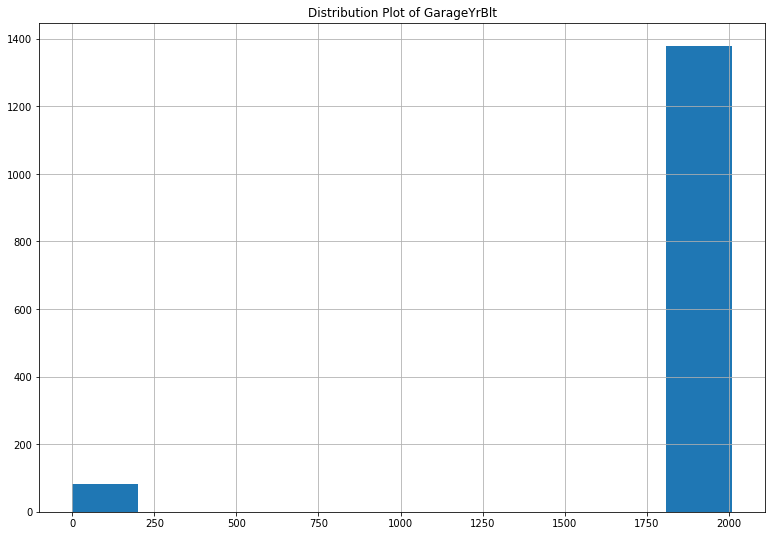

In [104]:
plt.figure(figsize=(13,9))
full.GarageYrBlt.hist()
plt.title("Distribution Plot of GarageYrBlt")
plt.show()

In [93]:
#fill missing values by 0
full.GarageYrBlt.fillna(0,inplace=True)

<div class="alert alert-warning">
For the feature <b>LotFrontage</b>,we are going to fill the missing values with the mode.
</div>

In [94]:
full.LotFrontage.fillna(full.LotFrontage.mode()[0],inplace=True)

<div class="alert alert-warning">
For the feature <b>MasVnrArea</b>, we will fill the missing values by zero as it is the most common element.
</div>

In [95]:
full.MasVnrArea.fillna(0,inplace=True)

<div class="alert alert-warning">
Before tackling categorical features,let us check that we don't have any missing values.
</div>

In [96]:
full[numerical_features].isnull().sum().sort_values(ascending=False)>0

YrSold           False
MoSold           False
GrLivArea        False
LowQualFinSF     False
2ndFlrSF         False
1stFlrSF         False
TotalBsmtSF      False
BsmtUnfSF        False
BsmtFinSF2       False
BsmtFinSF1       False
MasVnrArea       False
YearRemodAdd     False
YearBuilt        False
OverallCond      False
OverallQual      False
LotArea          False
LotFrontage      False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
WoodDeckSF       False
MiscVal          False
PoolArea         False
ScreenPorch      False
3SsnPorch        False
EnclosedPorch    False
OpenPorchSF      False
GarageArea       False
HalfBath         False
GarageCars       False
GarageYrBlt      False
Fireplaces       False
TotRmsAbvGrd     False
KitchenAbvGr     False
BedroomAbvGr     False
MSSubClass       False
dtype: bool

<div class="alert alert-warning">
Now it's time for the categorical variables. What we will do now is to replace every "nan" with "None" because when applying dummy enconding "None" is considered as a column while "nan" is not.
</div>

In [97]:
#number of missing values for categorical features
miss_full_cat=full[categorical_features].isna().sum().sort_values(ascending=False)
miss_full_cat=miss_full_cat[miss_full_cat>0]
miss_full_cat

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
dtype: int64

<div class="alert alert-warning">
Consulting the "Data description" file given,most categorical features that contain missing values correspond to not having that feature. For example,missing values for the feature "PoolQC" means that the house doesn't contain a pool.<br>
However,there is only one categorical feature that contains "nan" values and it shouldn't which is the "Electrical" feature<br>
Let's deal with it.
</div>

In [98]:
full["Electrical"].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [99]:
miss_full_cat['Electrical']

1

In [100]:
print("Unique Values for the feature Electrical:", full["Electrical"].unique())
print("Number of missing values for the feature Electrical:", miss_full_cat["Electrical"])
print("\n")


Unique Values for the feature Electrical: ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
Number of missing values for the feature Electrical: 1




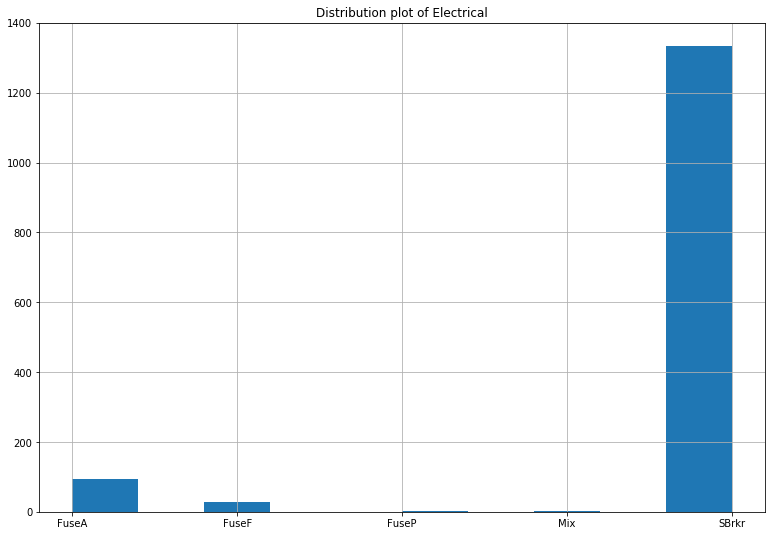

In [105]:
plt.figure(figsize=(13,9))
full.Electrical.hist()
plt.title("Distribution plot of Electrical")
plt.show()

In [106]:
full[full.Electrical.isnull()>0]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1379          80       RL         73.0     9735   Pave   NaN      Reg   

     LandContour Utilities LotConfig      ...       ScreenPorch PoolArea  \
1379         Lvl    AllPub    Inside      ...                 0        0   

     PoolQC Fence MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
1379    NaN   NaN         NaN       0       5    2008        WD         Normal  

[1 rows x 79 columns]

<div class="alert alert-warning">
Since the number of missing data is small,it doesn't hurt fill it with the most common element "SBrkr".
</div>

In [107]:
full.Electrical.fillna('SBrkr',inplace=True)

<div class="alert alert-warning">
Now having finished all this we can proceed for feature engineering.
</div>

<div class="alert alert-success">
<h1>Feature Engineering and Selection</h1>
</div>

<div class="alert alert-warning">
Let's start with the numerical features.<br>
Let's replace the features that have to do with house area with one feature corresponding to the totalSF.
</div>

<div class="alert alert-warning">
Let's have a look at the the features related to basement area.<br> We have the features BsmtFinSF1,BsmtFinSF2, BsmtUnfSF, and TotalBsmtSF.<br>It wouldn't be a surprise if the sum of the first three features is equal to data in TotalBsmtSF.<br>
Let's see!
</div>

In [108]:
#sum all basement area
bsmtsum=full.BsmtFinSF1+full.BsmtFinSF2+full.BsmtUnfSF

In [109]:
#compare to total sum
bsmtsum.equals(full.TotalBsmtSF)

True

<div class="alert alert-warning">
This means that we can drop the 3 features and keep only the TotalBsmtSF feature!
</div>

In [110]:
full.shape

(1460, 79)

In [111]:
full.drop('BsmtFinSF1',axis=1,inplace=True)
full.drop('BsmtFinSF2',axis=1,inplace=True)
full.drop('BsmtUnfSF',axis=1,inplace=True)

<div class="alert alert-warning">
Now let's look at the area of the house. The feature GrLivArea  is the area above ground.
<br>Let's try to sum some features and see. 
</div>

In [112]:
(full['1stFlrSF']+full['2ndFlrSF']+full.LowQualFinSF).equals(full.GrLivArea)

True

<div class="alert alert-warning">
It seems that the sum of <b>1stFlrSF, 2ndFlrSF, and LowQualFinSF</b> equals the <b>GrLivArea</b> feature.<br>
We can keep only the <b>GrLivArea</b> and drop the others.
</div>

In [113]:
full.drop('LowQualFinSF',axis=1,inplace=True)
full.drop('1stFlrSF',axis=1,inplace=True)
full.drop('2ndFlrSF',axis=1,inplace=True)


<div class="alert alert-warning">
Let's look at the porches.
</div>

In [114]:
(full['3SsnPorch']+full.EnclosedPorch+full.OpenPorchSF+full.ScreenPorch).iloc[:index].corr(y)

0.19782953308159243

<div class="alert alert-warning">
We still have these raw features left: <b>3SsnPorch,EnclosedPorch,GarageArea,LotArea,MasVnrArea,OpenPorchSF,PoolArea,ScreenPorch,WoodDeckSF.</b>
We will leave them for now.<br>
Let's drop useless features such <b>MiscVal</b>.</div>

In [115]:
full.drop('MiscVal',axis=1,inplace=True)

<div class="alert alert-warning">
Now off to categorical features.<br>
Let's plot histograms of each feature.
</div>

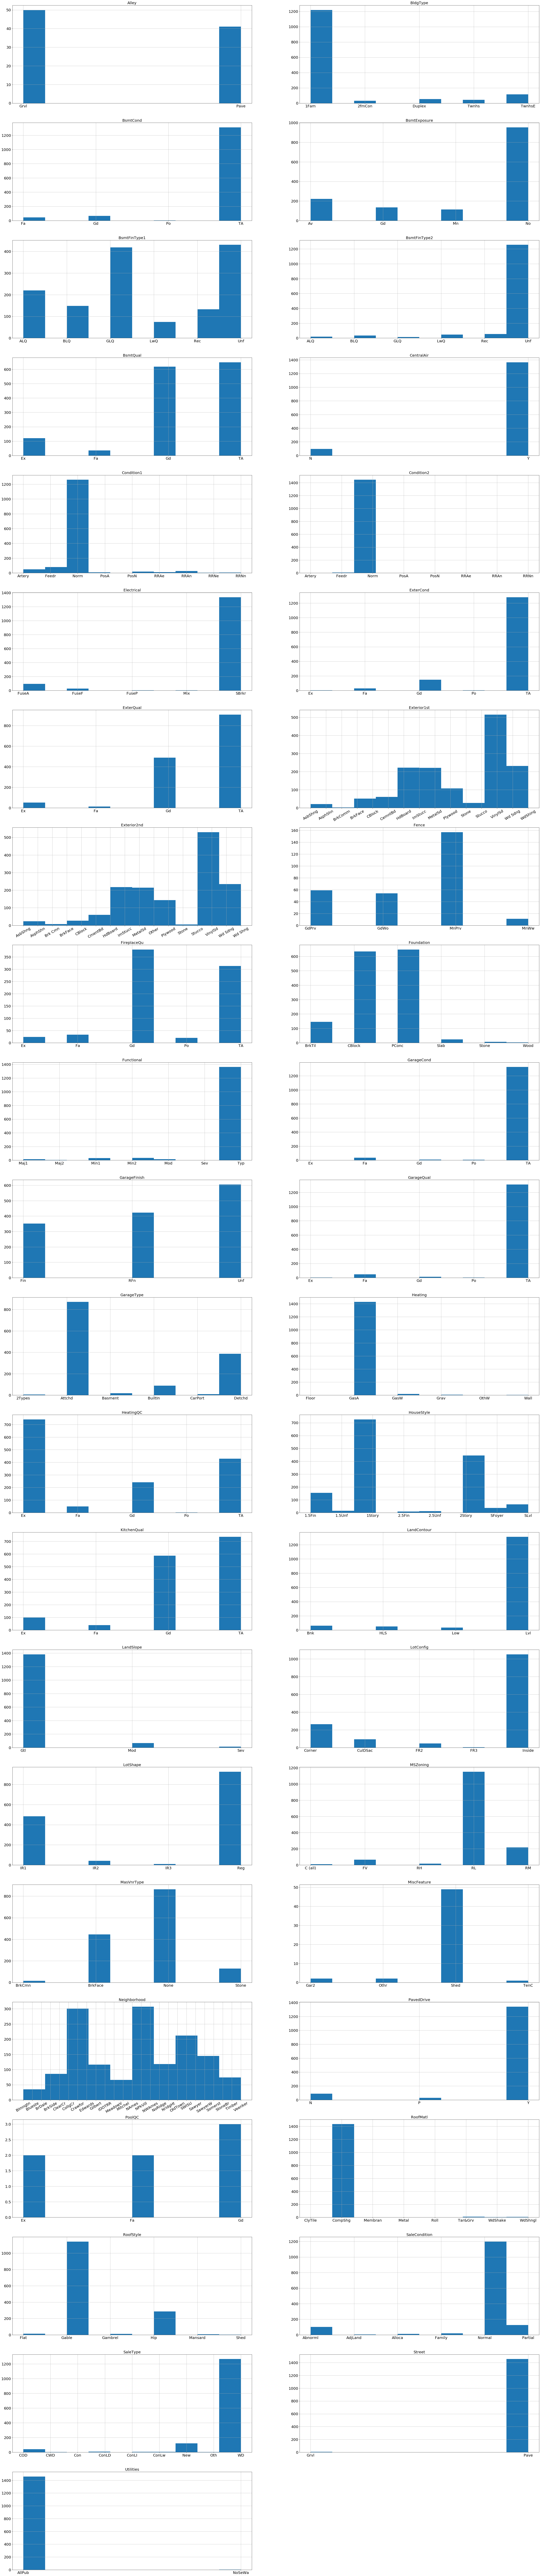

In [119]:
i=1
plt.figure(figsize=(50, 250))
for cat in sorted(categorical_features):
    plt.subplot(22,2,i)

    
    #this is just for the xlabels to not overlap
    if(cat in ["Neighborhood","Exterior1st","Exterior2nd"]):
        plt.xticks(rotation=30)    
    

    full[cat].hist()
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("{}".format(cat),size=20)

    #plt.show()
    i+=1

<div class="alert alert-warning">
<b>Exterior1st</b> looks much like <b>Exterior2nd</b> so it is safe to remove one of them.
</div>

In [120]:
full.drop('Exterior1st',axis=1,inplace=True)

<div class="alert alert-warning">
We can remove Utilities because nearly all values are the same and that doens't help us much.
</div>

In [121]:
full.drop('Utilities',axis=1,inplace=True)

In [122]:
full.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
GarageType         81
GarageCond         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtCond           37
BsmtQual           37
BsmtFinType1       37
MasVnrType          8
LandSlope           0
LotConfig           0
MSZoning            0
LotFrontage         0
LotArea             0
Foundation          0
ExterCond           0
ExterQual           0
MasVnrArea          0
Exterior2nd         0
RoofMatl            0
RoofStyle           0
YearRemodAdd        0
YearBuilt           0
OverallCond         0
                 ... 
HeatingQC           0
TotalBsmtSF         0
Fireplaces          0
YrSold              0
MoSold              0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
GarageArea          0
GarageCars          0
GarageYrBl

<div class="alert alert-warning">
Now let's fill the missing values by "None".</div>

In [123]:
full.fillna("None",inplace=True)

<div class="alert alert-warning">
What we will do now is hot encode the data. We will try with removing one columns of each dummy variable to avoid the dummy trap just for experimenting</div>

In [124]:
full_wd=full.copy() #wd=with droping first dummy variable column
full_wod=full.copy()#wod=without dropping first dummy variable column

In [125]:
#dummy encode
full_wd=pd.get_dummies(full_wd)
full_wod=pd.get_dummies(full_wod,drop_first=True)

In [126]:
#split to train and test
train_wd=full_wd.iloc[:index,:]
test_wd=full_wd.iloc[index:,:]

In [127]:
#split to train and test
train_wod=full_wod.iloc[:index,:]
test_wod=full_wod.iloc[index:,:]

<div class="alert alert-success">
<h1>Training Time</h1>
</div>

In [128]:
from sklearn.cross_validation import cross_val_score
def model_score(model,mtrain,y,cv=50):
    #mse are by default negative in sklearn
    mse=-cross_val_score(model,mtrain,y,cv=cv,scoring='neg_mean_squared_error')
    rmse=np.sqrt(mse)
    average_rmse=np.mean(rmse)
    std=np.std(rmse)
    #print(rmse)
    print("The average RMSE is: %f with a standard deviation of %f." %(average_rmse,std))

<div class="alert alert-warning">
We will try several models.</div>

In [129]:
#linear regressor: train_wd+log_y
lm1=LinearRegression()
lm1.fit(train_wd,log_y)
model_score(lm1,train_wd,log_y)

The average RMSE is: 0.137537 with a standard deviation of 0.057180.


In [130]:
#linear regressor: train_wod+log_y
lm2=LinearRegression()
lm2.fit(train_wod,log_y)
model_score(lm2,train_wod,log_y)

The average RMSE is: 0.133158 with a standard deviation of 0.051099.


<div class="alert alert-warning">
Logging output variable and removing dummy variable seems to work best.
</div>

In [131]:
#random forest: train_wod+log_y
rlf=RandomForestRegressor()
rlf.fit(train_wod,log_y)
model_score(rlf,train_wod,log_y)

The average RMSE is: 0.149585 with a standard deviation of 0.036118.


In [132]:
#random forest: train_wd+log_y
rlf2=RandomForestRegressor()
rlf2.fit(train_wd,log_y)
model_score(rlf2,train_wd,log_y)

The average RMSE is: 0.149487 with a standard deviation of 0.038988.


<div class="alert alert-warning">
We will now use <b>XGBoost</b> which is a kind of <a href="http://xgboost.readthedocs.io/en/latest/model.html">boosted trees</a>.
</div>

In [133]:
#XGBoost: train_wod+log_y
xgb=XGBRegressor()
xgb.fit(train_wod,log_y)
model_score(xgb,train_wod,log_y)

The average RMSE is: 0.129749 with a standard deviation of 0.038742.


In [134]:
#XGBoost: train_wdd+log_y
xgb=XGBRegressor()
xgb.fit(train_wd,log_y)
model_score(xgb,train_wd,log_y)

The average RMSE is: 0.129172 with a standard deviation of 0.038268.


<div class="alert alert-danger">

Our approach this time produced better results.<br>
However we seek an even less RMSE.<br>
Aside from the models,the decisive factor for a lower RMSE is choosing the right features and we didn't do a logical plan to choose them in this approach.We fix this in the following approach.</div>

<div class="alert alert-success">

<h1>  Approach #3</h1>
</div>


<div class="alert alert-warning">
Let us first execute the essential starting code.
</div>

In [135]:
train,test=import_data()

#get IDs
train_ID=train.Id
test_ID=test.Id

#get SalePrices
y=train.SalePrice

#drop the unwanted columns
train.drop(['Id','SalePrice'],axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

#log the target
log_y=np.log(y)

numerical_features,categorical_features=get_features(train)

#combine train and test data
full=pd.concat([train,test],ignore_index=True)




<div class="alert alert-warning">
We did some data visualisation in previous approaches and thus won't do it here.<br>
We will directly work with data cleaning and feature selection. Let's look again at the missing values for numerical and categorcal features.<br>
Let's start with numerical features.
</div>

In [136]:
num_miss=full[numerical_features].isna().sum().sort_values(ascending=False)
num_miss[num_miss>0]

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

<div class="alert alert-warning">
We have only 3 numerical features that have missing values.<br>Let's look at each one separately.<br>
<b>LotFrontage</b> is the linear feet of street connected to property. <br>
Usually, houses in the same neighborhood have their Lot Frontage values very close as seen below. So we will compute the average LotFrontage for each neighborhood and fill the missing values by the average.<br>
For example,the average <b>Lot Frontage</b> for the <b>Neighborhood</b> <b>Blmngtn</b> is <b>47.142857</b>,so we will fill each row that has <b>Blmngtn</b> as a <b>Neighborhood</b> and has a missing value for  <b>Lot Frontage</b>  by this average. Ofcourse,we are going to round this value as all values in <b>LotFrontage</b> are integers.
</div>

In [137]:
df=full[['LotFrontage','Neighborhood']]

In [138]:
neighb=df.Neighborhood.unique()

In [139]:
neighb

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

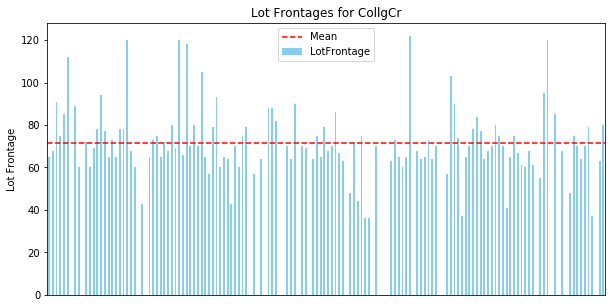

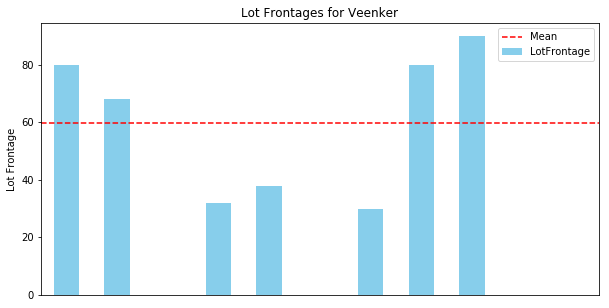

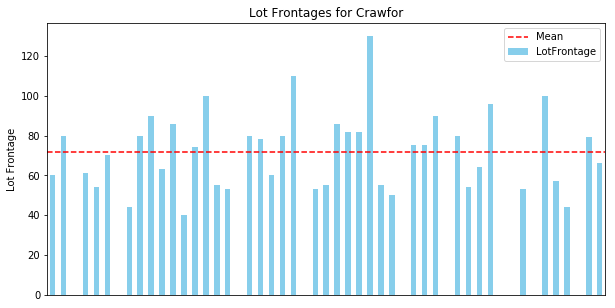

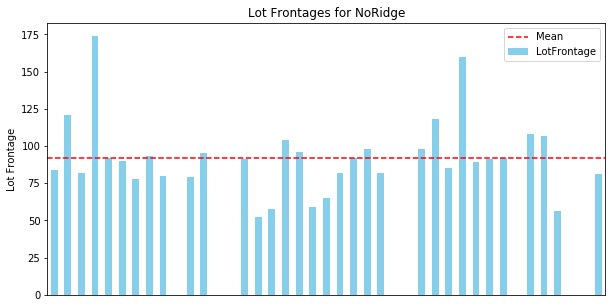

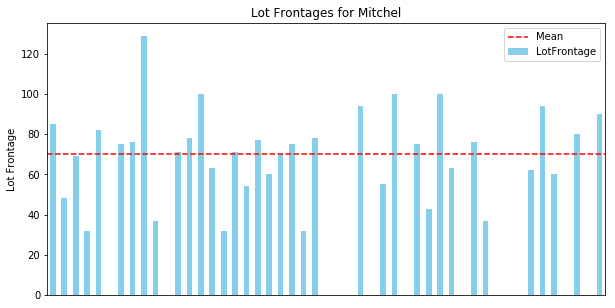

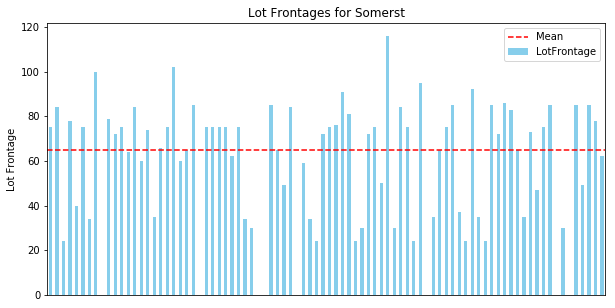

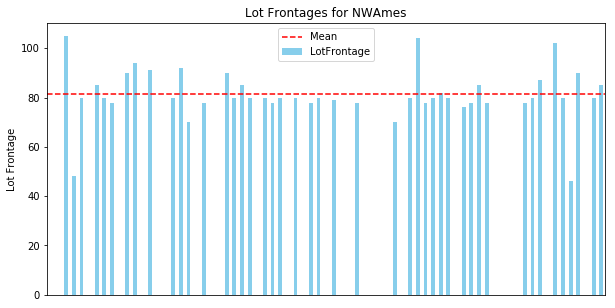

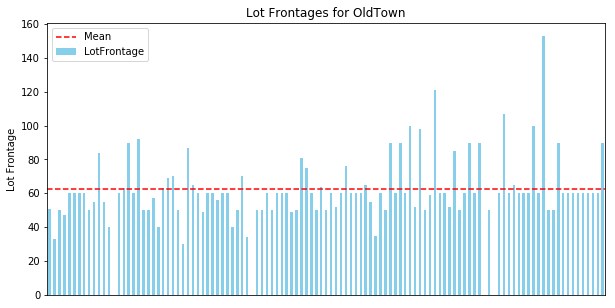

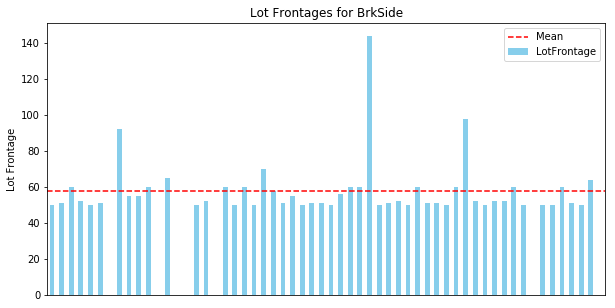

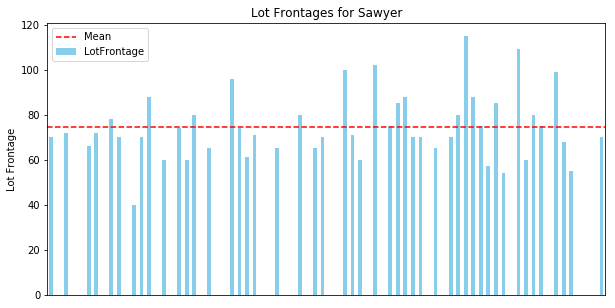

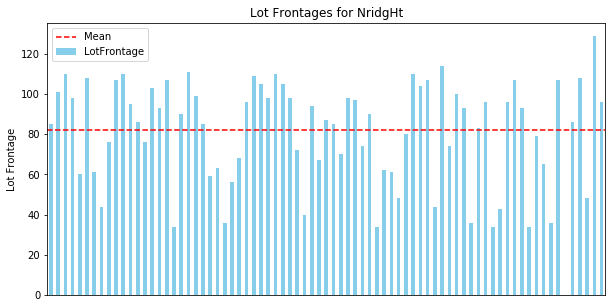

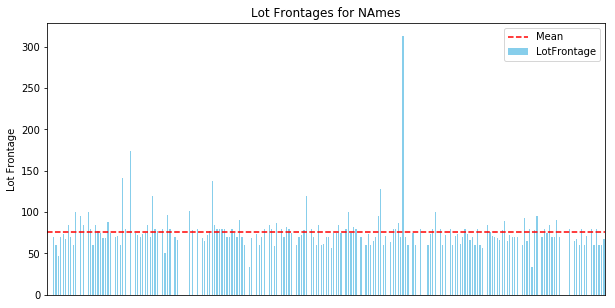

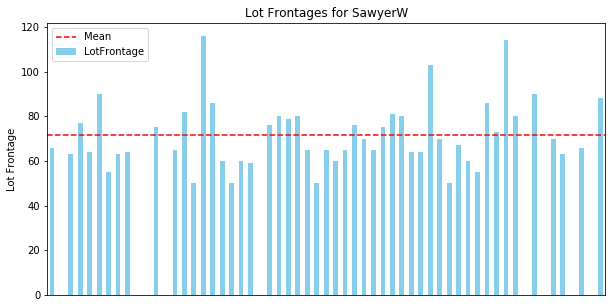

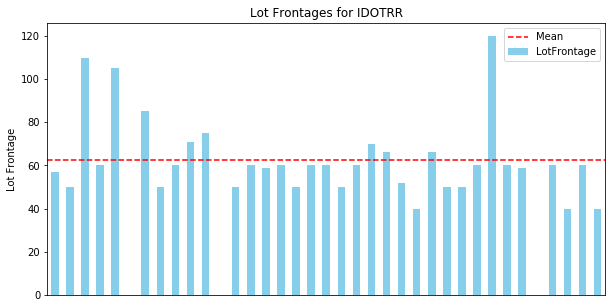

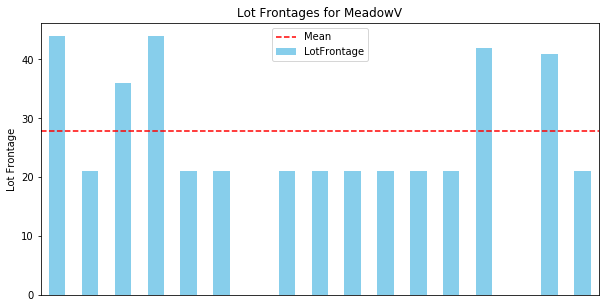

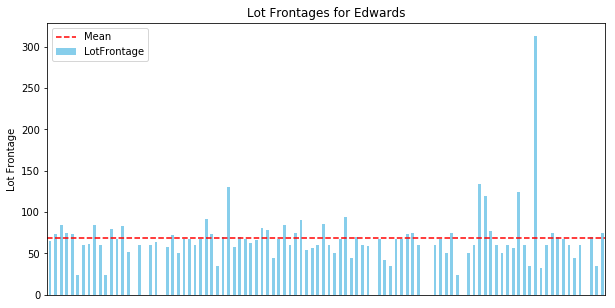

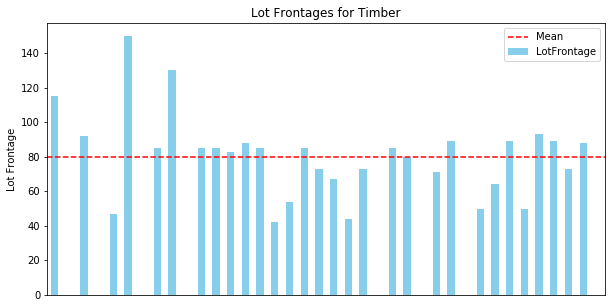

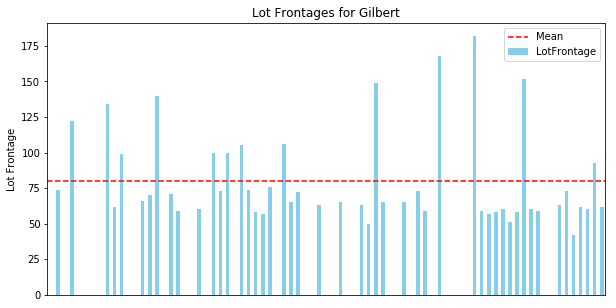

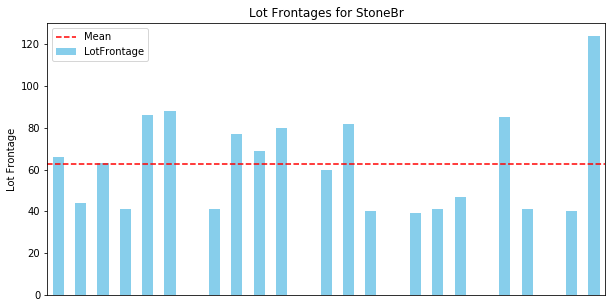

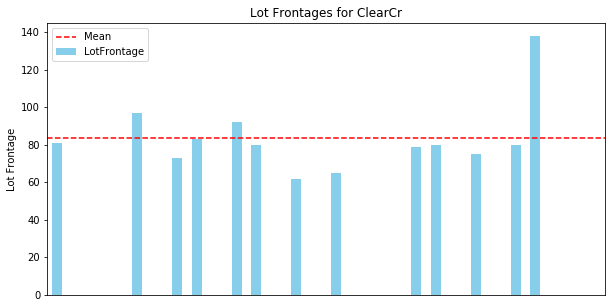

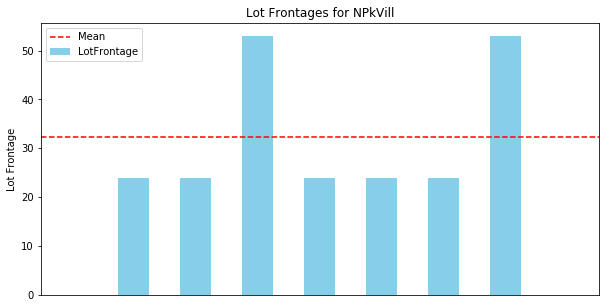

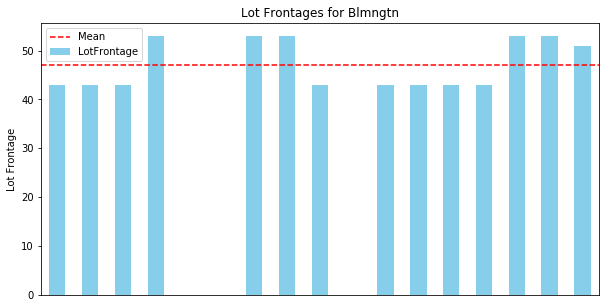

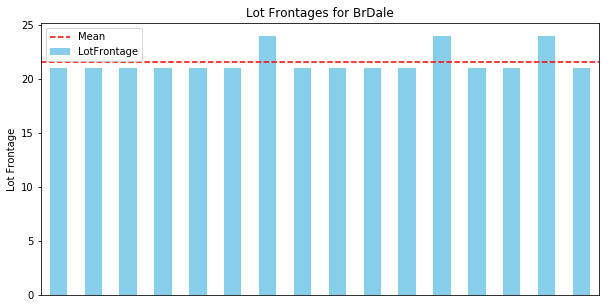

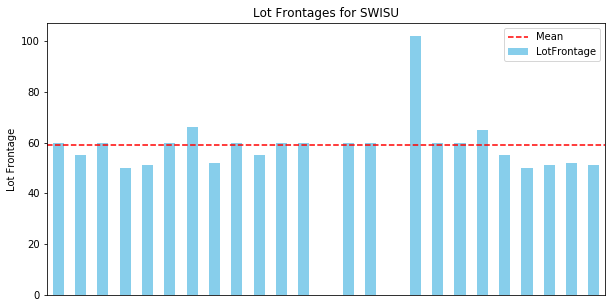

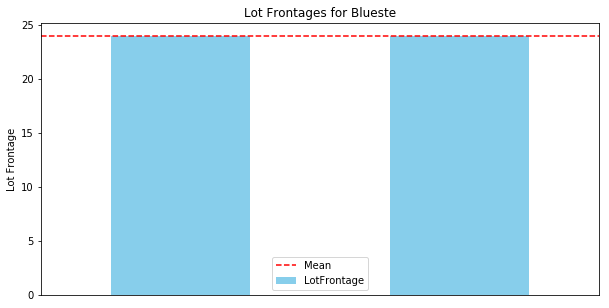

In [140]:
for n in neighb:
    df[df.Neighborhood==n].plot.bar(figsize=(10,5),xticks=None,color = "skyblue")
    plt.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off') 
    plt.title("Lot Frontages for %s" %n)
    plt.axhline(y=df[df.Neighborhood==n].mean()[0], color='r', linestyle='--',label='Mean')
    plt.ylabel("Lot Frontage")
    plt.legend()




<div class="alert alert-warning">
As we can see, usually most of the houses have their <b>Lot Frontage</b> close to the mean,so it seems a good value to fill the missing value with.<br>
Let's now fill the missing values with the average of each neighborhood.
</div>

In [141]:
full.LotFrontage=full.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(round(x.mean())))

In [142]:
#check for missing values
full.LotFrontage.isna().sum()

0



<div class="alert alert-warning">
We now have to deal with the other 2 numerical variables.<br>
Let's start with <b>GarageYrBlt</b>.
These houses don't have garages so it seems logical that for these houses all features that have to do with garages are null.<br>
Let's check.
</div>

In [143]:
garage_features=[n  for n in full.columns if 'Garage' in n]
garage_features


['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond']

In [144]:
full[garage_features].isna().sum()

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCars       0
GarageArea       0
GarageQual      81
GarageCond      81
dtype: int64



<div class="alert alert-warning">
All garage features have the same number of missing values except for <b>Garage Cars</b> and <b>Garage Area</b>.<br>
Their values should sum to zero since if they don't have any garage than their garage cars and area must be zero. Also,their count should be 81.<br>Let us check.
</div>

In [145]:
full[full.GarageType.isna()].GarageCars.sum()

0

In [146]:
full[full.GarageCars==0].shape[0]

81

In [147]:
full[full.GarageType.isna()].GarageArea.sum()

0

In [148]:
full[full.GarageArea==0].shape[0]

81



<div class="alert alert-warning">
Also, we need to check that the 81 missing values of the garage features correspond to the same entries.
</div>

In [149]:
full.GarageType.isna().equals(full.GarageYrBlt.isna())

True

In [150]:
full.GarageType.isna().equals(full.GarageCond.isna())

True

In [151]:
full.GarageType.isna().equals(full.GarageQual.isna())

True



<div class="alert alert-warning">
Now let us discuss a procedure for filling the  <b>GarageYrBlt</b> feature.<br>
These houses don't have a garage so it would be useless to specify a year where the garage would be built.<br>
If we fill these missing values with zero, we observe a big decrease in the correlation with the target feature.
</div>

In [152]:
full.GarageYrBlt.corr(y)

0.48979373237342116

In [153]:
full.GarageYrBlt.fillna(0).corr(y)

0.2551230905554551



<div class="alert alert-warning">
However,looking at the graphs in a previous approach and consulting the correlation matrix, we find a large correlation with the feature <b>YearBuilt</b>.
</div>

In [154]:
full.GarageYrBlt.corr(full.YearBuilt)

0.825667484174342



<div class="alert alert-warning">
Thus we are going to drop this feature.</div>

In [155]:
full.drop('GarageYrBlt',axis=1,inplace=True)



<div class="alert alert-warning">
We still have one numerical feature, <b>MasVnrArea</b> which is the masonry veneer area.<br>
A missing value in this feature should mean that houses with these missing values don't have masonry veneers. Thus all features related to masonry veneer should be missing or have a value of zero.<br>
Let's check.
</div>

In [156]:
mason_feat=[ind for ind in full.columns if 'Mas' in ind]

In [157]:
full[mason_feat].isna().sum()

MasVnrType    8
MasVnrArea    8
dtype: int64



<div class="alert alert-warning">
It would be logical to fill houses with no masonry veneer area with 0.
</div>

In [158]:
full.MasVnrArea.fillna(0,inplace=True)



<div class="alert alert-warning">
Let's check if we still have any missing values for numerical features aside from the <b>GarageYrBlt</b> feature.</div>

In [159]:
numerical_features,categorical_features=get_features(full)

In [160]:
full[numerical_features].isna().sum().sort_values(ascending=False)

YrSold           0
BsmtFinSF1       0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtUnfSF        0
BsmtFinSF2       0
MasVnrArea       0
BsmtFullBath     0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
LotArea          0
LotFrontage      0
GrLivArea        0
BsmtHalfBath     0
MoSold           0
WoodDeckSF       0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
GarageArea       0
FullBath         0
GarageCars       0
Fireplaces       0
TotRmsAbvGrd     0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
MSSubClass       0
dtype: int64



<div class="alert alert-warning">
Now it's time for categorical features.
</div>

In [161]:
full[categorical_features].isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
GarageCond         81
GarageQual         81
GarageFinish       81
GarageType         81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
MasVnrType          8
Electrical          1
Condition2          0
Condition1          0
Neighborhood        0
LandSlope           0
BldgType            0
LandContour         0
LotConfig           0
Utilities           0
RoofStyle           0
LotShape            0
Street              0
HouseStyle          0
SaleCondition       0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
Foundation          0
SaleType            0
Heating             0
HeatingQC           0
CentralAir          0
KitchenQual         0
Functional          0
PavedDrive          0
MSZoning            0
dtype: int64



<div class="alert alert-warning">
Let's go through each feature beginning with <b>PoolQC</b><br>
Missing values in this feature means that the house has no pool,thus the pool area should be zero here.<br>
Let's check.
</div>

In [162]:
full.PoolArea[full.PoolQC.isna()].sum()

0



<div class="alert alert-warning">
Also we shouldn't have a <b>Pool Area</b> of zero when the <b>PoolQC</b> is not null.
</div>

In [163]:
full[full.PoolArea==0].equals(full[full.PoolQC.isna()])

True



<div class="alert alert-warning">
We will now fill the missing values here with "No Pool".</div>

In [164]:
full.PoolQC.fillna('No Pool',inplace=True)



<div class="alert alert-warning">
Now let's see the feature <b>MiscFeature</b>.</div>

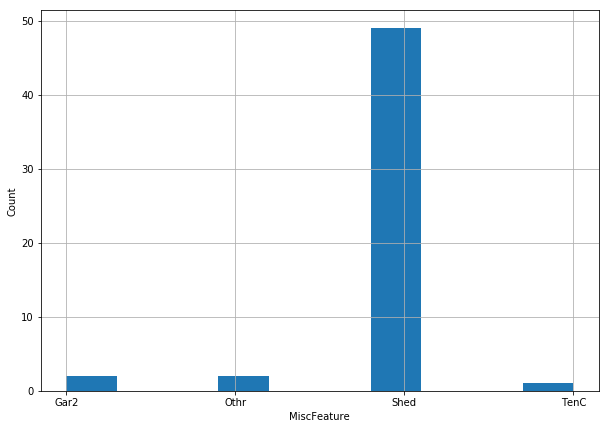

In [165]:
plt.figure(figsize=(10,7))
full.MiscFeature.hist()
plt.xlabel("MiscFeature")
plt.ylabel("Count")
plt.show()



<div class="alert alert-warning">
I will replace the missing values with "None".</div>

In [166]:
full.MiscFeature.fillna("None",inplace=True)

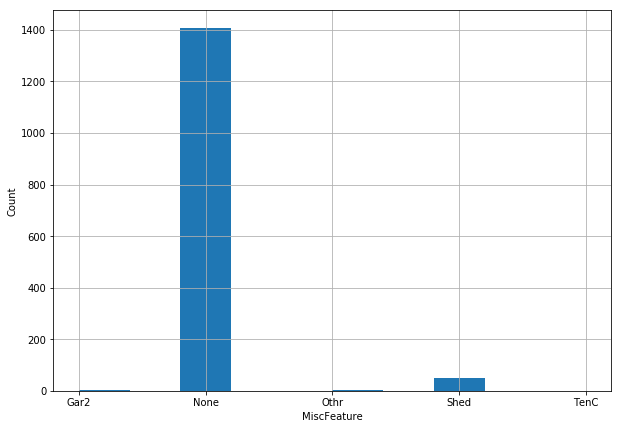

In [167]:
plt.figure(figsize=(10,7))
full.MiscFeature.hist()
plt.xlabel("MiscFeature")
plt.ylabel("Count")
plt.show()




<div class="alert alert-warning">
Now let's look at <b>Alley</b>.</div>


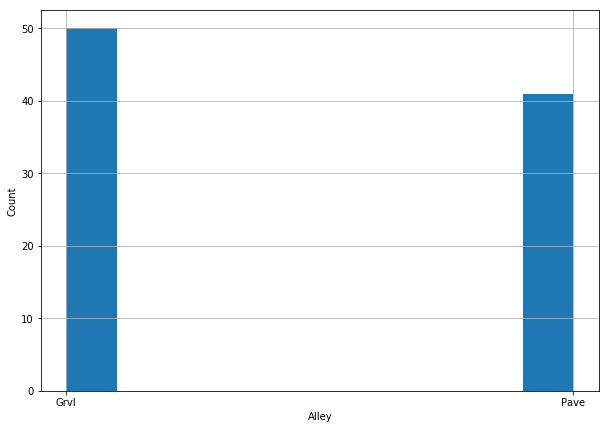

In [169]:
plt.figure(figsize=(10,7))
full.Alley.hist()
plt.xlabel("Alley")
plt.ylabel("Count")
plt.show()



<div class="alert alert-warning">
I will replace the missing value with "No Alley".</div>

In [170]:
full.Alley.fillna("No Alley",inplace=True)

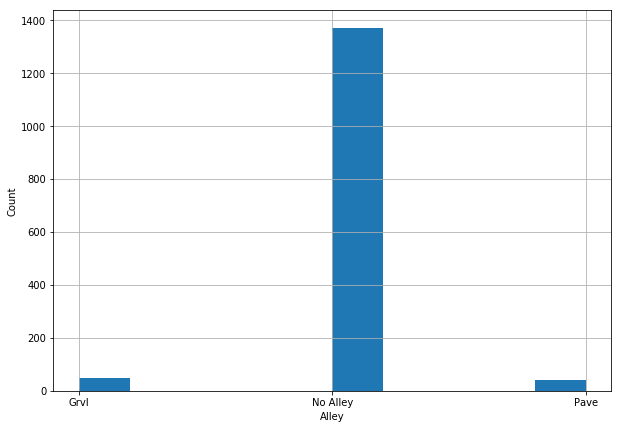

In [171]:
plt.figure(figsize=(10,7))
full.Alley.hist()
plt.xlabel("Alley")
plt.ylabel("Count")
plt.show()



<div class="alert alert-warning">
The features <b> Alley</b> and <b>MiscFeatures</b> seem to have a lot of their data dominated by one value.<br>
We might consider removing them later.</div>



<div class="alert alert-warning">
Now time for <b>Fence</b>.<br>
We will fill the missing values by "No Fence".</div>

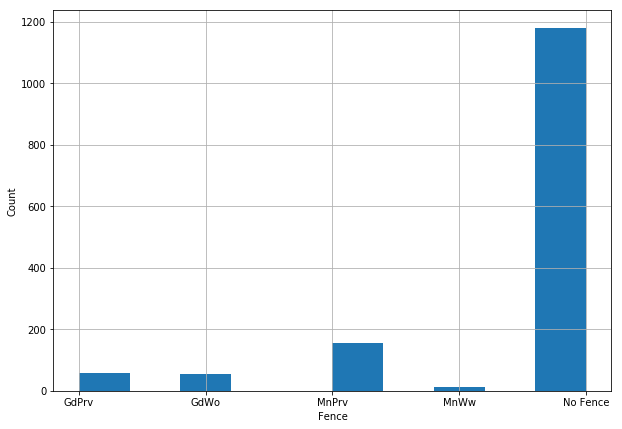

In [172]:
plt.figure(figsize=(10,7))
full.Fence.fillna("No Fence",inplace=True)
full.Fence.hist()
plt.xlabel("Fence")
plt.ylabel("Count")
plt.show()



<div class="alert alert-warning">
Now time for the feature <b>FireplaceQu</b>. </div>

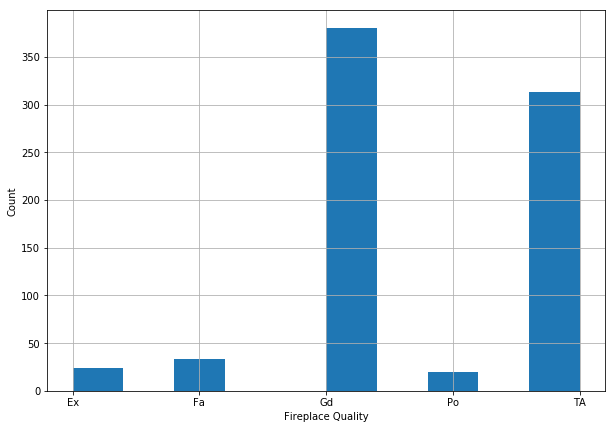

In [173]:
plt.figure(figsize=(10,7))
full.FireplaceQu.hist()
plt.xlabel("Fireplace Quality")
plt.ylabel("Count")
plt.show()



<div class="alert alert-warning">
The houses with missing values for <b>FireplaceQu</b> should be identical to the rows of houses that have a zero in the feature <b>Fireplaces</b>.</div>

In [174]:
full[full.FireplaceQu.isna()].equals(full[full.Fireplaces==0])

True



<div class="alert alert-warning">

We will fill the missing values with "None".

</div>

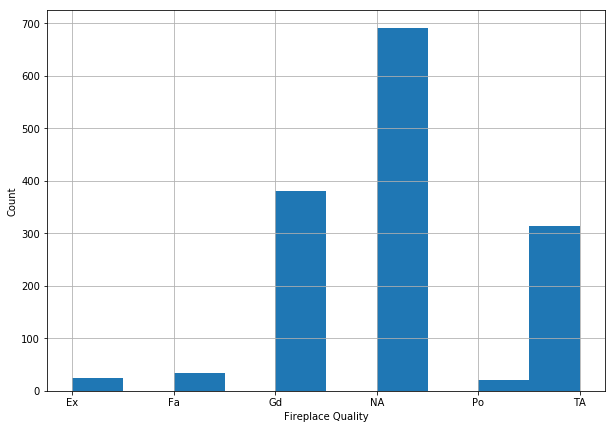

In [175]:
full.FireplaceQu.fillna("NA",inplace=True)
plt.figure(figsize=(10,7))
full.FireplaceQu.hist()
plt.xlabel("Fireplace Quality")
plt.ylabel("Count")
plt.show()



<div class="alert alert-warning">
We can replace the values here by numbers as "Ex" is greater than "Po" in terms of fire place quality.<br> We will do that in the feature engineering part.</div>



<div class="alert alert-warning">
Now it's time for the garage variables.<br>
We will fill the missing values with "No Garage".</div>

In [176]:
full.GarageCond.fillna('No Garage',inplace=True)
full.GarageQual.fillna('No Garage',inplace=True)
full.GarageFinish.fillna('No Garage',inplace=True)
full.GarageType.fillna('No Garage',inplace=True)


In [177]:
#just to check
full[full.GarageArea==0].equals(full[full.GarageCond=='No Garage'])

True



<div class="alert alert-warning">
We can replace the values for the features <b>GarageCond,GarageQual, and GarageFinish</b> with numbers.<br>We will do so in the feature engineering part.</div>



<div class="alert alert-warning">
Now it's time for the basement variables.<br>
We seem to have different numbers of missing values.<br>
Let's check.</div>

In [178]:
full.TotalBsmtSF.isna().sum()

0

In [179]:
bsmt_features=[ind for ind in full.columns if 'Bsmt' in ind]

In [180]:
full[bsmt_features].isna().sum().sort_values(ascending=False)

BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
BsmtHalfBath     0
BsmtFullBath     0
TotalBsmtSF      0
BsmtUnfSF        0
BsmtFinSF2       0
BsmtFinSF1       0
dtype: int64

In [181]:
full[bsmt_features][full.BsmtFinType1.isna()].shape

(37, 11)

In [182]:
full[bsmt_features][full.BsmtFinType2.isna()].shape

(38, 11)



<div class="alert alert-warning">
There is only one additional row.
<br>Let's check it.</div>

In [183]:
i=full[bsmt_features][full.BsmtFinType2.isna()].index.difference(full[bsmt_features][full.BsmtFinType1.isna()].index)[0]
i

332

In [184]:
pd.DataFrame(full[bsmt_features].iloc[i,:])

332
BsmtQual        Gd
BsmtCond        TA
BsmtExposure    No
BsmtFinType1   GLQ
BsmtFinSF1    1124
BsmtFinType2   NaN
BsmtFinSF2     479
BsmtUnfSF     1603
TotalBsmtSF   3206
BsmtFullBath     1
BsmtHalfBath     0



<div class="alert alert-warning">
Here,we have a missing value for <b>BsmtFinType2</b>. Since,this house has a value in the feature <b>BsmtFinSF2</b>,it should have a value in <b>BsmtFinType2</b>.
<br>Let's look at the feature  <b>BsmtFinType2</b>.</div>

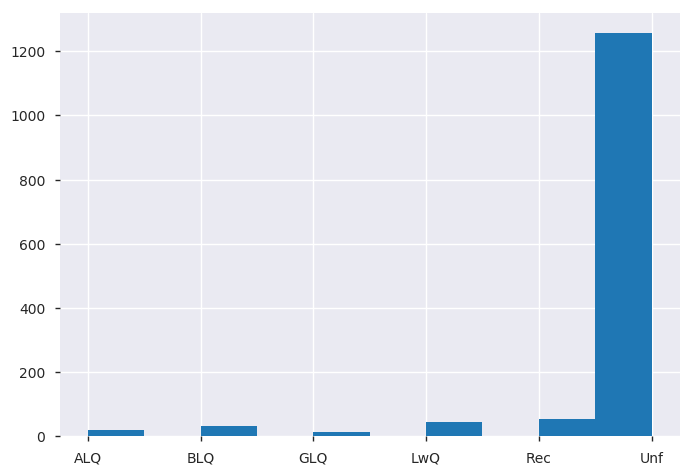

In [394]:
full.BsmtFinType2.hist()
plt.show()



<div class="alert alert-warning">
Since most of the values of this feature are "Unf",we think hat it might be a good value.<br>
However,we can't do this here as we only use "Unf" when the value of <b>BsmtFinSF2</b> is zero and this is not the case here as we have finished area.</div>

In [395]:
full[['BsmtFinSF2','BsmtFinType2']][full.BsmtFinType2=='Unf']

BsmtFinSF2 BsmtFinType2
0              0          Unf
1              0          Unf
2              0          Unf
3              0          Unf
4              0          Unf
5              0          Unf
6              0          Unf
8              0          Unf
9              0          Unf
10             0          Unf
11             0          Unf
12             0          Unf
13             0          Unf
14             0          Unf
15             0          Unf
16             0          Unf
18             0          Unf
19             0          Unf
20             0          Unf
21             0          Unf
22             0          Unf
23             0          Unf
25             0          Unf
27             0          Unf
28             0          Unf
29             0          Unf
30             0          Unf
31             0          Unf
32             0          Unf
33             0          Unf
...          ...          ...
1425           0          Unf
1426           0          Unf
1427           0          Unf
1428           0          Unf
1429           0          Unf
1430           0          Unf
1431           0          Unf
1432           0          Unf
1433           0          Unf
1434           0          Unf
1435           0          Unf
1436           0          Unf
1437           0          Unf
1438           0          Unf
1440           0          Unf
1441           0          Unf
1442           0          Unf
1443           0          Unf
1444           0          Unf
1446           0          Unf
1447           0          Unf
1448           0          Unf
1449           0          Unf
1450           0          Unf
1451           0          Unf
1452           0          Unf
1453           0          Unf
1454           0          Unf
1455           0          Unf
1457           0          Unf

[1256 rows x 2 columns]

In [396]:
[(ind,full.BsmtFinType2[full.BsmtFinType2==ind].count()) for ind in full.BsmtFinType2.unique()]

[('Unf', 1256),
 ('BLQ', 33),
 (nan, 0),
 ('ALQ', 19),
 ('Rec', 54),
 ('LwQ', 46),
 ('GLQ', 14)]



<div class="alert alert-warning">
We see that the second most common value is <b>Rec</b> and so we will fill the missing value with this.</div>

In [185]:
full.BsmtFinType2.iloc[i]='Rec'



<div class="alert alert-warning">
Now we will see the additional missing value in <b>BsmtExposure</b>.</div>

In [186]:
i=full[bsmt_features][full.BsmtExposure.isna()].index.difference(full[bsmt_features][full.BsmtFinType1.isna()].index)[0]
i

948

In [187]:
pd.DataFrame(full[bsmt_features].iloc[i,:])

948
BsmtQual       Gd
BsmtCond       TA
BsmtExposure  NaN
BsmtFinType1  Unf
BsmtFinSF1      0
BsmtFinType2  Unf
BsmtFinSF2      0
BsmtUnfSF     936
TotalBsmtSF   936
BsmtFullBath    0
BsmtHalfBath    0



<div class="alert alert-warning">
Since this house has a basement,we can't fill the missing value with "No Basement".<br>
Let's try to figure a way.
</div>

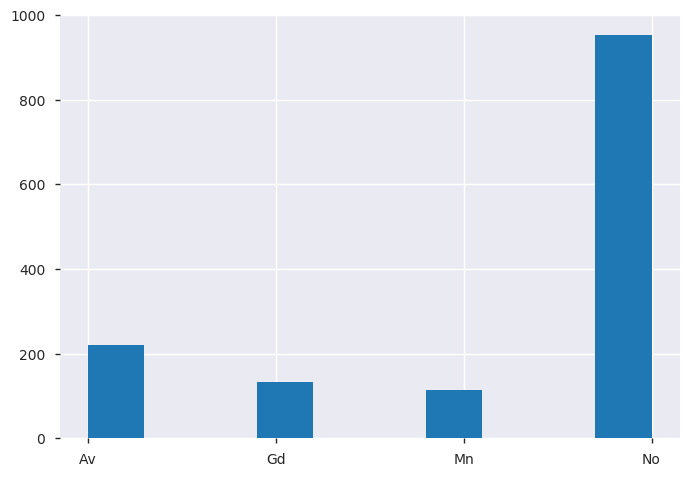

In [400]:
full.BsmtExposure.hist()
plt.show()



<div class="alert alert-warning">
Since the most common value is "No" and there is no direct relation <b>BsmtExposure</b> and other basement features, we will fill the missing value by "No".
</div>

In [188]:
full.BsmtExposure.iloc[i]='No'



<div class="alert alert-warning">
Now we should have the same missing values for the basement features.
</div>

In [189]:
full[bsmt_features].isna().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    37
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    37
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
BsmtFullBath     0
BsmtHalfBath     0
dtype: int64

In [190]:
#check if missing rows are the same for categorical features
full[full.BsmtQual.isna()].equals(full[full.BsmtFinType1.isna()])\
and full[full.BsmtQual.isna()].equals(full[full.BsmtFinType2.isna()])\
and full[full.BsmtQual.isna()].equals(full[full.BsmtCond.isna()]) \
and full[full.BsmtQual.isna()].equals(full[full.BsmtExposure.isna()])


True

In [191]:
#check for numerical variable
full[full.BsmtQual.isna()].equals(full[full.TotalBsmtSF==0])

True



<div class="alert alert-warning">
Now we can fill the remaining values with "No Basement".</div>

In [192]:
full.BsmtQual.fillna('No Basement',inplace=True)
full.BsmtCond.fillna('No Basement',inplace=True)
full.BsmtFinType1.fillna('No Basement',inplace=True)
full.BsmtExposure.fillna('No Basement',inplace=True)
full.BsmtFinType2.fillna('No Basement',inplace=True)


In [193]:
#check if we have any missing values for basement features
full[bsmt_features].isna().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64



<div class="alert alert-warning">
Let's now look at the last two features.<br>
For the feature <b>MasVnrType</b>,we can directly fill the missing value with "No Masonry Veneer".</div>

In [194]:
full.MasVnrType.fillna("No Masonry Veneer",inplace=True)



<div class="alert alert-warning">
For the <b>Electrical</b> feature, we will fill the missing value with the most common value.


</div>

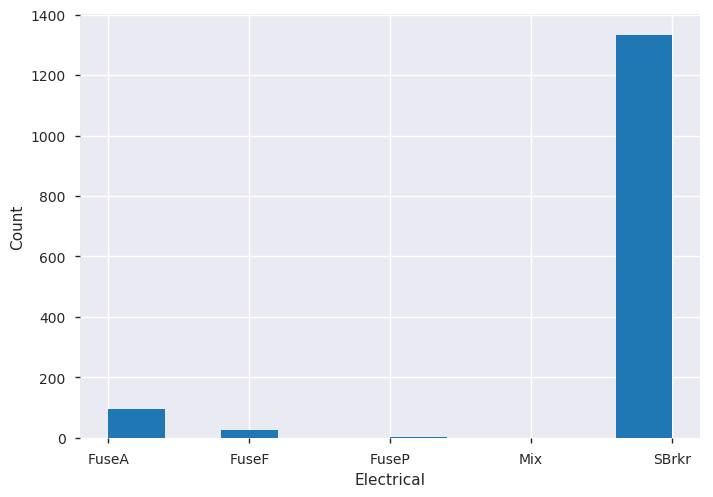

In [408]:
full.Electrical.hist()
plt.xlabel("Electrical")
plt.ylabel("Count")
plt.show()

In [195]:
full.Electrical.fillna('SBrkr',inplace=True)

In [196]:
#check to see if we have any missing values
full.isna().sum().sort_values(ascending=False)

SaleCondition    0
Foundation       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
YearRemodAdd     0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
RoofStyle        0
YearBuilt        0
SaleType         0
Utilities        0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
                ..
EnclosedPorch    0
ScreenPorch      0
CentralAir       0
PoolArea         0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
GarageCars       0
GarageFinish     0
GarageType       0
FireplaceQu      0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath    

In [197]:
#we will keep a copy of the cleaned data for future use
full_cleaned=full.copy()

In [600]:
#full=full_cleaned.copy()



<div class="alert alert-success">

<h2>Feature Engineering</h2>

</div>



<div class="alert alert-warning">
Let's begin with categorical features.<br>
We will replace some categorcial features with numbers.<br>
For example, let's look at the feature <b>PoolQC</b>.
</div>

In [198]:
full.PoolQC.unique()

array(['No Pool', 'Ex', 'Fa', 'Gd'], dtype=object)



<div class="alert alert-warning">


We can see that 'Ex' is greater than all other values in terms of quality.<br>So we can replace the values by numbers with higher numbers meaning higher quality.
</div>

In [199]:
dict1={'No Pool':0,'Fa':1,'Gd':2,'Ex':3}

In [200]:
full.PoolQC=full.PoolQC.apply(lambda x: dict1[x])


<div class="alert alert-warning">
Let's look at <b>MiscFeatures</b>.
</div>

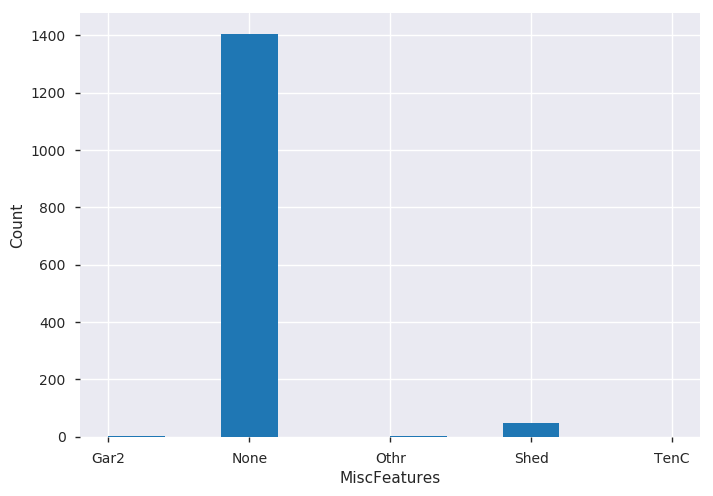

In [415]:
full.MiscFeature.hist()
plt.xlabel("MiscFeatures")
plt.ylabel("Count")
plt.show()


<div class="alert alert-warning">

There seems to be a dominant value here.<br>
Let's try replacing the dominant value "None" by a zero and the others by a "1" and we will see its correlation with the target variable.<br>
If it is too low,we will delete it.
</div>

In [201]:
a=full.MiscFeature.apply(lambda x: 0 if x=='None'  else 1)

In [202]:
a.corr(y)

-0.09204248012681689

In [203]:
delete=[] #list to store features to be deleted
delete.append("MiscFeature")


<div class="alert alert-warning">

Let's look at <b>Alley</b>.
</div>

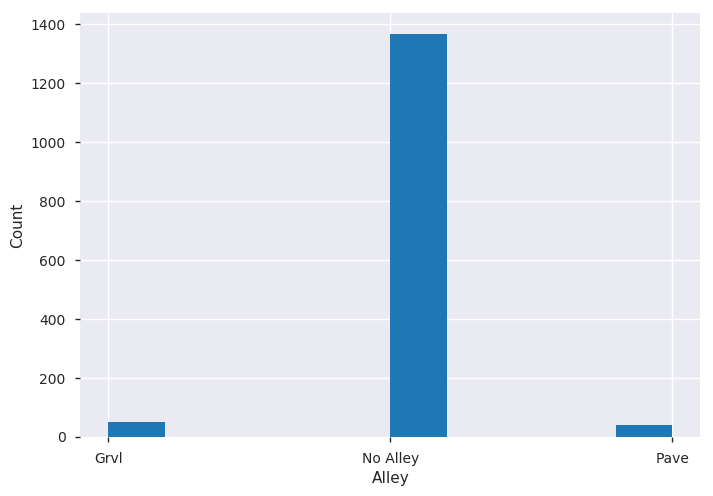

In [419]:
full.Alley.hist()
plt.xlabel("Alley")
plt.ylabel("Count")
plt.show()


<div class="alert alert-warning">

There seems to be a dominant value here.<br>
Let's try replacing the dominant value "None" by a zero and the others by a "1" and we will see its correlation with the target variable.<br>
If it is too low,we will delete it.
</div>

In [204]:
a=full.Alley.apply(lambda x: 0 if x=='No Alley'  else 1)

In [205]:
a.corr(y)

-0.12220790878535244

In [206]:
delete.append('Alley')


<div class="alert alert-warning">
Let's look at Fence.
</div>

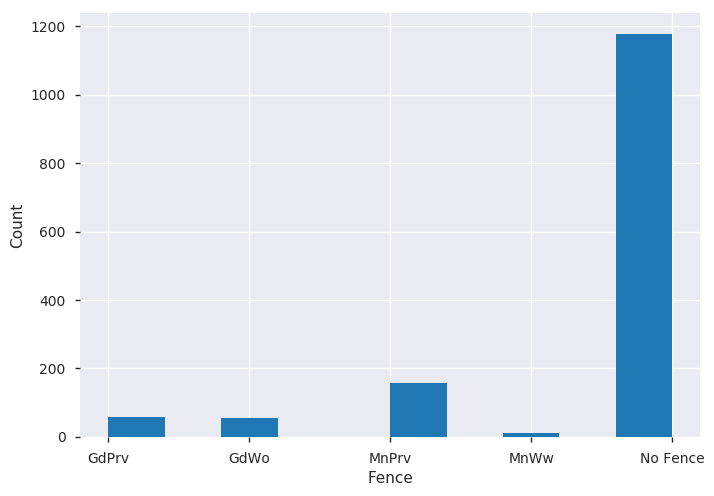

In [423]:
full.Fence.hist()
plt.xlabel("Fence")
plt.ylabel("Count")
plt.show()


<div class="alert alert-warning">

We will dummy encode this feature later.
</div>


<div class="alert alert-warning">
Let's look at the feature <b>FireplaceQu</b>.
</div>

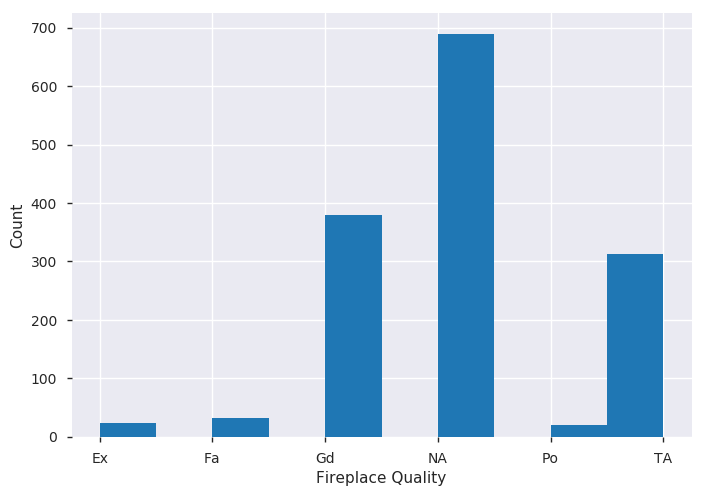

In [424]:
full.FireplaceQu.hist()
plt.xlabel("Fireplace Quality")
plt.ylabel("Count")
plt.show()


<div class="alert alert-warning">

We will replace these categories by numbers as we did before.</div>

In [207]:
dict1={'NA':0,'Po':1,'TA':2,'Fa':3,'Gd':4,'Ex':5}

In [208]:
full.FireplaceQu=full.FireplaceQu.apply(lambda x: dict1[x])


<div class="alert alert-warning">

Now let's look at the garage features and replace the necessary categories by numbers.

</div>

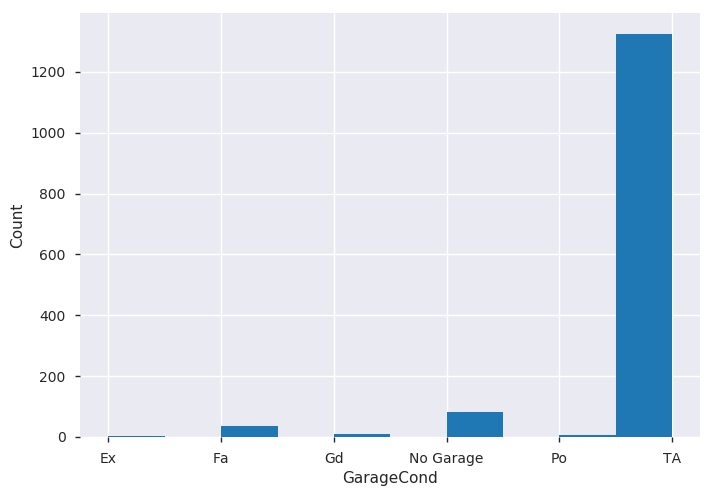

In [428]:
full.GarageCond.hist()
plt.xlabel("GarageCond")
plt.ylabel("Count")
plt.show()

In [209]:
#replace by numbers
dict1={'No Garage':0,'Po':1,'TA':2,'Fa':3,'Gd':4,'Ex':5}

In [210]:
full.GarageCond=full.GarageCond.apply(lambda x: dict1[x])

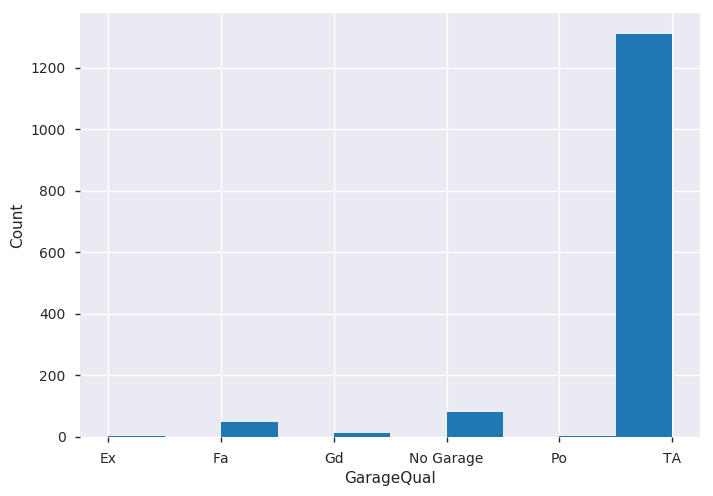

In [431]:
full.GarageQual.hist()
plt.xlabel("GarageQual")
plt.ylabel("Count")
plt.show()


In [211]:
full.GarageQual=full.GarageQual.apply(lambda x: dict1[x])

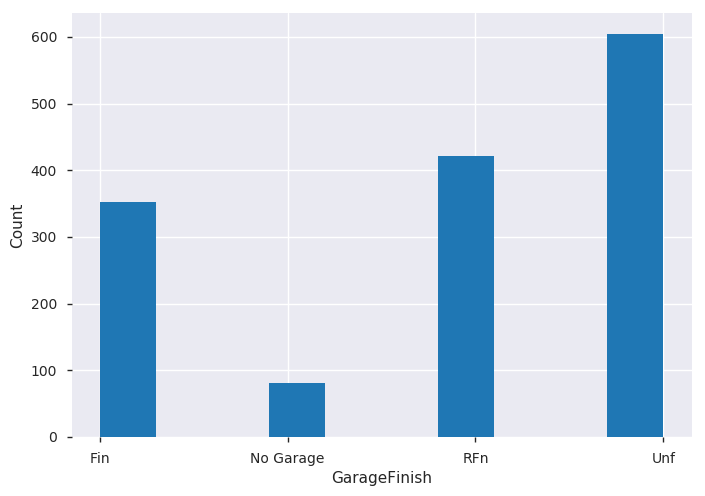

In [433]:
full.GarageFinish.hist()
plt.xlabel("GarageFinish")
plt.ylabel("Count")
plt.show()

In [212]:
#a finished garage cost more
dict1={'No Garage':0,'Unf':1,'RFn':2,'Fin':3}

In [213]:
full.GarageFinish=full.GarageFinish.apply(lambda x: dict1[x])


<div class="alert alert-warning">

Now let's work with the basement features.

</div>

In [214]:
full.BsmtFinType2.unique()

array(['Unf', 'BLQ', 'No Basement', 'ALQ', 'Rec', 'LwQ', 'GLQ'],
      dtype=object)

In [215]:
#higher basement rating means higher price
dict1={'No Basement':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}

In [216]:
full.BsmtFinType1=full.BsmtFinType1.apply(lambda x: dict1[x])
full.BsmtFinType2=full.BsmtFinType2.apply(lambda x: dict1[x])

In [217]:
full.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', 'No Basement'], dtype=object)

In [218]:
dict1={'No Basement':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}

In [219]:
full.BsmtExposure=full.BsmtExposure.apply(lambda x: dict1[x])

In [220]:
full.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', 'No Basement', 'Fa'], dtype=object)

In [221]:
dict1={'No Basement':0,'Po':1,'TA':2,'Fa':3,'Gd':4,'Ex':5}

In [222]:
full.BsmtQual=full.BsmtQual.apply(lambda x: dict1[x])

In [223]:
full.BsmtCond.unique()

array(['TA', 'Gd', 'No Basement', 'Fa', 'Po'], dtype=object)

In [224]:
full.BsmtCond=full.BsmtCond.apply(lambda x: dict1[x])


<div class="alert alert-warning">

Now let's work with <b>MSZoning</b>.

</div>

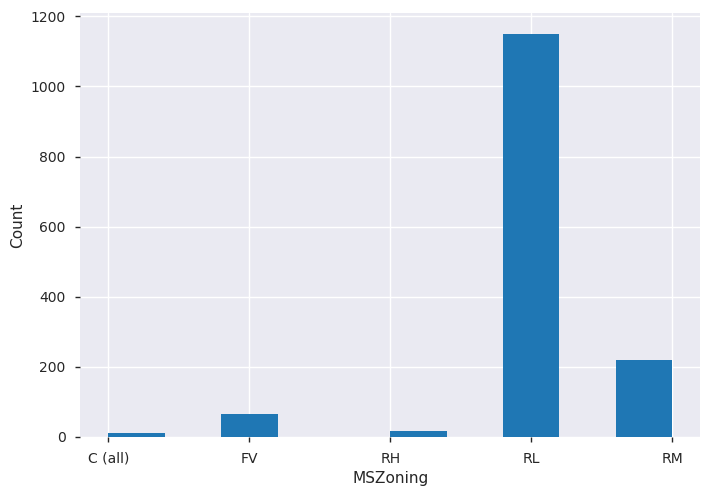

In [448]:
full.MSZoning.hist()
plt.xlabel("MSZoning")
plt.ylabel("Count")
plt.show()


<div class="alert alert-warning">

We will dummy encode this feature later.
</div>


<div class="alert alert-warning">

Now let's work with <b>Street</b>.

</div>

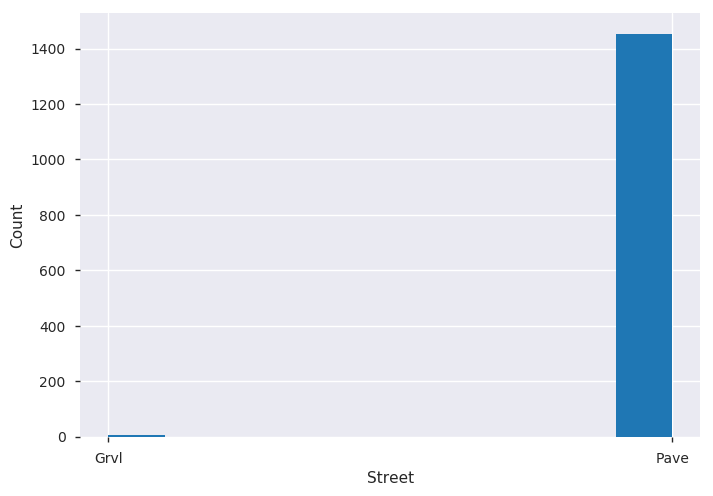

In [449]:
full.Street.hist()
plt.xlabel("Street")
plt.ylabel("Count")
plt.show()


<div class="alert alert-warning">

We delete this feature later.
</div>

In [225]:
delete.append('Street')


<div class="alert alert-warning">

Now let's work with <b>LotShape</b>.

</div>

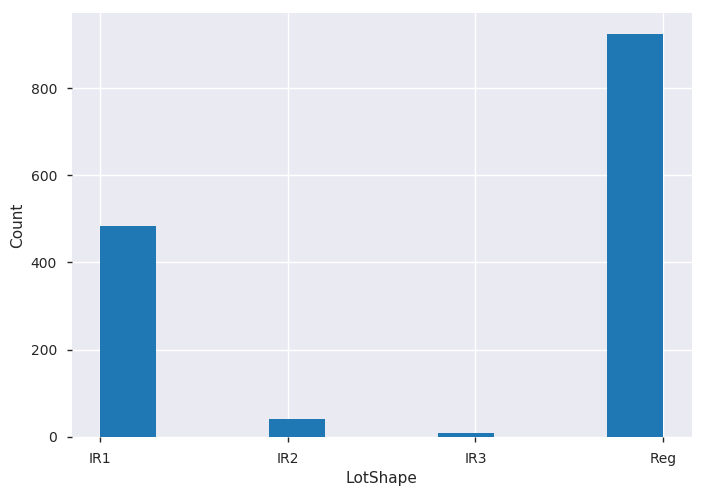

In [452]:
full.LotShape.hist()
plt.xlabel("LotShape")
plt.ylabel("Count")
plt.show()


<div class="alert alert-warning">

We will dummy encode this feature later.
</div>


<div class="alert alert-warning">

Now let's work with <b>LandContour</b>.

</div>

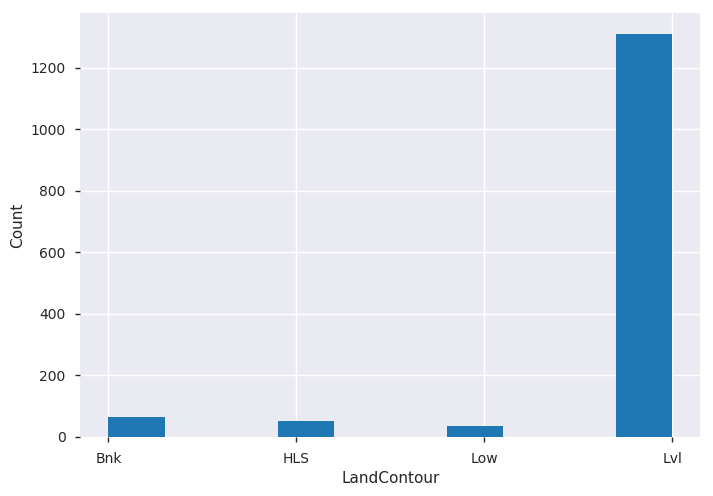

In [453]:
full.LandContour.hist()
plt.xlabel("LandContour")
plt.ylabel("Count")
plt.show()


<div class="alert alert-warning">

We will dummy encode this feature later.
</div>


<div class="alert alert-warning">

Now let's work with <b>Utilities</b>.

</div>

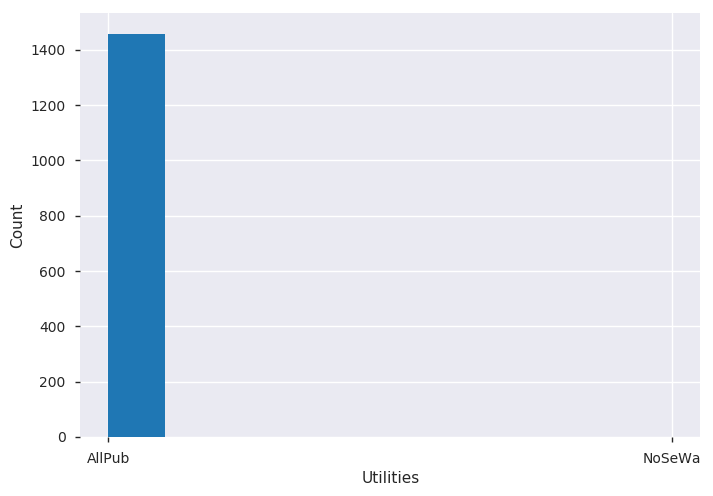

In [454]:
full.Utilities.hist()
plt.xlabel("Utilities")
plt.ylabel("Count")
plt.show()

In [226]:
full[full.Utilities!="AllPub"]

MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape  \
944          20       RL         80.0    14375   Pave  No Alley      IR1   

    LandContour Utilities LotConfig      ...       ScreenPorch PoolArea  \
944         Lvl    NoSeWa   CulDSac      ...               233        0   

    PoolQC     Fence MiscFeature MiscVal  MoSold  YrSold  SaleType  \
944      0  No Fence        None       0       1    2009       COD   

     SaleCondition  
944        Abnorml  

[1 rows x 78 columns]


<div class="alert alert-warning">
There is only one entry which has a different value for the feature <b>Utilities</b>.<br>
This feature seems useless.<br>
We will delete this feature later.
</div>

In [227]:
delete.append("Utilities")


<div class="alert alert-warning">

Now let's work with <b>LotConfig</b>.

</div>

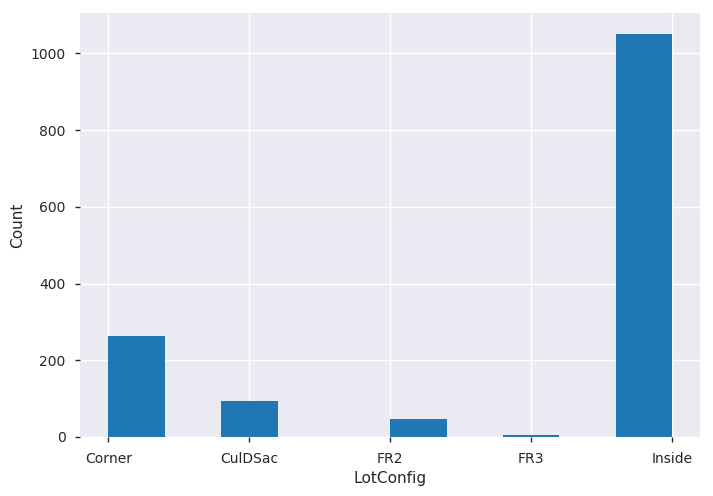

In [457]:
full.LotConfig.hist()
plt.xlabel("LotConfig")
plt.ylabel("Count")
plt.show()


<div class="alert alert-warning">

We will dummy encode this feature later.
</div>


<div class="alert alert-warning">

Now let's work with <b>LandSlope</b>.

</div>

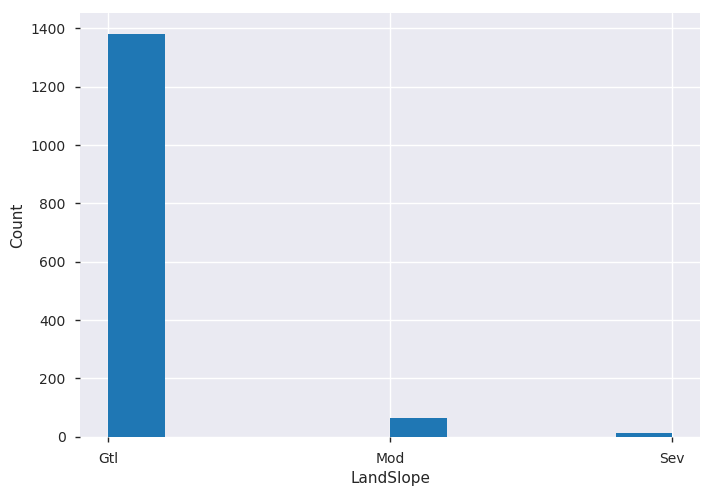

In [458]:
full.LandSlope.hist()
plt.xlabel("LandSlope")
plt.ylabel("Count")
plt.show()


<div class="alert alert-warning">

We will delete this feature later.
</div>

In [228]:
delete.append("LandSlope")


<div class="alert alert-warning">

Now let's work with <b>Neighborhood</b>.

</div>

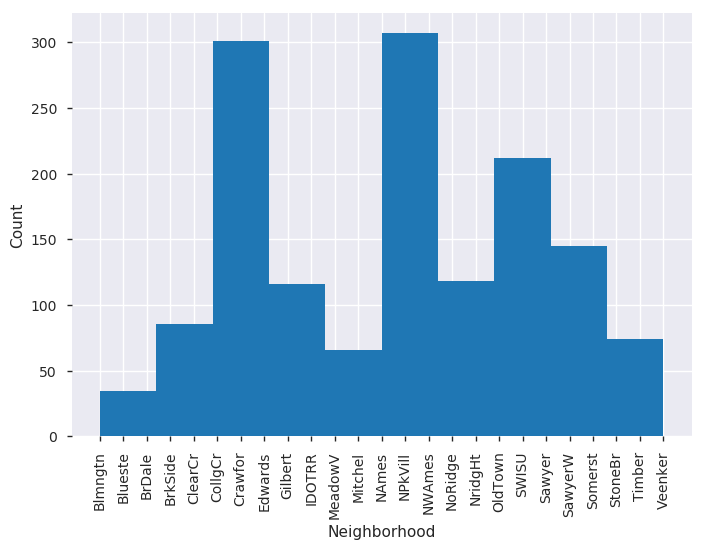

In [460]:
full.Neighborhood.hist()
plt.xlabel("Neighborhood")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


<div class="alert alert-warning">

We will dummy encode this feature later.
</div>


<div class="alert alert-warning">

Now let's work with <b>Condition1</b>.

</div>

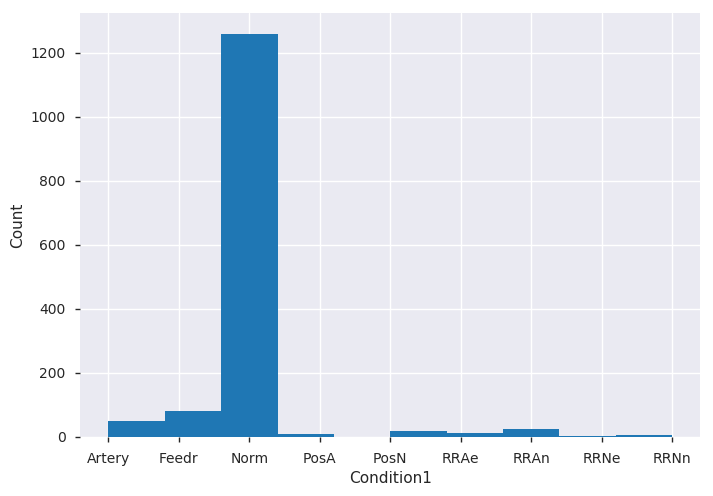

In [461]:
full.Condition1.hist()
plt.xlabel("Condition1")
plt.ylabel("Count")
plt.show()


<div class="alert alert-warning">

We will delete this feature later.
</div>

In [229]:
delete.append("Condition1")


<div class="alert alert-warning">

Now let's work with <b>Condition2</b>.

</div>

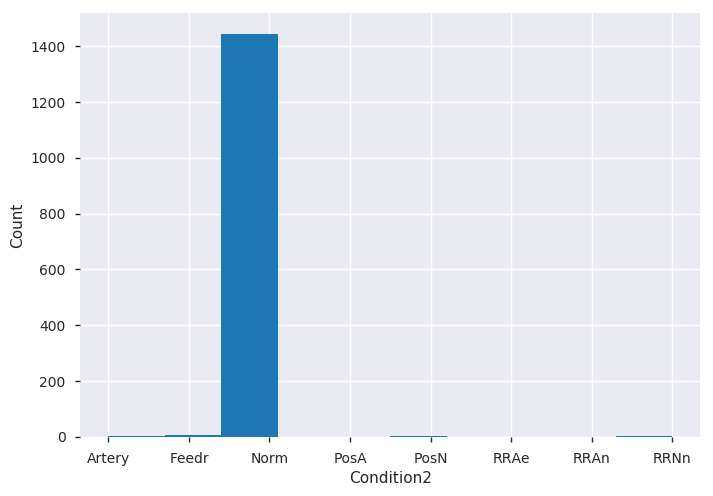

In [463]:
full.Condition2.hist()
plt.xlabel("Condition2")
plt.ylabel("Count")
plt.show()


<div class="alert alert-warning">

We will delete this feature later.
</div>

In [230]:
delete.append("Condition2")


<div class="alert alert-warning">

Now let's work with <b>BldgType</b>.

</div>

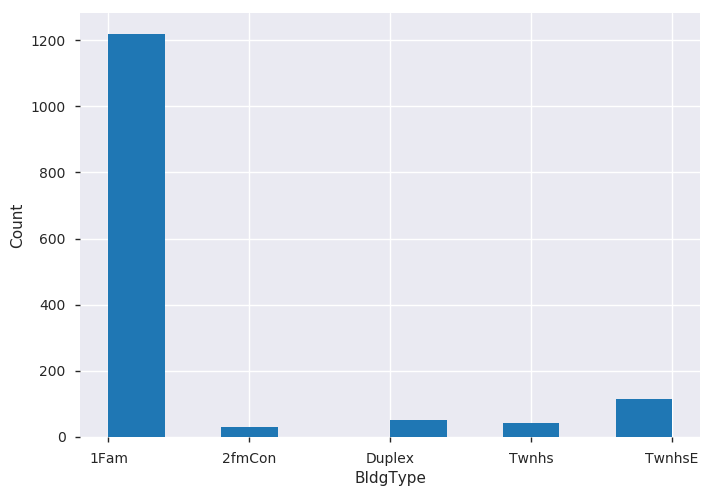

In [465]:
full.BldgType.hist()
plt.xlabel("BldgType")
plt.ylabel("Count")
plt.show()


<div class="alert alert-warning">

We will dummy encode this feature later.
</div>


<div class="alert alert-warning">

Now let's work with <b>HouseStyle</b>.

</div>

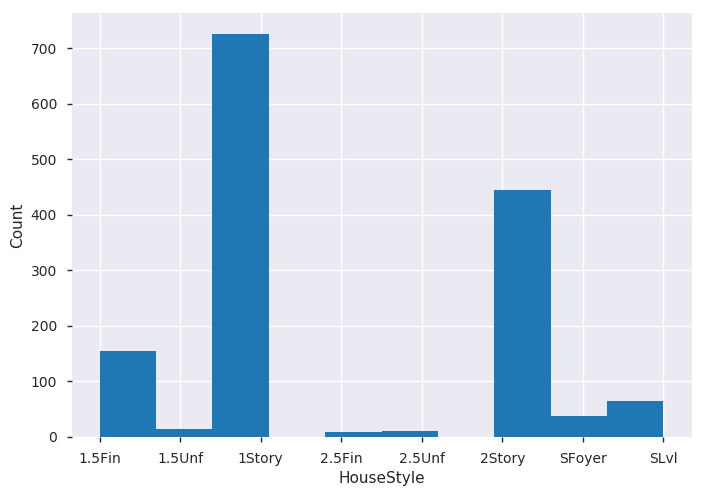

In [466]:
full.HouseStyle.hist()
plt.xlabel("HouseStyle")
plt.ylabel("Count")
plt.show()


<div class="alert alert-warning">

We will dummy encode this feature later.
</div>


<div class="alert alert-warning">

Now let's work with <b>RoofStyle</b>.

</div>

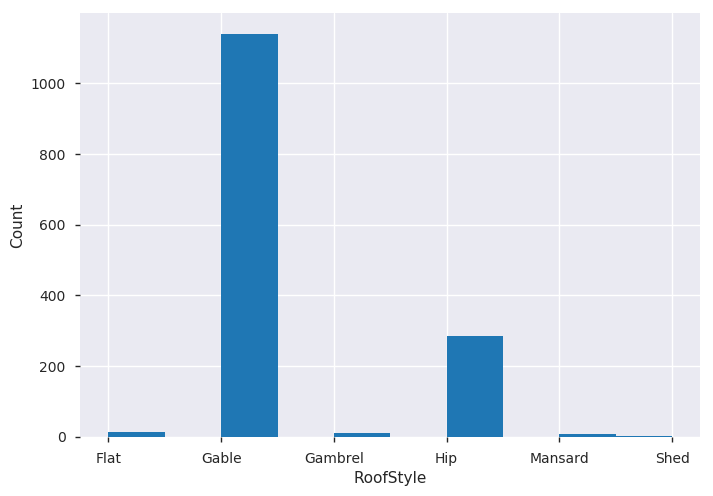

In [467]:
full.RoofStyle.hist()
plt.xlabel("RoofStyle")
plt.ylabel("Count")
plt.show()


<div class="alert alert-warning">

We will dummy encode this feature later.
</div>


<div class="alert alert-warning">

Now let's work with <b>RoofMatl</b>.

</div>

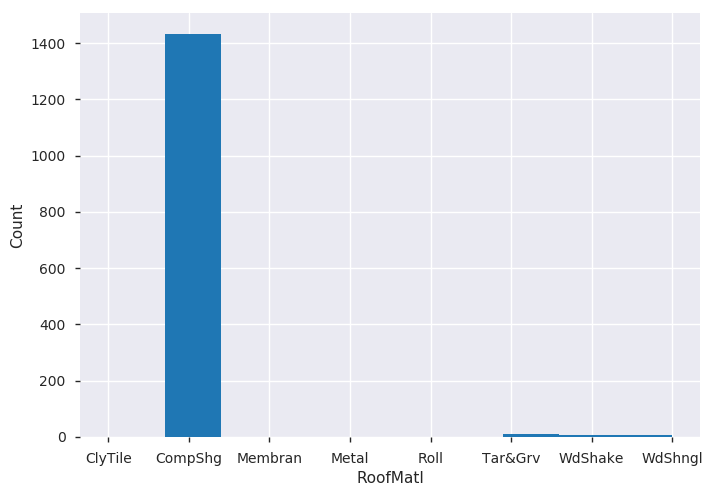

In [468]:
full.RoofMatl.hist()
plt.xlabel("RoofMatl")
plt.ylabel("Count")
plt.show()


<div class="alert alert-warning">

We will delete this feature later.
</div>

In [231]:
delete.append("RoofMatl")


<div class="alert alert-warning">

Now let's work with <b>Exterior1st</b>.

</div>

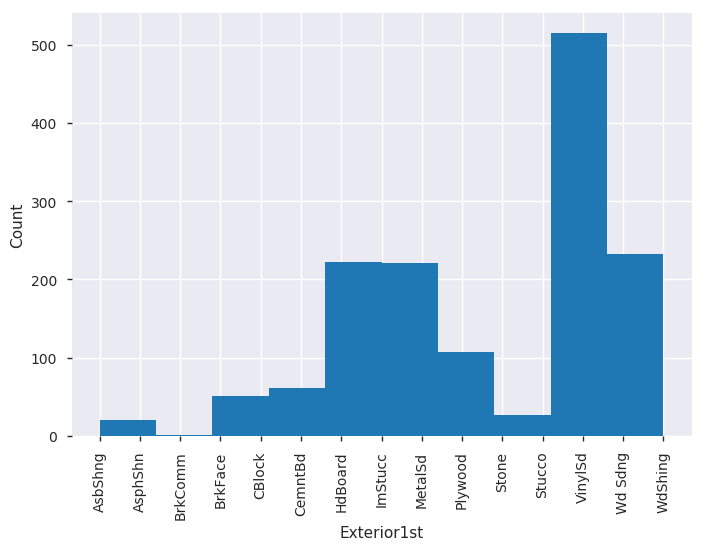

In [470]:
full.Exterior1st.hist()
plt.xlabel("Exterior1st")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


<div class="alert alert-warning">

We will dummy encode this feature later.
</div>


<div class="alert alert-warning">

Now let's work with <b>Exterior2nd</b>.

</div>

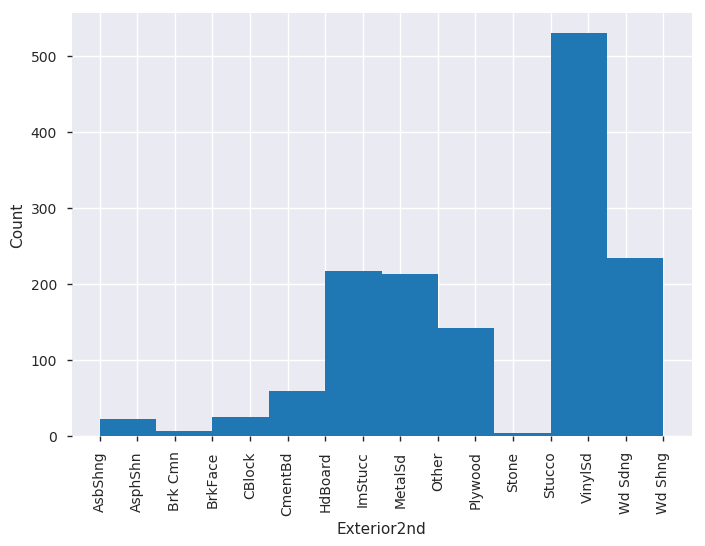

In [471]:
full.Exterior2nd.hist()
plt.xlabel("Exterior2nd")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


<div class="alert alert-warning">

The above two distributions look the same.<br>
We will delete one of them.
</div>

In [232]:
delete.append('Exterior2nd')


<div class="alert alert-warning">

Now let's work with <b>MasVnrType</b>.

</div>

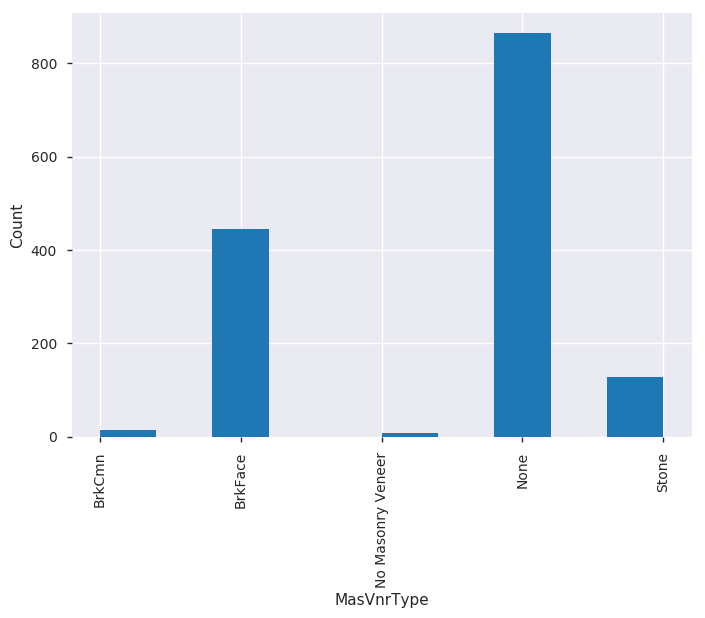

In [473]:
full.MasVnrType.hist()
plt.xlabel("MasVnrType")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


<div class="alert alert-warning">

We will dummy encode this feature later.
</div>


<div class="alert alert-warning">

Now let's work with <b>ExterQual</b>.

</div>

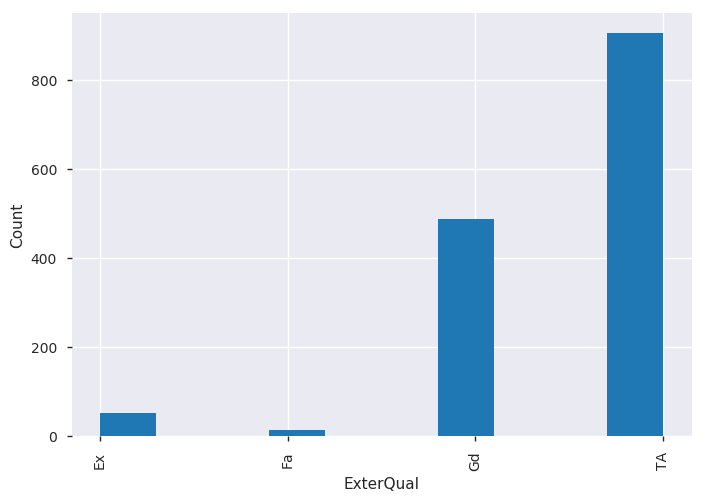

In [474]:
full.ExterQual.hist()
plt.xlabel("ExterQual")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [233]:
dict1={'Po':1,'TA':2,'Fa':3,'Gd':4,'Ex':5}

In [234]:
full.ExterQual=full.ExterQual.apply(lambda x: dict1[x])


<div class="alert alert-warning">

Now let's work with <b>ExterCond</b>.

</div>

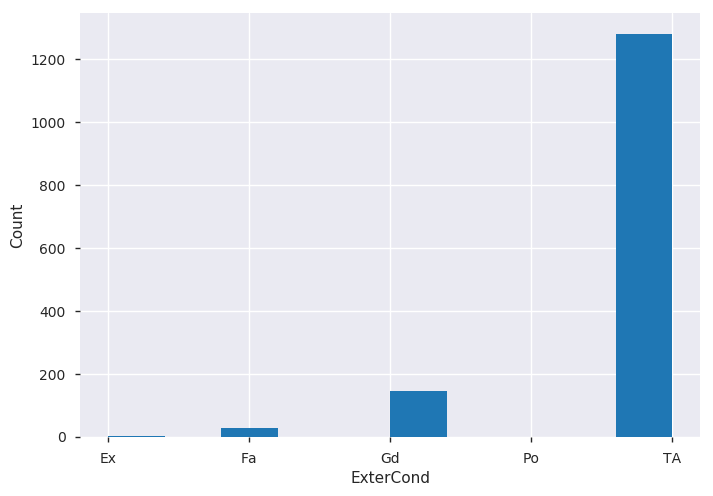

In [477]:
full.ExterCond.hist()
plt.xlabel("ExterCond")
plt.ylabel("Count")
plt.show()

In [235]:
full.ExterCond=full.ExterCond.apply(lambda x: dict1[x])


<div class="alert alert-warning">

Now let's work with <b>Foundation</b>.

</div>

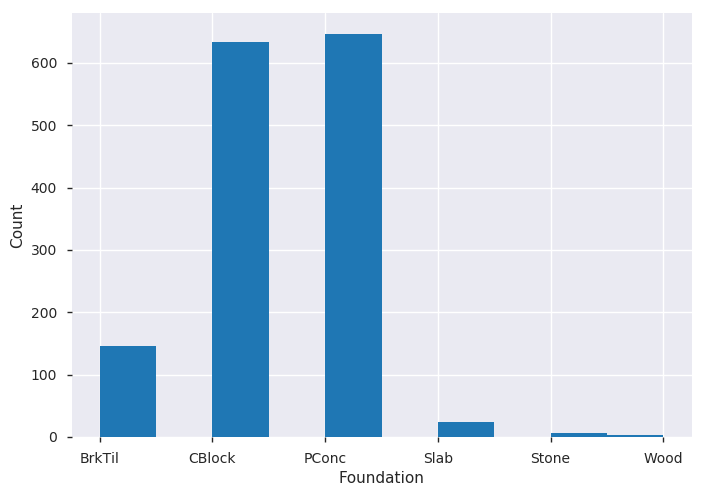

In [479]:
full.Foundation.hist()
plt.xlabel("Foundation")
plt.ylabel("Count")
plt.show()


<div class="alert alert-warning">

We will dummy encode this feature later.
</div>


<div class="alert alert-warning">

Now let's work with <b>Heating</b>.

</div>

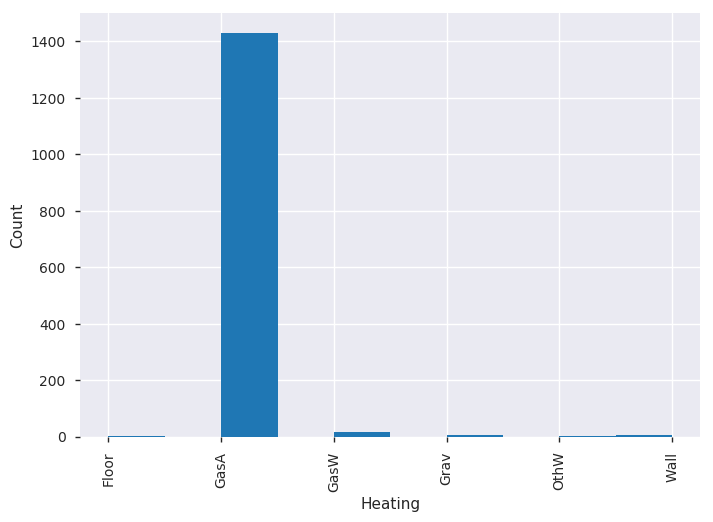

In [480]:
full.Heating.hist()
plt.xlabel("Heating")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


<div class="alert alert-warning">

We will remove this feature later.
</div>

In [236]:
delete.append("Heating")


<div class="alert alert-warning">

Now let's work with <b>HeatingQC</b>.

</div>

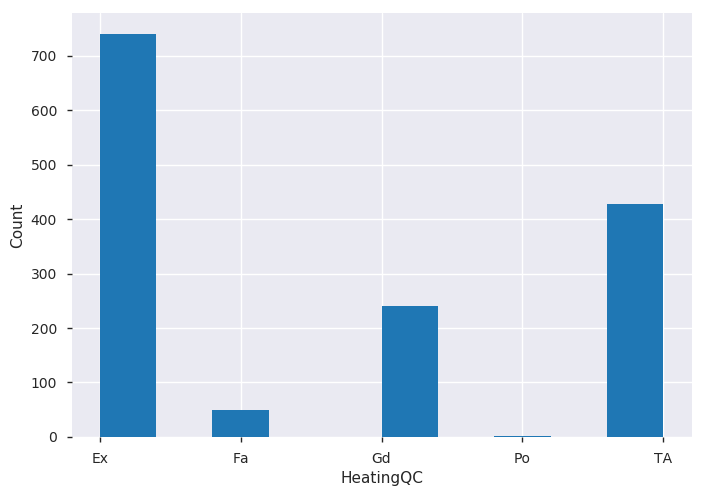

In [482]:
full.HeatingQC.hist()
plt.xlabel("HeatingQC")
plt.ylabel("Count")
plt.show()

In [237]:
full.HeatingQC=full.HeatingQC.apply(lambda x: dict1[x])


<div class="alert alert-warning">

Now let's work with <b>CentralAir</b>.

</div>

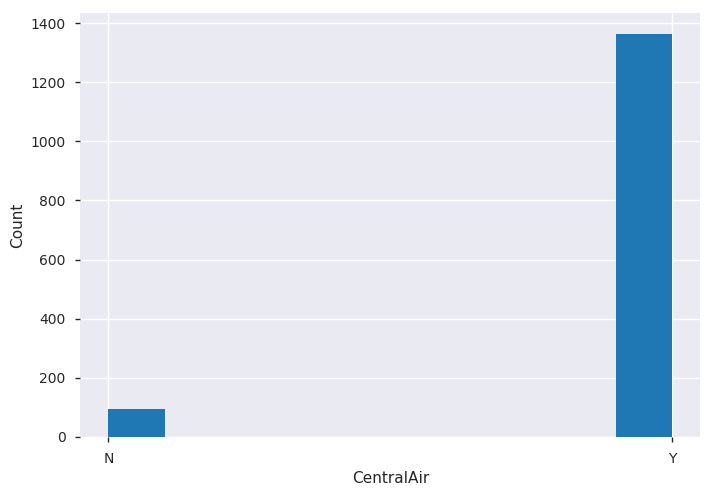

In [484]:
full.CentralAir.hist()
plt.xlabel("CentralAir")
plt.ylabel("Count")
plt.show()


<div class="alert alert-warning">

Let's convert 'Y' to "1" and 'N' to "0". 'Y' is greater than 'N' because with central air you get a higher price.
</div>

In [238]:
full.CentralAir=full.CentralAir.apply(lambda x: 1 if x=='Y' else 0)


<div class="alert alert-warning">

Now let's work with <b>Electrical</b>.

</div>

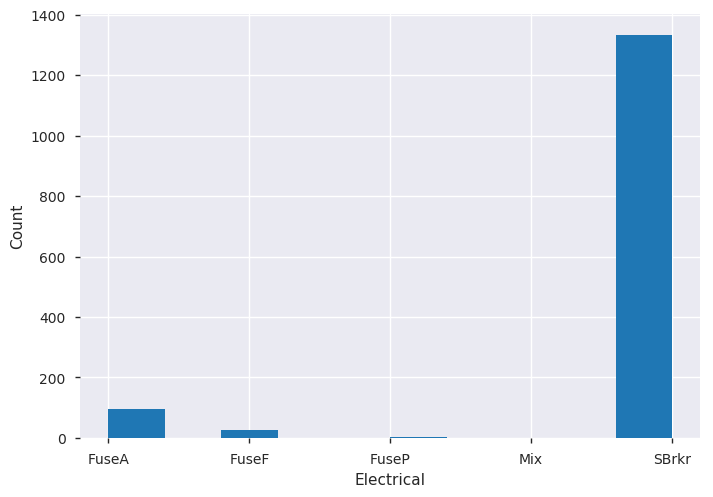

In [486]:
full.Electrical.hist()
plt.xlabel("Electrical")
plt.ylabel("Count")
plt.show()


<div class="alert alert-warning">

We will delete this feature later.
</div>

In [239]:
delete.append("Electrical")


<div class="alert alert-warning">

Now let's work with <b>KitchenQual</b>.

</div>

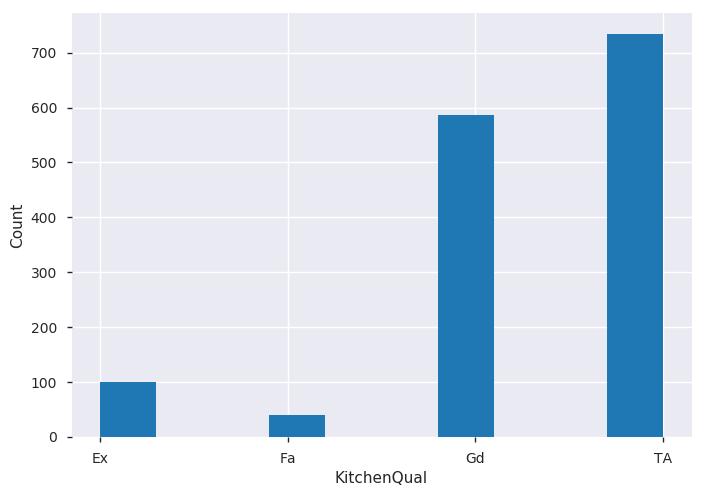

In [488]:
full.KitchenQual.hist()
plt.xlabel("KitchenQual")
plt.ylabel("Count")
plt.show()

In [240]:
full.KitchenQual=full.KitchenQual.apply(lambda x: dict1[x])


<div class="alert alert-warning">

Now let's work with <b>Functional </b>.

</div>

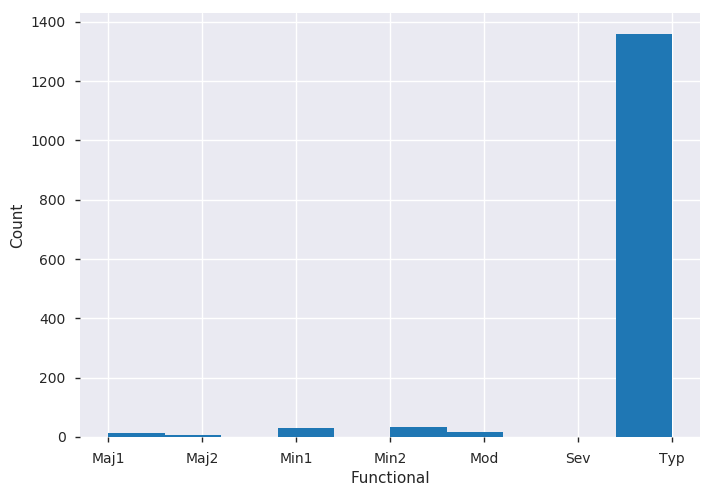

In [490]:
full.Functional.hist()
plt.xlabel("Functional")
plt.ylabel("Count")
plt.show()


<div class="alert alert-warning">

We will delete this feature later.</div>

In [241]:
delete.append("Functional")


<div class="alert alert-warning">

Now let's work with <b>GarageType</b>.

</div>

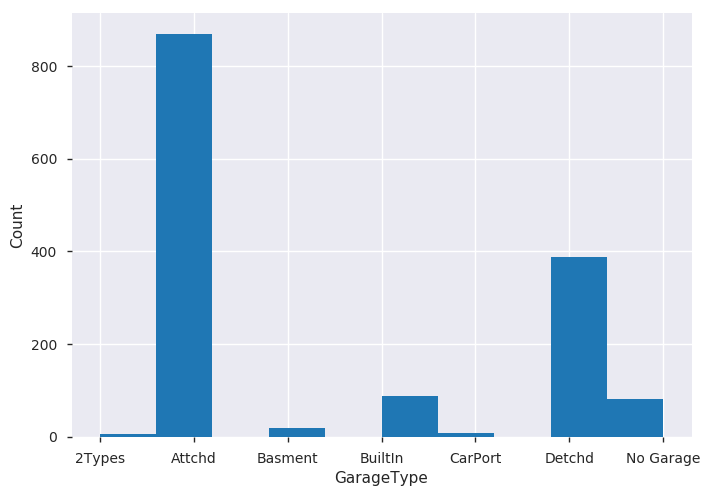

In [492]:
full.GarageType.hist()
plt.xlabel("GarageType")
plt.ylabel("Count")
plt.show()


<div class="alert alert-warning">

We will dummy encode this feature later.</div>


<div class="alert alert-warning">

Now let's work with <b>PavedDrive</b>.

</div>

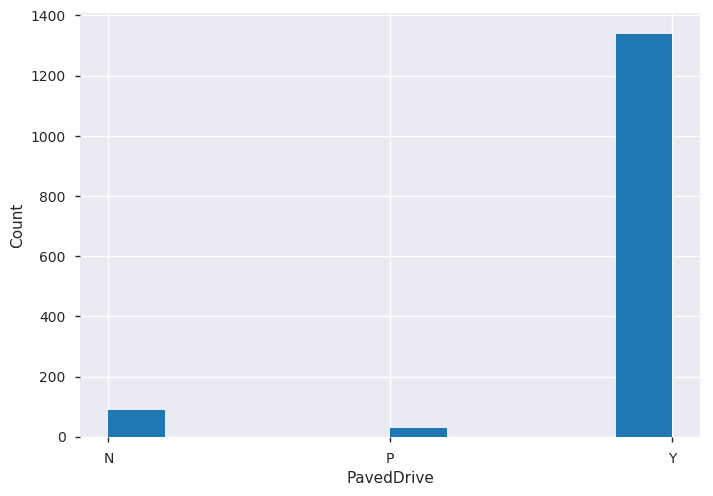

In [493]:
full.PavedDrive.hist()
plt.xlabel("PavedDrive")
plt.ylabel("Count")
plt.show()


<div class="alert alert-warning">

We will delete this feature later.</div>

In [242]:
delete.append("PavedDrive")


<div class="alert alert-warning">

Now let's work with <b>SaleType</b>.

</div>

In [243]:
full.SaleType.isna().sum()

0

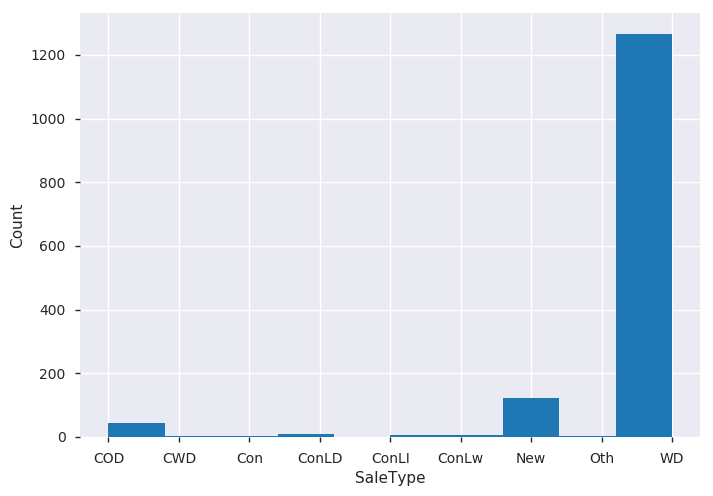

In [496]:
full.SaleType.hist()
plt.xlabel("SaleType")
plt.ylabel("Count")
plt.show()


<div class="alert alert-warning">

We will dummy encode this feature later.</div>


<div class="alert alert-warning">

Now let's work with <b>SaleCondition</b>.

</div>

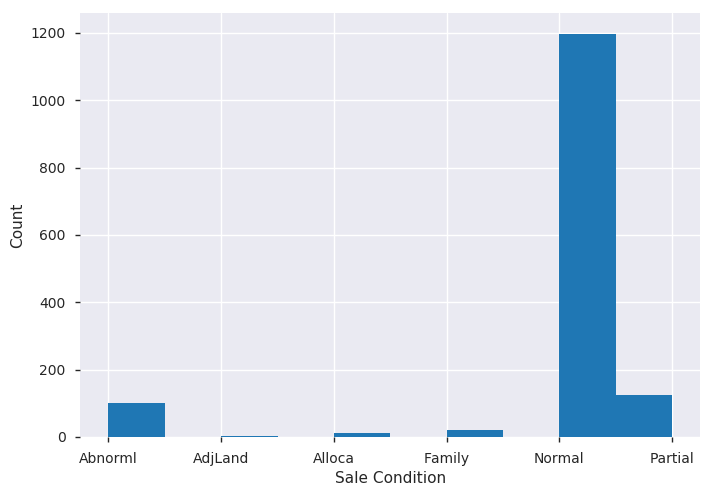

In [497]:
full.SaleCondition.hist()
plt.xlabel("Sale Condition")
plt.ylabel("Count")
plt.show()


<div class="alert alert-warning">

We will dummy encode this feature later.</div>


<div class="alert alert-warning">

We are now done with categorical and numerical features.<br>
Let's try adding some new features.
</div>


<div class="alert alert-warning">

We have some feature that are areas of finished and unfininshed basement and we have a feature that is the total basement array. Let's check if there is a relation.
</div>

In [244]:
(full.BsmtFinSF1+full.BsmtFinSF2+full.BsmtUnfSF).equals(full.TotalBsmtSF)

True


<div class="alert alert-warning">
We can remove the features <b> BsmtFinSF1, BsmtFinSF2, and BsmtUnfSF</b>.
</div>

In [245]:
delete.append("BsmtFinSF1")
delete.append("BsmtFinSF2")
delete.append("BsmtUnfSF")


<div class="alert alert-warning">
Let's also check if the sum of <b>1stFlrSF, 2ndFlrSF, LowQualFinSF</b> is equal to <b>GrLivArea</b>.</div>

In [246]:
(full['1stFlrSF']+full['2ndFlrSF']+full.LowQualFinSF).equals(full.GrLivArea)

True


<div class="alert alert-warning">
We can remove the features <b> 1stFlrSF, 2ndFlrSF, and LowQualFinSF</b>.
</div>

In [247]:
delete.append("1stFlrSF")
delete.append("2ndFlrSF")
delete.append("LowQualFinSF")


<div class="alert alert-warning">
Let's look at the "Bathroom" features now.</div>

In [248]:
print(full.FullBath.corr(y))
print(full.HalfBath.corr(y))
print(full.BsmtFullBath.corr(y))
print(full.BsmtHalfBath.corr(y))

0.5718673954241733
0.2997792902100934
0.2212091220474469
-0.017281473694899883



<div class="alert alert-warning">
Let's see if we add the bathroom features together into one feature that may have a better correlation.<br>
Here each half bathroom is multiplied by 0.5.<br>
Credits of this idea goes to <b><a href = "https://www.kaggle.com/erikbruin/house-prices-lasso-xgboost-and-a-detailed-eda">Erik Bruin</a></b>.</div>

In [249]:
full['Total_Bathrooms']=(full.FullBath+full.HalfBath*0.5+full.BsmtFullBath+full.BsmtHalfBath*0.5)

In [250]:
full.Total_Bathrooms.corr(y)

0.6391271749177662


<div class="alert alert-warning">
We can remove the other Bath features.</div>

In [251]:
delete.append("FullBath")
delete.append("HalfBath")
delete.append("BsmtFullBath")
delete.append("BsmtHalfBath")


<div class="alert alert-warning">
Let's look at the "Porch" features.</div>

In [252]:
print(full.OpenPorchSF.corr(y))
print(full.EnclosedPorch.corr(y))
print(full['3SsnPorch'].corr(y))
print(full.ScreenPorch.corr(y))

0.31554792275247034
-0.11978981907208046
0.02082628480262346
0.11989055290139497



<div class="alert alert-warning">
Let's see if adding them improves the correlation with the target feature.</div>

In [253]:
(full.OpenPorchSF+full.EnclosedPorch+full['3SsnPorch']+full.ScreenPorch).corr(y)

0.19782953308159243


<div class="alert alert-warning">
It doesn't but I will add them as the correlation in either way is low.</div>

In [254]:
full['TotalPorchSF']=full.OpenPorchSF+full.EnclosedPorch+full['3SsnPorch']+full.ScreenPorch

In [255]:
delete.append("OpenPorchSF")
delete.append("EnclosedPorch")
delete.append("3SsnPorch")
delete.append("ScreenPorch")

In [256]:
full.drop(delete,axis=1,inplace=True)




<div class="alert alert-warning">
I will add a feature which describes the age of the house since the last time it was remodeled.</div>

In [257]:
full['Age']=full.YrSold.astype('int')-full.YearRemodAdd.astype('int')


<div class="alert alert-warning">
Let's now check the correlation matrix and try to remove highly correlated features.</div>

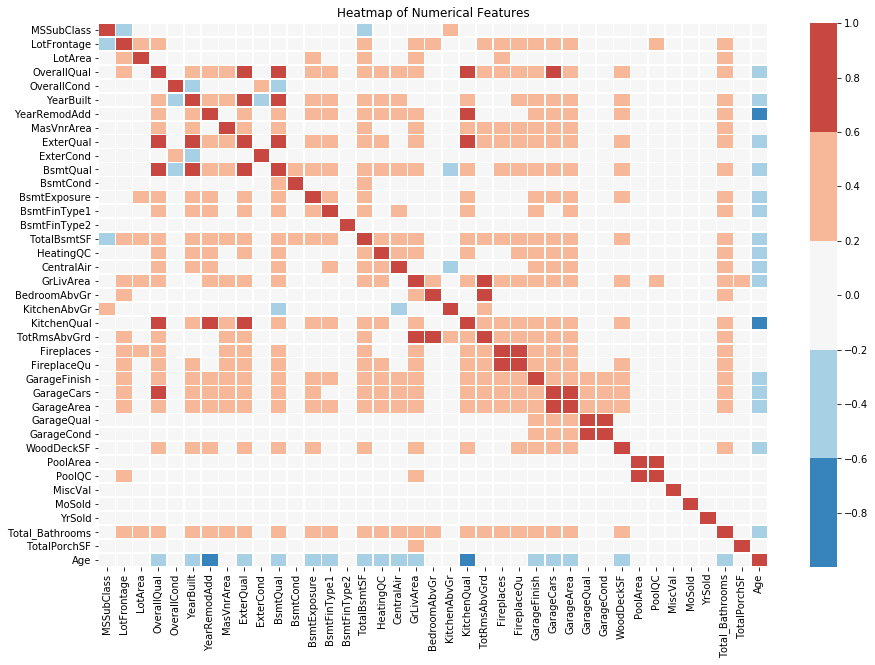

In [259]:
plt.subplots(figsize=(15,10))
ax=sns.heatmap(full.corr(),cmap=sns.color_palette("RdBu_r", 5),linewidths=.7)
cbar = ax.collections[0].colorbar
cbar.set_ticks(np.arange(-1,1.1,0.2))
plt.title("Heatmap of Numerical Features")
plt.show()


<div class="alert alert-warning">
Highly correlated features are chosen whose correlation is shown in red above. We need to delete one of the highly correlated features. To choose one of them, we will compare the correlation of each with the target value and keep the one with the highest correlation.</div>

In [260]:

#compare which of the highly correlated features has a higher correlation with the price
full.PoolArea.corr(y)>full.PoolQC.corr(y)

False

In [261]:

#compare which of the highly correlated features has a higher correlation
full.GarageQual.corr(y)>full.GarageCond.corr(y)

True

In [262]:

#compare which of the highly correlated features has a higher correlation
full.GarageArea.corr(y)>full.GarageCars.corr(y)

False

In [263]:

#compare which of the highly correlated features has a higher correlation
full.ExterQual.corr(y)>full.KitchenQual.corr(y)

True

In [264]:
#drop highly correlated features
full.drop(['PoolArea','GarageCond','GarageArea',"TotRmsAbvGrd",'KitchenQual'],axis=1,inplace=True)




<div class="alert alert-success">
<h1>Training</h1>
</div>

In [265]:
numerical_features,categorical_features=get_features(full)


<div class="alert alert-warning">

We are now going to dummy encode the data.<br>
We have an option to drop a column of the dummy variables. This is to ensure we don't fall in the <a href="http://www.algosome.com/articles/dummy-variable-trap-regression.html">dummy variable trap</a>.

</div>

In [266]:
full_wd=full.copy() #wd=with dummy
full_wod=full.copy() #wod= without dummy

full_wd=pd.get_dummies(full_wd)
full_wod=pd.get_dummies(full_wod,drop_first=True)

train_wd=full_wd.iloc[:index,:]
test_wd=full_wd.iloc[index:,:]

train_wod=full_wod.iloc[:index,:]
test_wod=full_wod.iloc[index:,:]


<div class="alert alert-warning">

We are going to try several models.<br>
We will install the nedded one here.

</div>

In [267]:
!pip install lightgbm

    100% |████████████████████████████████| 716kB 1.2MB/s ta 0:00:01
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.



<div class="alert alert-warning">

We define the models and assess them here.

</div>


<div class="alert alert-warning">

Here is our function for calculating the mean rsme and standard deviation of the rsme.

</div>

In [268]:
def model_score(name,model,mtrain,y,cv=50):
    
    #mse are by default negative in sklearn
    mse=-cross_val_score(model,mtrain,y,cv=cv,scoring='neg_mean_squared_error')
    rmse=np.sqrt(mse)
    average_rmse=np.mean(rmse)
    std=np.std(rmse)
    #print(rmse)
    print("%s: The average RMSE is: %f with a standard deviation of %f." %(name,average_rmse,std))
    return average_rmse,std



<div class="alert alert-warning">

Out of the models that we will use, we have some which are <b>meta-estimators</b> which might give us better results.
For more info,click <a href="http://scikit-learn.org/stable/modules/ensemble.html">here</a>.
</div>

In [269]:
#define models
from sklearn.linear_model import LinearRegression ,ElasticNet, Lasso, LassoLars,HuberRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor
from sklearn.svm import  SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor


In [270]:
models=[LinearRegression(),ElasticNet(),Lasso(),LassoLars(),HuberRegressor(),RandomForestRegressor(),\
        GradientBoostingRegressor(),AdaBoostRegressor(),BaggingRegressor(), ExtraTreesRegressor(),SVR(),\
        LGBMRegressor(),XGBRegressor()]


#LR:Linear Regressor
#EN:Elastic Net
#L:Lasso
#Lar:LassoLars
#HR:HuberRegressor
#RF:Random Forest
#GBR:Gradient Boosting Regressor
#Ada:AdaBoostRegressor
#Bag:BaggingRegressor
#Extra:ExtraTreesRegressor
#SVR:Support Vector Regressor
#LGBMR:Light GBM Regressor
#XGBR:XGB Regressor

names=["LR","EN","L","Lar","HR","RF","GBR","Ada","Bag","Extra", "SVR","LGBMR","XGBR"]


<div class="alert alert-warning">
Although we don't have to apply k-fold cross validation for ensemble methods such as Random Forests and others since by definition random forests are several decision trees, we will do k-fold cross validation on these models to study the standard deviation of these models. 
</div>

LR: The average RMSE is: 0.128947 with a standard deviation of 0.042698.
EN: The average RMSE is: 0.172177 with a standard deviation of 0.051970.
L: The average RMSE is: 0.179298 with a standard deviation of 0.052386.
Lar: The average RMSE is: 0.398519 with a standard deviation of 0.064352.
HR: The average RMSE is: 0.170894 with a standard deviation of 0.052063.
RF: The average RMSE is: 0.148484 with a standard deviation of 0.036599.
GBR: The average RMSE is: 0.127117 with a standard deviation of 0.039404.
Ada: The average RMSE is: 0.174108 with a standard deviation of 0.033708.
Bag: The average RMSE is: 0.148079 with a standard deviation of 0.041187.
Extra: The average RMSE is: 0.146243 with a standard deviation of 0.035813.
SVR: The average RMSE is: 0.396843 with a standard deviation of 0.065563.
LGBMR: The average RMSE is: 0.128632 with a standard deviation of 0.035147.
XGBR: The average RMSE is: 0.126893 with a standard deviation of 0.038967.


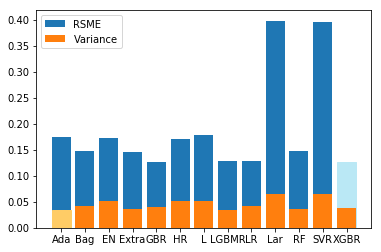

In [190]:
#lists to save rsme and std of each model
errors=[]
stds=[]
cv_=50
#iterate through models,calculate rsme and std,store them in lists
for name,model in zip(names,models):
    rsme,std=model_score(name,model,train_wod,log_y,cv_)
    errors.append(rsme)
    stds.append(std)
#bar plot of model rsme
bar1=plt.bar(names,errors,label="RSME")
bar2=plt.bar(names,stds,label="Variance")
#we change the color of the bar with min rsme and min std to lighter colors
bar1[np.argmin(errors)].set_color('#bae8f5')
bar2[np.argmin(stds)].set_color('#ffcc66')
plt.legend()


LR: The average RMSE is: 0.128944 with a standard deviation of 0.042698.
EN: The average RMSE is: 0.172177 with a standard deviation of 0.051970.
L: The average RMSE is: 0.179298 with a standard deviation of 0.052386.
Lar: The average RMSE is: 0.398519 with a standard deviation of 0.064352.
HR: The average RMSE is: 0.172001 with a standard deviation of 0.052760.
RF: The average RMSE is: 0.145920 with a standard deviation of 0.039825.
GBR: The average RMSE is: 0.127319 with a standard deviation of 0.039875.
Ada: The average RMSE is: 0.174115 with a standard deviation of 0.032819.
Bag: The average RMSE is: 0.144649 with a standard deviation of 0.037005.
Extra: The average RMSE is: 0.143764 with a standard deviation of 0.034898.
SVR: The average RMSE is: 0.396795 with a standard deviation of 0.065595.
LGBMR: The average RMSE is: 0.128511 with a standard deviation of 0.034714.
XGBR: The average RMSE is: 0.126725 with a standard deviation of 0.036599.


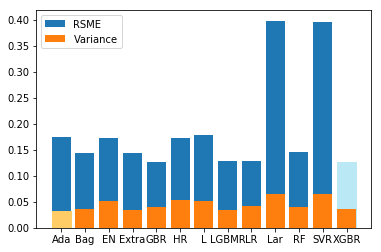

In [192]:
#lists to save rsme and std of each model
errors=[]
stds=[]

#iterate through models,calculate rsme and std,store them in lists
for name,model in zip(names,models):
    rsme,std=model_score(name,model,train_wd,log_y)
    errors.append(rsme)
    stds.append(std)
#bar plot of model rsme
bar1=plt.bar(names,errors,label="RSME")
bar2=plt.bar(names,stds,label="Variance")
#we change the color of the bar with min rsme and min std to lighter colors
bar1[np.argmin(errors)].set_color('#bae8f5')
bar2[np.argmin(stds)].set_color('#ffcc66')
plt.legend()



<div class="alert alert-danger">
<ul>
    <li>Results don't seem better. Feature engineering done was not the best.</li>
    <li>Models vary a lot in their results.</li>
    <li> In the next approach (and hopefully the final), we will try different version of feature engineering,try to optimize the models by parameter tuning and choose the best one.</li>


</ul>

</div>


<div class="alert alert-success">

<h1> Approach #4</h1>
</div>

In [271]:
#import cleaned data
full=full_cleaned.copy()


<div class="alert alert-warning">
Having our cleaned data, we need to select the appropriate features. It turns out that there are some common ways to do so:
<ul><li>RFE: Recursive Forward Elimination</li>
<li>Fitting a random forest and checking the importance of each feature</li>
<li>Fitting a regularized linear model and checking the importance of each feature</li>
    <li>Using VIF to eliminate unimportant features.</li>
<li>Trying to get a sense of the data and choosing the features manually.</li>

</ul>

<br>
In this first phase, we will just fit a random forest and a regularized linear model and check the importances of the feature.
RFE is a good way to go but we have many features and models to choose from,so we will first try to find the best models and then use RFE to see if we get better results. 
</div>


<div class="alert alert-warning">
Before doing so, we have some features which are considered as numerical but in fact should be categorical.<br>
Let's fix that.
</div>

In [272]:
numerical_features,categorical_features=get_features(full)

In [273]:
numerical_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [274]:
#MSSubClass should be categorical
full['MSSubClass'] = full['MSSubClass'].apply(str)

#Year and month sold should also be categorical.
full['YrSold'] = full['YrSold'].astype(str)
full['MoSold'] = full['MoSold'].astype(str)

In [275]:
numerical_features,categorical_features=get_features(full)

In [276]:
numerical_features

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [277]:
categorical_features

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')


<div class="alert alert-warning">
Let's us encode some categorical features into numbers.<br>
The code is copied form the previous approach and we added a few things.
</div>

In [278]:
dict1={'No Pool':0,'Fa':1,'Gd':2,'Ex':3}
full.PoolQC=full.PoolQC.apply(lambda x: dict1[x])

dict1={'NA':0,'Po':1,'TA':2,'Fa':3,'Gd':4,'Ex':5}
full.FireplaceQu=full.FireplaceQu.apply(lambda x: dict1[x])

dict1={'No Garage':0,'Po':1,'TA':2,'Fa':3,'Gd':4,'Ex':5}
full.GarageCond=full.GarageCond.apply(lambda x: dict1[x])
full.GarageQual=full.GarageQual.apply(lambda x: dict1[x])

dict1={'No Garage':0,'Unf':1,'RFn':2,'Fin':3}
full.GarageFinish=full.GarageFinish.apply(lambda x: dict1[x])

dict1={'No Basement':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}
full.BsmtFinType1=full.BsmtFinType1.apply(lambda x: dict1[x])
full.BsmtFinType2=full.BsmtFinType2.apply(lambda x: dict1[x])

dict1={'No Basement':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}
full.BsmtExposure=full.BsmtExposure.apply(lambda x: dict1[x])

dict1={'No Basement':0,'Po':1,'TA':2,'Fa':3,'Gd':4,'Ex':5}
full.BsmtQual=full.BsmtQual.apply(lambda x: dict1[x])
full.BsmtCond=full.BsmtCond.apply(lambda x: dict1[x])

dict1={'Po':1,'TA':2,'Fa':3,'Gd':4,'Ex':5}
full.ExterQual=full.ExterQual.apply(lambda x: dict1[x])
full.ExterCond=full.ExterCond.apply(lambda x: dict1[x])
full.HeatingQC=full.HeatingQC.apply(lambda x: dict1[x])
full.KitchenQual=full.KitchenQual.apply(lambda x: dict1[x])


full.CentralAir=full.CentralAir.apply(lambda x: 1 if x=='Y' else 0)


#added these

#When home functionality is typical,price is higher and it decreases as functionality decreases.
dict1={'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7}
full.Functional=full.Functional.apply(lambda x: dict1[x])

#Lands with gentle slope usually cost more than lands with moderate slope which usually cost more than lands with severe slopes.
dict1={'Sev':0,'Mod':1,'Gtl':2}
full.LandSlope=full.LandSlope.apply(lambda x: dict1[x])



#A paved street costs more, so let's encode 'Pave' with 1 and 'Grvl' with 0.
full.Street=full.Street.apply(lambda x: 1 if x=='Pave' else 0)

#A paved drive costs more.
dict1={'N':0,'P':1,'Y':2}
full.PavedDrive=full.PavedDrive.apply(lambda x: dict1[x])





<div class="alert alert-warning">
Let us also add the features that we added in the last approach.<br>
We will not drop features here,instead we will keep them and will see its importance as a feature for the model later.<br>
We will also add some new features.(<a href="https://www.kaggle.com/humananalog/xgboost-lasso/code">credits</a>)
</div>

In [279]:
full['Total_Bathrooms']=(full.FullBath+full.HalfBath*0.5+full.BsmtFullBath+full.BsmtHalfBath*0.5)

full['TotalPorchSF']=full.OpenPorchSF+full.EnclosedPorch+full['3SsnPorch']+full.ScreenPorch

#2010 because this dataset was available in 2010
full['Age']=2010-full.YearBuilt

#added these 
full["Remodeled"] = (full["YearRemodAdd"] != full["YearBuilt"]) * 1

area_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
             'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 
             'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea' ]

full["TotalArea"] =full[area_cols].sum(axis=1)




In [280]:
numerical_features,categorical_features=get_features(full)


<div class="alert alert-warning">
But first before fitting the data, we need to encode the categorical variables.
</div>

In [281]:
full_hot=pd.get_dummies(full.copy(),drop_first=True)
                                              


<div class="alert alert-warning">
Now let us see the importance of the features. We will compare feature importances obtained from both lasso model and random forest.
</div>

In [282]:
#lasso feature importances
lasso=Lasso()

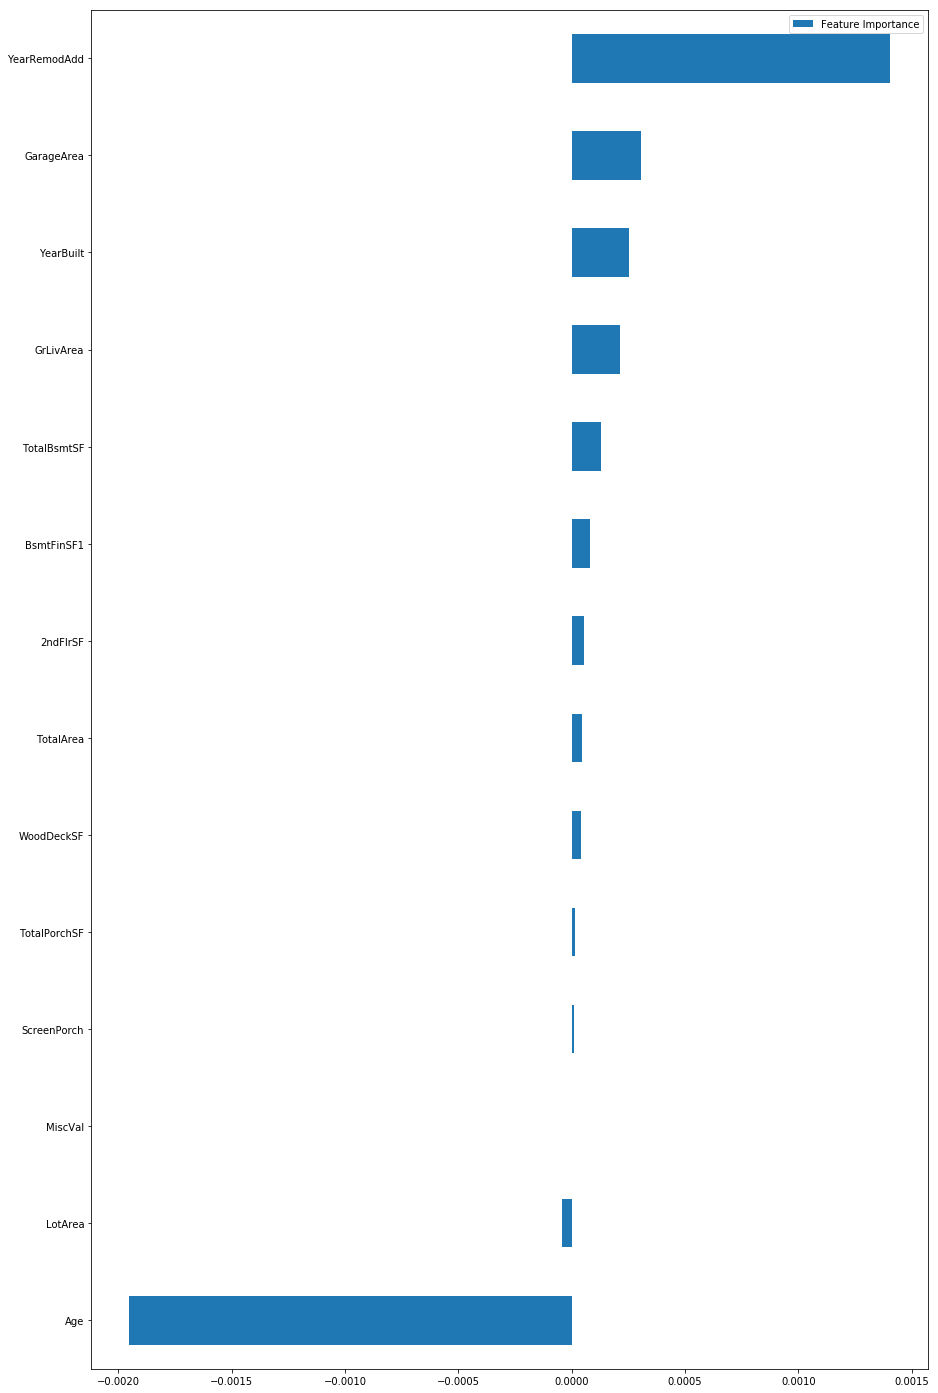

In [283]:
lasso.fit(full_hot.copy().iloc[:index,:],log_y)
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=full_hot.columns)
FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.show()

In [284]:
#try with random forest
rf=RandomForestRegressor()

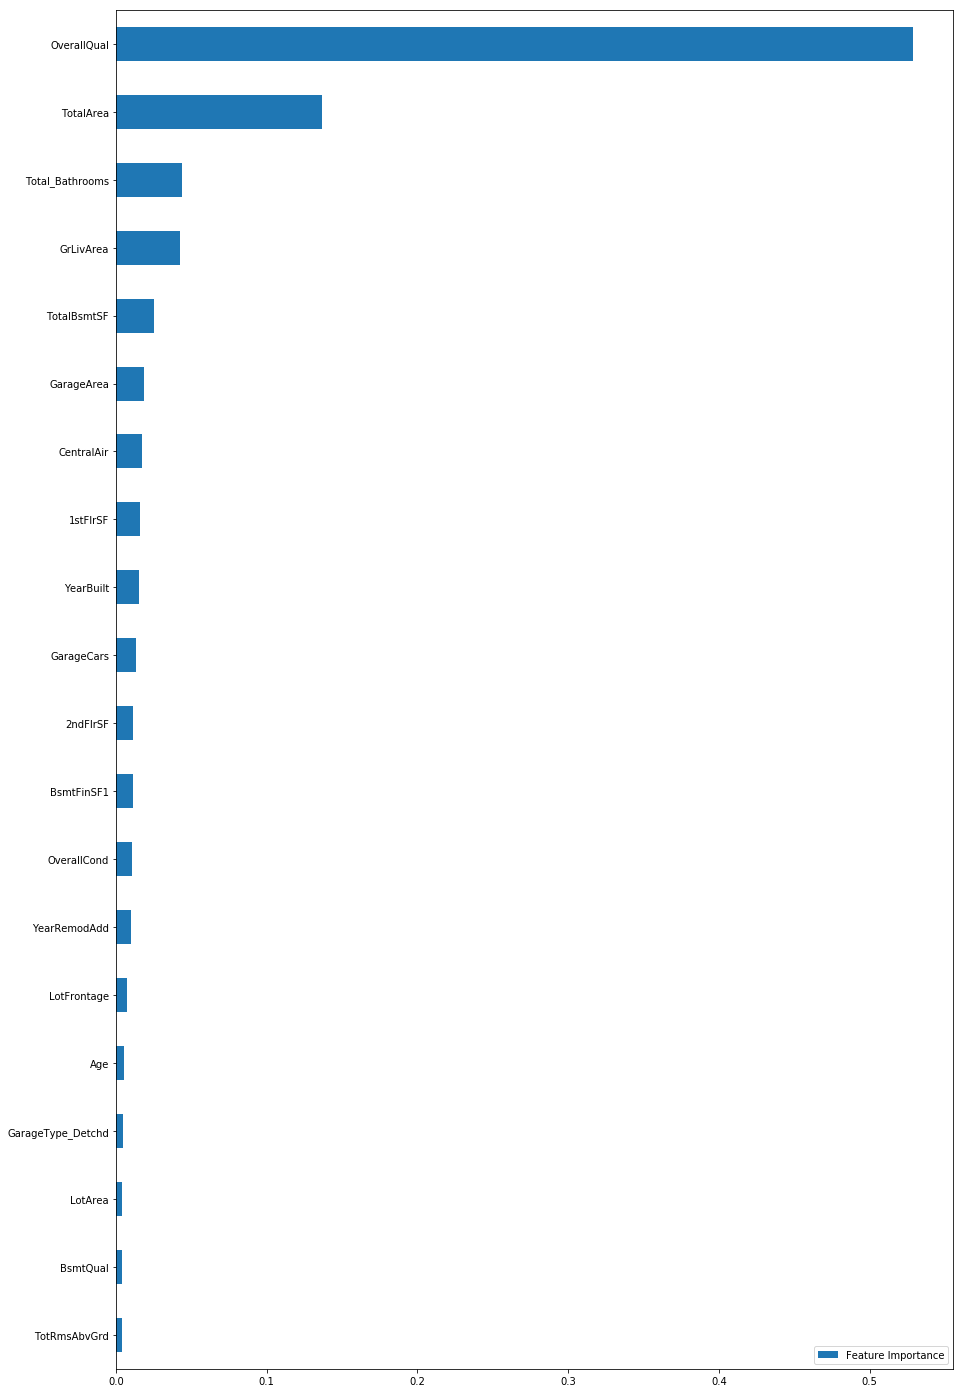

In [285]:
rf.fit(full_hot.copy().iloc[:index,:],log_y)
FI_rf = pd.DataFrame({"Feature Importance":rf.feature_importances_}, index=full_hot.columns)
FI_rf.sort_values("Feature Importance").iloc[-20:,:].plot(kind="barh",figsize=(15,25))
plt.show()


<div class="alert alert-warning">
The results obtained by Lasso seem weird.<br>
A lot of features that should be there such as <b>OverallQual</b> are not.<br>
On the other hand,the features obtained with the random forest are much more reasonable.<br>
Thus we will take the features obtained with random forest.<br>
The problem here is to choose a certain threshold by which a feature is important.<br>
Inspecting the feature importances values, we choose a threshold of <b>0.0001</b>. Although the threshold might seem small,but there are much less values and choosing higher thresholds will remove a lot of features.<br>
</div>

In [287]:
threshold=0.0001

In [288]:
imp_features=FI_rf[FI_rf['Feature Importance']>threshold].index

In [289]:
full_imp=full_hot.copy()[imp_features]


<div class="alert alert-warning">
We now have the most important features.<br>Let's also extract features using <b>VIF</b>.<br>
The variance inflation factor is a measure for the increase of the variance of the parameter estimates if an additional variable, given by exog_idx is added to the linear regression. It is a measure for multicollinearity of the design matrix, exog.<br>
One recommendation is that if VIF is greater than 5, then the explanatory variable given by exog_idx is highly collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of this.(<a href="http://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html"> source</a>)
</div>

In [290]:
!pip install statsmodels

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [291]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [292]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(full_hot.values, i) for i in range(full_hot.shape[1])]
vif["features"] = full_hot.columns

In [293]:
#choose important features
imp_features=vif[vif["VIF Factor"]>5].features.values

full_vif=full_hot.copy()[imp_features]


<div class="alert alert-warning">
We have now two different data sets.<br>
We are going to generate more data sets by scaling the data and applying a <b>Box Cox Transformation</b> for the skewed features.<br> We could have just used the function "log" but applying the box cox transformation gave slightly better results.
<a href="https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard"> Credits</a><br>
For more info about the box cox transformation, click <a href="http://onlinestatbook.com/2/transformations/box-cox.html">here</a>.</div>


<div class="alert alert-warning">
First let's transform the skewed data.<br>
We will use a robust scaler which better deals with outliers.
From these 2 datasets, we will produce another 2 where we apply the box cox transformation for skewed variables.</div>

In [294]:
from scipy.special import boxcox1p

#for full_imp
skew=pd.DataFrame()
skew['Skew']=full_imp.skew()
skewed_columns=skew[skew>0.7].dropna().index
full_imp_skewed=full_imp.copy()
full_imp_skewed[skewed_columns]=boxcox1p(full_imp_skewed[skewed_columns],0.15)


#for full_vif
skew=pd.DataFrame()
skew['Skew']=full_vif.skew()
skewed_columns=skew[skew>0.7].dropna().index
full_vif_skewed=full_vif.copy()
full_vif_skewed[skewed_columns]=boxcox1p(full_vif_skewed[skewed_columns],0.15)



<div class="alert alert-warning">
Now let's transform the skewed data.<br>
We will use a robust scaler which better deals with outliers.
From the 4 datasets we have, we will produce another 4 where are a scaled version.</div>

In [295]:
from sklearn.preprocessing import RobustScaler

In [296]:
scaler=RobustScaler()

In [297]:
full_imp_scaled=full_imp.copy()
full_imp_scaled[full_imp.columns]=scaler.fit_transform(full_imp_scaled)

In [298]:
full_imp_skewed_scaled=full_imp_skewed.copy()
full_imp_skewed_scaled[full_imp_skewed.columns]=scaler.fit_transform(full_imp_skewed_scaled)

In [299]:
full_vif_scaled=full_vif.copy()
full_vif_scaled[full_vif_scaled.columns]=scaler.fit_transform(full_vif_scaled)

In [300]:
full_vif_skewed_scaled=full_vif_skewed.copy()
full_vif_skewed_scaled[full_vif_skewed_scaled.columns]=scaler.fit_transform(full_vif_skewed_scaled)


<div class="alert alert-warning">
We now have 8 different data sets.<br>
Let's join them in one list.</div>

In [301]:
datasets=[full_imp,full_imp_skewed,full_imp_scaled,full_imp_skewed_scaled,full_vif,full_vif_skewed,full_vif_scaled,full_vif_skewed_scaled]

In [302]:
datasets_names=["full_imp","full_imp_skewed","full_imp_scaled","full_imp_skewed_scaled","full_vif","full_vif_skewed","full_vif_scaled","full_vif_skewed_scaled"]


<div class="alert alert-warning">
We can now train our models.</div>

In [118]:
from sklearn.cross_validation import cross_val_score
def model_score(name,model,mtrain,y,cv=50):
    
    #mse are by default negative in sklearn
    mse=-cross_val_score(model,mtrain,y,cv=cv,scoring='neg_mean_squared_error')
    rmse=np.sqrt(mse)
    average_rmse=np.mean(rmse)
    std=np.std(rmse)
    #print(rmse)
    print("%s: The average RMSE is: %f with a standard deviation of %f." %(name,average_rmse,std))
    return average_rmse,std


In [306]:
#define models
from sklearn.linear_model import LinearRegression ,ElasticNet, Lasso, LassoLars,HuberRegressor,Ridge,BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor
from sklearn.svm import  SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor


In [120]:
models=[LinearRegression(),ElasticNet(),Lasso(),LassoLars(),HuberRegressor(),RandomForestRegressor(),\
        GradientBoostingRegressor(n_estimators=500,loss='huber'),AdaBoostRegressor(),BaggingRegressor(), ExtraTreesRegressor(),SVR(),\
        LGBMRegressor(objective='regression',n_estimators=500),XGBRegressor(n_estimators=500),KernelRidge(kernel='polynomial'),Ridge(),BayesianRidge()]


#LR:Linear Regressor
#EN:Elastic Net
#L:Lasso
#Lar:LassoLars
#HR:HuberRegressor
#RF:Random Forest
#GBR:Gradient Boosting Regressor
#Ada:AdaBoostRegressor
#Bag:BaggingRegressor
#Extra:ExtraTreesRegressor
#SVR:Support Vector Regressor
#LGBMR:Light GBM Regressor
#XGBR:XGB Regressor
#KR: Kernel Ridge
#R:Ridge
#BR:Bayesian Ridge
names=["LR","EN","L","Lar","HR","RF","GBR","Ada","Bag","Extra", "SVR","LGBMR","XGBR","KR","R","BR"]

LR: The average RMSE is: 0.124118 with a standard deviation of 0.045235.
EN: The average RMSE is: 0.163913 with a standard deviation of 0.051284.
L: The average RMSE is: 0.171157 with a standard deviation of 0.052029.
Lar: The average RMSE is: 0.398519 with a standard deviation of 0.064352.
HR: The average RMSE is: 0.162140 with a standard deviation of 0.051853.
RF: The average RMSE is: 0.143477 with a standard deviation of 0.036276.
GBR: The average RMSE is: 0.123962 with a standard deviation of 0.041423.
Ada: The average RMSE is: 0.170529 with a standard deviation of 0.034180.
Bag: The average RMSE is: 0.143416 with a standard deviation of 0.040869.
Extra: The average RMSE is: 0.142532 with a standard deviation of 0.035357.
SVR: The average RMSE is: 0.397461 with a standard deviation of 0.065301.
LGBMR: The average RMSE is: 0.124818 with a standard deviation of 0.033953.
XGBR: The average RMSE is: 0.124171 with a standard deviation of 0.038004.
KR: The average RMSE is: 5.031851 with 

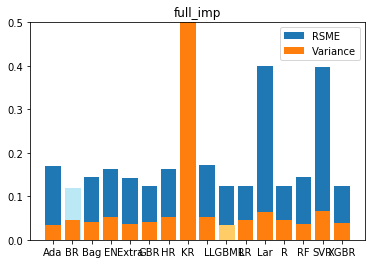

LR: The average RMSE is: 0.122452 with a standard deviation of 0.036513.
EN: The average RMSE is: 0.259958 with a standard deviation of 0.049730.
L: The average RMSE is: 0.263615 with a standard deviation of 0.051129.
Lar: The average RMSE is: 0.398519 with a standard deviation of 0.064352.
HR: The average RMSE is: 0.282480 with a standard deviation of 0.065255.
RF: The average RMSE is: 0.148326 with a standard deviation of 0.041908.
GBR: The average RMSE is: 0.124987 with a standard deviation of 0.041626.
Ada: The average RMSE is: 0.170051 with a standard deviation of 0.032370.
Bag: The average RMSE is: 0.145537 with a standard deviation of 0.037147.
Extra: The average RMSE is: 0.142720 with a standard deviation of 0.037727.
SVR: The average RMSE is: 0.319470 with a standard deviation of 0.065922.
LGBMR: The average RMSE is: 0.124807 with a standard deviation of 0.033930.
XGBR: The average RMSE is: 0.124069 with a standard deviation of 0.038015.
KR: The average RMSE is: 0.296542 with 

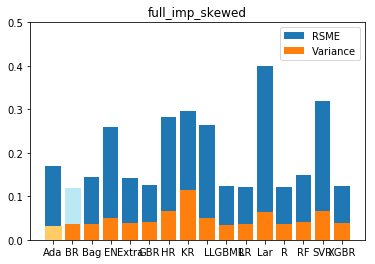

LR: The average RMSE is: 0.124220 with a standard deviation of 0.045304.
EN: The average RMSE is: 0.392857 with a standard deviation of 0.064027.
L: The average RMSE is: 0.393253 with a standard deviation of 0.063663.
Lar: The average RMSE is: 0.398519 with a standard deviation of 0.064352.
HR: The average RMSE is: 1.458720 with a standard deviation of 0.278596.
RF: The average RMSE is: 0.147080 with a standard deviation of 0.038503.
GBR: The average RMSE is: 0.124353 with a standard deviation of 0.042702.
Ada: The average RMSE is: 0.170995 with a standard deviation of 0.033179.
Bag: The average RMSE is: 0.147939 with a standard deviation of 0.037449.
Extra: The average RMSE is: 0.144019 with a standard deviation of 0.036886.
SVR: The average RMSE is: 0.195149 with a standard deviation of 0.063452.
LGBMR: The average RMSE is: 0.125113 with a standard deviation of 0.033151.
XGBR: The average RMSE is: 0.124279 with a standard deviation of 0.038021.
KR: The average RMSE is: 1.105860 with 

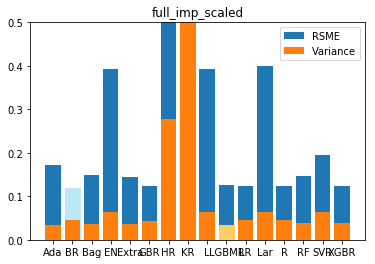

LR: The average RMSE is: 0.125612 with a standard deviation of 0.039048.
EN: The average RMSE is: 0.398519 with a standard deviation of 0.064352.
L: The average RMSE is: 0.398519 with a standard deviation of 0.064352.
Lar: The average RMSE is: 0.398519 with a standard deviation of 0.064352.
HR: The average RMSE is: 0.145000 with a standard deviation of 0.042663.
RF: The average RMSE is: 0.146933 with a standard deviation of 0.038445.
GBR: The average RMSE is: 0.123915 with a standard deviation of 0.043270.
Ada: The average RMSE is: 0.173475 with a standard deviation of 0.034072.
Bag: The average RMSE is: 0.144262 with a standard deviation of 0.039097.
Extra: The average RMSE is: 0.141477 with a standard deviation of 0.038251.
SVR: The average RMSE is: 0.128022 with a standard deviation of 0.041803.
LGBMR: The average RMSE is: 0.125096 with a standard deviation of 0.033130.
XGBR: The average RMSE is: 0.124178 with a standard deviation of 0.038033.
KR: The average RMSE is: 0.133004 with 

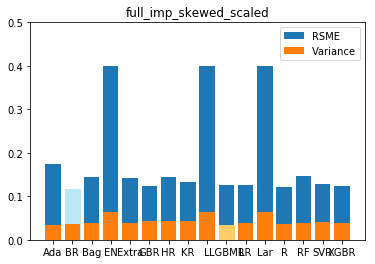

LR: The average RMSE is: 190.731013 with a standard deviation of 1080.517915.
EN: The average RMSE is: 0.174541 with a standard deviation of 0.053177.
L: The average RMSE is: 0.177836 with a standard deviation of 0.052648.
Lar: The average RMSE is: 0.398519 with a standard deviation of 0.064352.
HR: The average RMSE is: 0.175643 with a standard deviation of 0.053243.
RF: The average RMSE is: 0.151557 with a standard deviation of 0.038649.
GBR: The average RMSE is: 0.142244 with a standard deviation of 0.042493.
Ada: The average RMSE is: 0.178623 with a standard deviation of 0.035352.
Bag: The average RMSE is: 0.153763 with a standard deviation of 0.039021.
Extra: The average RMSE is: 0.150416 with a standard deviation of 0.039792.
SVR: The average RMSE is: 0.397433 with a standard deviation of 0.065311.
LGBMR: The average RMSE is: 0.145108 with a standard deviation of 0.033010.
XGBR: The average RMSE is: 0.139838 with a standard deviation of 0.040911.
KR: The average RMSE is: 2.857032 

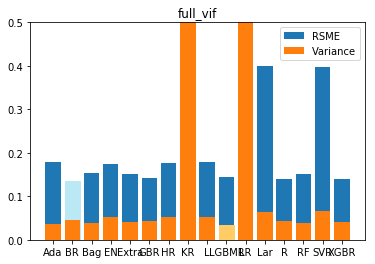

LR: The average RMSE is: 3603.501612 with a standard deviation of 22687.128280.
EN: The average RMSE is: 0.275552 with a standard deviation of 0.052568.
L: The average RMSE is: 0.277220 with a standard deviation of 0.052972.
Lar: The average RMSE is: 0.398519 with a standard deviation of 0.064352.
HR: The average RMSE is: 0.261023 with a standard deviation of 0.070999.
RF: The average RMSE is: 0.153671 with a standard deviation of 0.039764.
GBR: The average RMSE is: 0.143295 with a standard deviation of 0.044679.
Ada: The average RMSE is: 0.178823 with a standard deviation of 0.033318.
Bag: The average RMSE is: 0.151137 with a standard deviation of 0.039644.
Extra: The average RMSE is: 0.148088 with a standard deviation of 0.038925.
SVR: The average RMSE is: 0.295764 with a standard deviation of 0.060064.
LGBMR: The average RMSE is: 0.145044 with a standard deviation of 0.032920.
XGBR: The average RMSE is: 0.139805 with a standard deviation of 0.040917.
KR: The average RMSE is: 0.53715

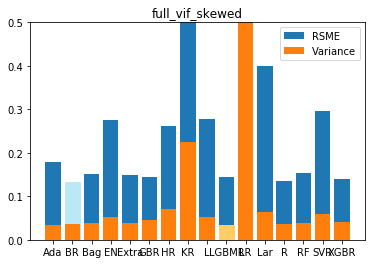

LR: The average RMSE is: 0.145249 with a standard deviation of 0.046849.
EN: The average RMSE is: 0.398127 with a standard deviation of 0.077649.
L: The average RMSE is: 0.397766 with a standard deviation of 0.074542.
Lar: The average RMSE is: 0.398519 with a standard deviation of 0.064352.
HR: The average RMSE is: 2.150668 with a standard deviation of 0.381973.
RF: The average RMSE is: 0.154684 with a standard deviation of 0.039999.
GBR: The average RMSE is: 0.142801 with a standard deviation of 0.044055.
Ada: The average RMSE is: 0.178569 with a standard deviation of 0.033476.
Bag: The average RMSE is: 0.156491 with a standard deviation of 0.037155.
Extra: The average RMSE is: 0.149674 with a standard deviation of 0.040028.
SVR: The average RMSE is: 0.218709 with a standard deviation of 0.062930.
LGBMR: The average RMSE is: 0.146080 with a standard deviation of 0.032177.
XGBR: The average RMSE is: 0.139831 with a standard deviation of 0.040903.
KR: The average RMSE is: 103.532565 wit

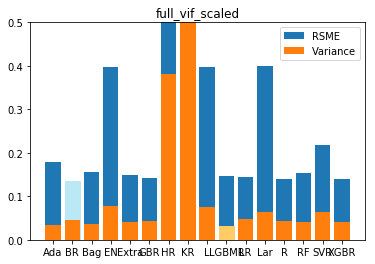

LR: The average RMSE is: 11475979.424061 with a standard deviation of 50230689.945059.
EN: The average RMSE is: 0.398519 with a standard deviation of 0.064352.
L: The average RMSE is: 0.398519 with a standard deviation of 0.064352.
Lar: The average RMSE is: 0.398519 with a standard deviation of 0.064352.
HR: The average RMSE is: 0.203946 with a standard deviation of 0.072745.
RF: The average RMSE is: 0.154108 with a standard deviation of 0.040019.
GBR: The average RMSE is: 0.142570 with a standard deviation of 0.044024.
Ada: The average RMSE is: 0.177743 with a standard deviation of 0.034859.
Bag: The average RMSE is: 0.154938 with a standard deviation of 0.039456.
Extra: The average RMSE is: 0.151775 with a standard deviation of 0.037277.
SVR: The average RMSE is: 0.147555 with a standard deviation of 0.044955.
LGBMR: The average RMSE is: 0.146068 with a standard deviation of 0.032149.
XGBR: The average RMSE is: 0.139805 with a standard deviation of 0.040917.
KR: The average RMSE is: 

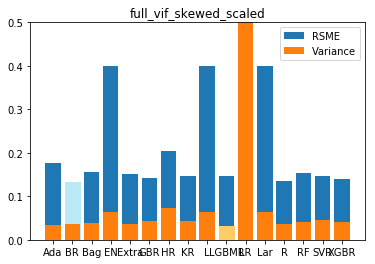

In [264]:
for i in range(len(datasets)):
    data=datasets[i]
    
    #get train dataset
    train=data.iloc[:index,:]

    #lists to save rsme and std of each model
    errors=[]
    stds=[]
    cv_=50
    #iterate through models,calculate rsme and std,store them in lists
    for name,model in zip(names,models):
        rsme,std=model_score(name,model,train,log_y,cv_)
        errors.append(rsme)
        stds.append(std)
    #bar plot of model rsme
    plt.figure()
    plt.title(datasets_names[i])
    plt.ylim([0,0.5])
    bar1=plt.bar(names,errors,label="RSME")
    bar2=plt.bar(names,stds,label="Variance")
    #we change the color of the bar with min rsme and min std to lighter colors
    bar1[np.argmin(errors)].set_color('#bae8f5')
    bar2[np.argmin(stds)].set_color('#ffcc66')
    plt.legend()
    plt.show()



<div class="alert alert-warning">
It seems that features using the Random Forest feature importance have produced beter results than using VIF.<br>
The Bayesian Ridge produced the lowest error in all datasets.<br>
<br>The lowest result was using the data set "full_imp_skewed_scaled",so we will from now on train the models in this data set.
</div>


<div class="alert alert-warning">
Let's try doing some grid search to try and optimize the models.<br> We will choose the models with the lowest errors in this data set which are Bayesian Ridge,Ridge,Gradient Boosting Regressor, and XGBoost.</div>

In [303]:
from sklearn.model_selection import GridSearchCV


<div class="alert alert-warning">
We start with the Bayesian Ridge.</div>

In [304]:
train=full_imp_skewed_scaled.iloc[:index,:]

In [72]:
parameters=[{'n_iter':[300,1000],'tol':[0.1,0.001],'alpha_1':[1e-6,1e-4],\
             'lambda_1':[1e-6,1e-4]}]

BR=BayesianRidge()
grid_search= GridSearchCV(estimator=BR,param_grid=parameters,scoring='neg_mean_squared_error',cv=50,n_jobs=-1,verbose=1)
grid_search=grid_search.fit(train,log_y)
print("The best score is %f." %(grid_search.best_score_))
print("The best parameters are ",grid_search.best_params_ )
grid_search.grid_scores_

Fitting 50 folds for each of 16 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:  3.1min


The best score is -0.015141.
The best parameters are  {'alpha_1': 1e-06, 'n_iter': 300, 'lambda_1': 0.0001, 'tol': 0.001}


[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  3.3min finished
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -0.01515, std: 0.01178, params: {'alpha_1': 1e-06, 'n_iter': 300, 'lambda_1': 1e-06, 'tol': 0.1},
 mean: -0.01514, std: 0.01178, params: {'alpha_1': 1e-06, 'n_iter': 300, 'lambda_1': 1e-06, 'tol': 0.001},
 mean: -0.01515, std: 0.01178, params: {'alpha_1': 1e-06, 'n_iter': 1000, 'lambda_1': 1e-06, 'tol': 0.1},
 mean: -0.01514, std: 0.01178, params: {'alpha_1': 1e-06, 'n_iter': 1000, 'lambda_1': 1e-06, 'tol': 0.001},
 mean: -0.01515, std: 0.01178, params: {'alpha_1': 1e-06, 'n_iter': 300, 'lambda_1': 0.0001, 'tol': 0.1},
 mean: -0.01514, std: 0.01178, params: {'alpha_1': 1e-06, 'n_iter': 300, 'lambda_1': 0.0001, 'tol': 0.001},
 mean: -0.01515, std: 0.01178, params: {'alpha_1': 1e-06, 'n_iter': 1000, 'lambda_1': 0.0001, 'tol': 0.1},
 mean: -0.01514, std: 0.01178, params: {'alpha_1': 1e-06, 'n_iter': 1000, 'lambda_1': 0.0001, 'tol': 0.001},
 mean: -0.01515, std: 0.01178, params: {'alpha_1': 0.0001, 'n_iter': 300, 'lambda_1': 1e-06, 'tol': 0.1},
 mean: -0.01514, std: 0.01178, params:

In [308]:
b=BayesianRidge(alpha_1=1e-6,n_iter=300,lambda_1=0.0001,tol=0.001)
mse=-cross_val_score(b,train,log_y,cv=50,scoring='neg_mean_squared_error')
rmse=np.sqrt(mse)
average_rmse=np.mean(rmse)
std=np.std(rmse)
#print(rmse)
print(" The average RMSE is: %f with a standard deviation of %f." %(average_rmse,std))


 The average RMSE is: 0.118915 with a standard deviation of 0.035495.



<div class="alert alert-warning">
Let's look at Ridge now.</div>

In [91]:
parameters=[{'alpha':[1.e-4,0.1,1,5,10],'fit_intercept':[True,False],'tol':[0.001,0.1,1]}]

R=Ridge()
grid_search= GridSearchCV(estimator=R,param_grid=parameters,scoring='neg_mean_squared_error',cv=50,n_jobs=-1,verbose=1)
grid_search=grid_search.fit(train,log_y)
print("The best score is %f." %(grid_search.best_score_))
print("The best parameters are ",grid_search.best_params_ )

Fitting 50 folds for each of 30 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 199 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 449 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 799 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 1249 tasks      | elapsed:  1.3min


The best score is -0.015119.
The best parameters are  {'alpha': 10, 'fit_intercept': True, 'tol': 0.001}


[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  1.6min finished


In [309]:
R=Ridge(alpha=10,fit_intercept=True,tol=0.001)
mse=-cross_val_score(R,train,log_y,cv=50,scoring='neg_mean_squared_error')
rmse=np.sqrt(mse)
average_rmse=np.mean(rmse)
std=np.std(rmse)
#print(rmse)
print(" The average RMSE is: %f with a standard deviation of %f." %(average_rmse,std))


 The average RMSE is: 0.118841 with a standard deviation of 0.035453.



<div class="alert alert-warning">
Let's look at Gradient Boosting Regressor.</div>

In [80]:
parameters=[{'loss':['ls','huber'],'learning_rate':[0.1,0.01,1],'n_estimators':[100,300,500],'max_depth':[3,7,10,15]}]

GBR=GradientBoostingRegressor()
grid_search= GridSearchCV(estimator=GBR,param_grid=parameters,scoring='neg_mean_squared_error',cv=50,n_jobs=-1,verbose=1)
grid_search=grid_search.fit(train,log_y)
print("The best score is %f." %(grid_search.best_score_))
print("The best parameters are ",grid_search.best_params_ )

Fitting 50 folds for each of 72 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1186 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 1736 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 2386 tasks      | elapsed: 69.4min
[Parallel(n_jobs=-1)]: Done 3136 tasks      | elapsed: 72.2min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed: 73.6min finished


The best score is -0.016856.
The best parameters are  {'n_estimators': 500, 'learning_rate': 0.1, 'max_depth': 3, 'loss': 'ls'}


In [310]:
GBR=GradientBoostingRegressor(loss='ls',n_estimators=500,learning_rate=0.1,max_depth=3)
mse=-cross_val_score(GBR,train,log_y,cv=50,scoring='neg_mean_squared_error')
rmse=np.sqrt(mse)
average_rmse=np.mean(rmse)
std=np.std(rmse)
#print(rmse)
print(" The average RMSE is: %f with a standard deviation of %f." %(average_rmse,std))


 The average RMSE is: 0.124749 with a standard deviation of 0.040219.



<div class="alert alert-warning">
Let's look at XGBoost.</div>

In [78]:
parameters=[{'booster':['gbtree','dart'],'n_estimators':[100,300],'gamma':[0,0.5,1],'max_depth':[3,7,10],\
             'reg_lambda':[0.1,1],'reg_alpha':[0.1,1]}]

XGBR=XGBRegressor()
grid_search= GridSearchCV(estimator=XGBR,param_grid=parameters,scoring='neg_mean_squared_error',cv=50,n_jobs=-1,verbose=1)
grid_search=grid_search.fit(train,log_y)
print("The best score is %f." %(grid_search.best_score_))
print("The best parameters are ",grid_search.best_params_ )
grid_search.grid_scores_

Fitting 50 folds for each of 144 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1186 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1736 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 2386 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 3136 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 3986 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 4936 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 5986 tasks      | elapsed: 58.5min
[Parallel(n_jobs=-1)]: Done 7136 tasks      | elapsed: 73.3min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 74.6min finished


The best score is -0.016699.
The best parameters are  {'booster': 'dart', 'reg_alpha': 1, 'max_depth': 3, 'reg_lambda': 0.1, 'n_estimators': 300, 'gamma': 0}


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -0.01787, std: 0.01214, params: {'booster': 'gbtree', 'reg_alpha': 0.1, 'max_depth': 3, 'reg_lambda': 0.1, 'n_estimators': 100, 'gamma': 0},
 mean: -0.01793, std: 0.01138, params: {'booster': 'gbtree', 'reg_alpha': 0.1, 'max_depth': 3, 'reg_lambda': 1, 'n_estimators': 100, 'gamma': 0},
 mean: -0.01822, std: 0.01056, params: {'booster': 'gbtree', 'reg_alpha': 1, 'max_depth': 3, 'reg_lambda': 0.1, 'n_estimators': 100, 'gamma': 0},
 mean: -0.01862, std: 0.01114, params: {'booster': 'gbtree', 'reg_alpha': 1, 'max_depth': 3, 'reg_lambda': 1, 'n_estimators': 100, 'gamma': 0},
 mean: -0.01720, std: 0.01209, params: {'booster': 'gbtree', 'reg_alpha': 0.1, 'max_depth': 3, 'reg_lambda': 0.1, 'n_estimators': 300, 'gamma': 0},
 mean: -0.01704, std: 0.01135, params: {'booster': 'gbtree', 'reg_alpha': 0.1, 'max_depth': 3, 'reg_lambda': 1, 'n_estimators': 300, 'gamma': 0},
 mean: -0.01671, std: 0.01050, params: {'booster': 'gbtree', 'reg_alpha': 1, 'max_depth': 3, 'reg_lambda': 0.1, 'n_estimat

In [312]:
XGBR=XGBRegressor(booster='dart',reg_alpha=1,max_depth=3,reg_lambda=0.1,n_estimators=300,gamma=0)
mse=-cross_val_score(XGBR,train,log_y,cv=50,scoring='neg_mean_squared_error')
rmse=np.sqrt(mse)
average_rmse=np.mean(rmse)
std=np.std(rmse)
#print(rmse)
print(" The average RMSE is: %f with a standard deviation of %f." %(average_rmse,std))


 The average RMSE is: 0.125201 with a standard deviation of 0.035950.



<div class="alert alert-warning">
We see that we get slightly better results/<br>
Let us now try building a better regressor by stacking several regressors together.<br>
We write a simple class that takes some models and returns the average of their predicitons.</div>

In [313]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone


In [129]:
#https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [130]:
#average
averaged_models = AveragingModels(models = (b, R, GBR, XGBR))

mse=-cross_val_score(averaged_models,train,log_y,cv=50,scoring='neg_mean_squared_error')
rmse=np.sqrt(mse)
average_rmse=np.mean(rmse)
std=np.std(rmse)
#print(rmse)
print(" The average RMSE is: %f with a standard deviation of %f." %(average_rmse,std))


 The average RMSE is: 0.113766 with a standard deviation of 0.036917.



<div class="alert alert-warning">
Now I am going to weight the models arbitrarly and see if we get better results.</div>

In [132]:
#https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        
        w=np.array([0.3,0.3,0.2,0.2])
        
        return np.dot(predictions, w.T)   

In [133]:


#average
averaged_models = AveragingModels(models = (b, R, GBR, XGBR))

mse=-cross_val_score(averaged_models,train,log_y,cv=50,scoring='neg_mean_squared_error')
rmse=np.sqrt(mse)
average_rmse=np.mean(rmse)
std=np.std(rmse)
#print(rmse)
print(" The average RMSE is: %f with a standard deviation of %f." %(average_rmse,std))


 The average RMSE is: 0.113737 with a standard deviation of 0.036959.



<div class="alert alert-warning">
let's try other values for the weights.</div>

In [134]:
#https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        
        w=np.array([0.4,0.3,0.2,0.1])
        
        return np.dot(predictions, w.T)   

In [135]:


#average
averaged_models = AveragingModels(models = (b, R, GBR, XGBR))

mse=-cross_val_score(averaged_models,train,log_y,cv=50,scoring='neg_mean_squared_error')
rmse=np.sqrt(mse)
average_rmse=np.mean(rmse)
std=np.std(rmse)
#print(rmse)
print(" The average RMSE is: %f with a standard deviation of %f." %(average_rmse,std))


 The average RMSE is: 0.113836 with a standard deviation of 0.036795.



<div class="alert alert-warning">
Let's try one more.</div>

In [136]:
# credits: https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        
        w=np.array([0.5,0.2,0.1,0.1])
        
        return np.dot(predictions, w.T)   

In [137]:


#average
averaged_models = AveragingModels(models = (b, R, GBR, XGBR))

mse=-cross_val_score(averaged_models,train,log_y,cv=50,scoring='neg_mean_squared_error')
rmse=np.sqrt(mse)
average_rmse=np.mean(rmse)
std=np.std(rmse)
#print(rmse)
print(" The average RMSE is: %f with a standard deviation of %f." %(average_rmse,std))


 The average RMSE is: 1.209081 with a standard deviation of 0.024228.



<div class="alert alert-warning">
Let's try a Neural Network using Keras.</div>

In [106]:
!pip install keras

    100% |################################| 348kB 1.6MB/s ta 0:00:01
    100% |################################| 256kB 2.0MB/s ta 0:00:01
  Running setup.py bdist_wheel for pyyaml ... done
  Stored in directory: /root/.cache/pip/wheels/03/05/65/bdc14f2c6e09e82ae3e0f13d021e1b6b2481437ea2f207df3f
Successfully built pyyaml
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [113]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [119]:

def baseline_model():
    model = Sequential()
    model.add(Dense(130, input_dim=130,kernel_initializer='normal', activation='relu'))
    model.add(Dense(80, activation='relu',kernel_initializer='normal'))
    model.add(Dense(40, activation='relu',kernel_initializer='normal'))
    model.add(Dense(20, activation='relu',kernel_initializer='normal'))
    model.add(Dense(10, activation='relu',kernel_initializer='normal'))
    model.add(Dense(1,kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model



In [120]:

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

In [123]:

kfold = KFold(n_splits=50, random_state=seed)
results = cross_val_score(estimator, train, log_y, cv=kfold,verbose=1)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -0.17 (0.09) MSE


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 54.5min finished



<div class="alert alert-warning">
The best model seems to be the stacked one.</div>

In [170]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        #self.models_ = [clone(x) for x in self.models]
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        
        w=np.array([0.3,0.3,0.2,0.2])
        
        return np.dot(predictions, w.T)   
    
    



In [171]:
#average
averaged_models = AveragingModels(models = (b, R, GBR, XGBR))
mse=-cross_val_score(averaged_models,train,log_y,cv=50,scoring='neg_mean_squared_error')
rmse=np.sqrt(mse)
average_rmse=np.mean(rmse)
std=np.std(rmse)
#print(rmse)
print(" The average RMSE is: %f with a standard deviation of %f." %(average_rmse,std))


 The average RMSE is: 0.113683 with a standard deviation of 0.037014.


In [139]:
test=full_imp_skewed_scaled.iloc[index:,:]

In [145]:
test.shape

(260, 130)

In [172]:
averaged_models.fit(train,log_y)
y_pred=averaged_models.predict(test)

In [175]:
y_pred=np.exp(y_pred)

In [176]:
submissions=pd.DataFrame({'Id':test_ID,'SalePrice':y_pred})
submissions.to_csv('submission.csv',index=False)


<div class="alert alert-warning">
Before we conclude,we want to test another neural network. The following neural network is just for comparison. Credits for the code go entirely to <a href="https://www.kaggle.com/liuhdsgoal/just-nn-use-gluon-top-5/code">Johnny Liu</a>. He uses a package called <a href="https://mxnet.incubator.apache.org/api/python/gluon/gluon.html">Gluon</a> from the <b>MXNet</b> library.
</div>

In [178]:
!pip install mxnet

    100% |████████████████████████████████| 23.8MB 58kB/s  eta 0:00:01
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [182]:
import mxnet as mx
from mxnet import gluon
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from mxnet import ndarray as nd
from mxnet import autograd
from mxnet import gluon

In [191]:
X_train,X_test=import_data()

In [192]:
all_X = pd.concat((X_train.loc[:, 'MSSubClass':'SaleCondition'],
                      X_test.loc[:, 'MSSubClass':'SaleCondition']))

In [193]:
numnic_feats = all_X.dtypes[all_X.dtypes!='object'].index
all_X[numnic_feats] = all_X[numnic_feats].apply(lambda x: (x-x.mean())/x.std())

In [194]:
all_X = pd.get_dummies(all_X, dummy_na=True)


In [195]:
all_X = all_X.fillna(all_X.mean())


In [198]:
num_train = X_train.shape[0]
X_train = all_X[:num_train].as_matrix()
X_test = all_X[num_train:].as_matrix()
y_train = y.as_matrix()

In [199]:
from mxnet import ndarray as nd
from mxnet import autograd
from mxnet import gluon

X_train = nd.array(X_train)
y_train = nd.array(y_train)
y_train.reshape((num_train, 1))

X_test = nd.array(X_test)

In [200]:
square_loss = gluon.loss.L2Loss()


def get_rmse_log(net, X_train,y_train):
    num_train = X_train.shape[0]
    clipped_preds = nd.clip(net(X_train), 1, float('inf'))
    return nd.sqrt(2*nd.sum(square_loss(nd.log(clipped_preds),nd.log(y_train))/num_train)).asscalar()    

In [201]:
def get_net():
    net = gluon.nn.Sequential()
    with net.name_scope():
        net.add(gluon.nn.Dense(128, activation='relu'))
        net.add(gluon.nn.Dropout(0.01))
#         net.add(gluon.nn.Dense(32, activation='relu'))
#         net.add(gluon.nn.Dropout(0.2))
        net.add(gluon.nn.Dense(1))
    net.initialize()
    return net

In [202]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 120
import matplotlib.pyplot as plt

def train(net, X_train, y_train, X_test, y_test, epochs,
          verbose_epoch, learning_rate, weight_decay):
    train_loss = []
    if X_test is not None:
        test_loss = []
    batch_size = 100
    dataset_train = gluon.data.ArrayDataset(X_train, y_train)
    data_iter_train = gluon.data.DataLoader(
        dataset_train, batch_size,shuffle=True)
    trainer = gluon.Trainer(net.collect_params(), 'adam',
                            {'learning_rate': learning_rate,
                             'wd': weight_decay})
    net.collect_params().initialize(force_reinit=True)
    for epoch in range(epochs):
        for data, label in data_iter_train:
            with autograd.record():
                output = net(data)
                loss = square_loss(output, label)
            loss.backward()
            trainer.step(batch_size)

            cur_train_loss = get_rmse_log(net, X_train, y_train)
        if epoch > verbose_epoch:
            print("Epoch %d, train loss: %f" % (epoch, cur_train_loss))
        train_loss.append(cur_train_loss)
        if X_test is not None:
            cur_test_loss = get_rmse_log(net, X_test, y_test)
            test_loss.append(cur_test_loss)
    plt.plot(train_loss)
    plt.legend(['train'])
    if X_test is not None:
        plt.plot(test_loss)
        plt.legend(['train','test'])
    plt.show()
    if X_test is not None:
        return cur_train_loss, cur_test_loss
    else:
        return cur_train_loss

In [203]:
def k_fold_cross_valid(k, epochs, verbose_epoch, X_train, y_train,
                       learning_rate, weight_decay):
    assert k > 1
    fold_size = X_train.shape[0] // k
    train_loss_sum = 0.0
    test_loss_sum = 0.0
    for test_i in range(k):
        X_val_test = X_train[test_i * fold_size: (test_i + 1) * fold_size, :]
        y_val_test = y_train[test_i * fold_size: (test_i + 1) * fold_size]

        val_train_defined = False
        for i in range(k):
            if i != test_i:
                X_cur_fold = X_train[i * fold_size: (i + 1) * fold_size, :]
                y_cur_fold = y_train[i * fold_size: (i + 1) * fold_size]
                if not val_train_defined:
                    X_val_train = X_cur_fold
                    y_val_train = y_cur_fold
                    val_train_defined = True
                else:
                    X_val_train = nd.concat(X_val_train, X_cur_fold, dim=0)
                    y_val_train = nd.concat(y_val_train, y_cur_fold, dim=0)
        net = get_net()
        train_loss, test_loss = train(
            net, X_val_train, y_val_train, X_val_test, y_val_test,epochs, verbose_epoch, learning_rate, weight_decay)
        train_loss_sum += train_loss
        print("Test loss: %f" % test_loss)
        test_loss_sum += test_loss
    return train_loss_sum / k, test_loss_sum / k

Epoch 36, train loss: 0.358370
Epoch 37, train loss: 0.329547
Epoch 38, train loss: 0.304156
Epoch 39, train loss: 0.281300
Epoch 40, train loss: 0.260853
Epoch 41, train loss: 0.243371
Epoch 42, train loss: 0.228948
Epoch 43, train loss: 0.216911
Epoch 44, train loss: 0.206755
Epoch 45, train loss: 0.198232
Epoch 46, train loss: 0.191778
Epoch 47, train loss: 0.186597
Epoch 48, train loss: 0.182579
Epoch 49, train loss: 0.179636
Epoch 50, train loss: 0.177325
Epoch 51, train loss: 0.175631
Epoch 52, train loss: 0.174307
Epoch 53, train loss: 0.173259
Epoch 54, train loss: 0.172454
Epoch 55, train loss: 0.171768
Epoch 56, train loss: 0.171191
Epoch 57, train loss: 0.170652
Epoch 58, train loss: 0.170196
Epoch 59, train loss: 0.169767
Epoch 60, train loss: 0.169482
Epoch 61, train loss: 0.169156
Epoch 62, train loss: 0.168901
Epoch 63, train loss: 0.168714
Epoch 64, train loss: 0.168626
Epoch 65, train loss: 0.168415
Epoch 66, train loss: 0.168280
Epoch 67, train loss: 0.168266
Epoch 68

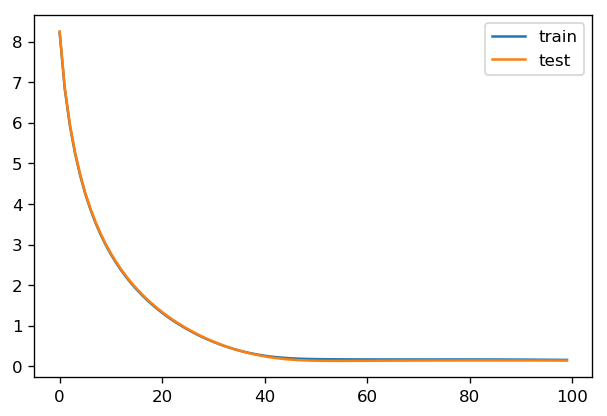

Test loss: 0.140869
Epoch 36, train loss: 0.264208
Epoch 37, train loss: 0.244609
Epoch 38, train loss: 0.227945
Epoch 39, train loss: 0.214140
Epoch 40, train loss: 0.202930
Epoch 41, train loss: 0.194328
Epoch 42, train loss: 0.187346
Epoch 43, train loss: 0.182347
Epoch 44, train loss: 0.178700
Epoch 45, train loss: 0.176210
Epoch 46, train loss: 0.174308
Epoch 47, train loss: 0.172905
Epoch 48, train loss: 0.171876
Epoch 49, train loss: 0.170997
Epoch 50, train loss: 0.170306
Epoch 51, train loss: 0.169683
Epoch 52, train loss: 0.169178
Epoch 53, train loss: 0.168726
Epoch 54, train loss: 0.168284
Epoch 55, train loss: 0.167926
Epoch 56, train loss: 0.167705
Epoch 57, train loss: 0.167476
Epoch 58, train loss: 0.167378
Epoch 59, train loss: 0.167134
Epoch 60, train loss: 0.167086
Epoch 61, train loss: 0.167210
Epoch 62, train loss: 0.167235
Epoch 63, train loss: 0.167062
Epoch 64, train loss: 0.167313
Epoch 65, train loss: 0.167584
Epoch 66, train loss: 0.167431
Epoch 67, train los

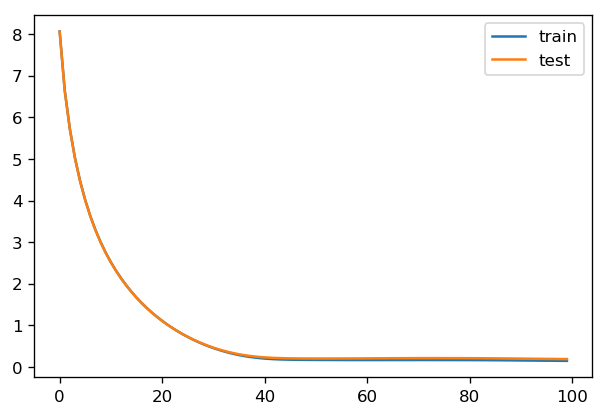

Test loss: 0.190945
Epoch 36, train loss: 0.267124
Epoch 37, train loss: 0.246855
Epoch 38, train loss: 0.229879
Epoch 39, train loss: 0.216016
Epoch 40, train loss: 0.204692
Epoch 41, train loss: 0.195842
Epoch 42, train loss: 0.189142
Epoch 43, train loss: 0.184189
Epoch 44, train loss: 0.180288
Epoch 45, train loss: 0.177445
Epoch 46, train loss: 0.175363
Epoch 47, train loss: 0.173874
Epoch 48, train loss: 0.172679
Epoch 49, train loss: 0.171772
Epoch 50, train loss: 0.171068
Epoch 51, train loss: 0.170505
Epoch 52, train loss: 0.170004
Epoch 53, train loss: 0.169629
Epoch 54, train loss: 0.169343
Epoch 55, train loss: 0.169045
Epoch 56, train loss: 0.168902
Epoch 57, train loss: 0.168848
Epoch 58, train loss: 0.168937
Epoch 59, train loss: 0.168878
Epoch 60, train loss: 0.169028
Epoch 61, train loss: 0.169277
Epoch 62, train loss: 0.169507
Epoch 63, train loss: 0.169763
Epoch 64, train loss: 0.170024
Epoch 65, train loss: 0.170285
Epoch 66, train loss: 0.170609
Epoch 67, train los

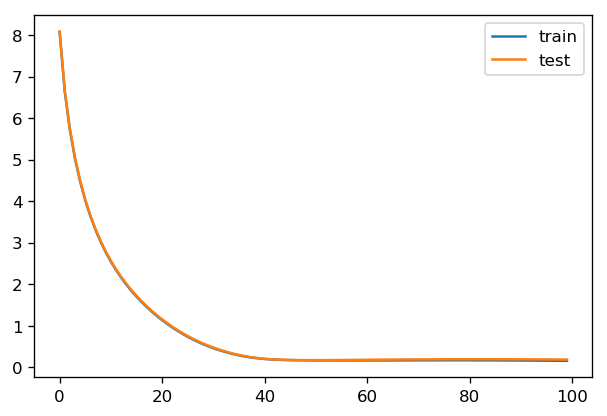

Test loss: 0.190603
Epoch 36, train loss: 0.273645
Epoch 37, train loss: 0.252416
Epoch 38, train loss: 0.234936
Epoch 39, train loss: 0.220489
Epoch 40, train loss: 0.208710
Epoch 41, train loss: 0.199074
Epoch 42, train loss: 0.192034
Epoch 43, train loss: 0.186522
Epoch 44, train loss: 0.182302
Epoch 45, train loss: 0.179208
Epoch 46, train loss: 0.176844
Epoch 47, train loss: 0.175163
Epoch 48, train loss: 0.173855
Epoch 49, train loss: 0.172844
Epoch 50, train loss: 0.172074
Epoch 51, train loss: 0.171444
Epoch 52, train loss: 0.170913
Epoch 53, train loss: 0.170477
Epoch 54, train loss: 0.170108
Epoch 55, train loss: 0.169785
Epoch 56, train loss: 0.169509
Epoch 57, train loss: 0.169336
Epoch 58, train loss: 0.169193
Epoch 59, train loss: 0.169254
Epoch 60, train loss: 0.169178
Epoch 61, train loss: 0.169215
Epoch 62, train loss: 0.169297
Epoch 63, train loss: 0.169325
Epoch 64, train loss: 0.169711
Epoch 65, train loss: 0.169907
Epoch 66, train loss: 0.170293
Epoch 67, train los

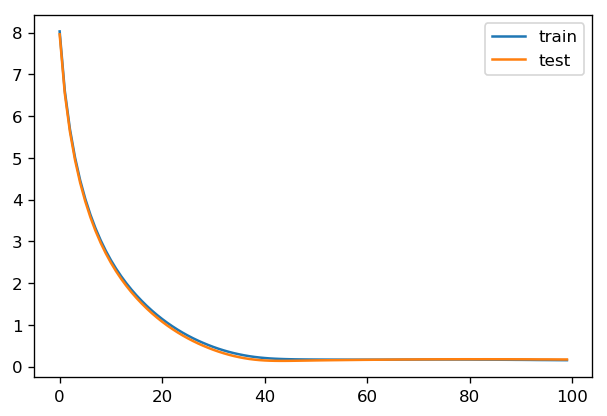

Test loss: 0.173561
Epoch 36, train loss: 0.265279
Epoch 37, train loss: 0.245101
Epoch 38, train loss: 0.228695
Epoch 39, train loss: 0.215127
Epoch 40, train loss: 0.204086
Epoch 41, train loss: 0.195763
Epoch 42, train loss: 0.189128
Epoch 43, train loss: 0.184137
Epoch 44, train loss: 0.180524
Epoch 45, train loss: 0.177690
Epoch 46, train loss: 0.175740
Epoch 47, train loss: 0.174208
Epoch 48, train loss: 0.173083
Epoch 49, train loss: 0.172179
Epoch 50, train loss: 0.171495
Epoch 51, train loss: 0.170944
Epoch 52, train loss: 0.170377
Epoch 53, train loss: 0.170011
Epoch 54, train loss: 0.169665
Epoch 55, train loss: 0.169378
Epoch 56, train loss: 0.169133
Epoch 57, train loss: 0.169036
Epoch 58, train loss: 0.168782
Epoch 59, train loss: 0.168709
Epoch 60, train loss: 0.168785
Epoch 61, train loss: 0.168810
Epoch 62, train loss: 0.168805
Epoch 63, train loss: 0.168835
Epoch 64, train loss: 0.168878
Epoch 65, train loss: 0.169193
Epoch 66, train loss: 0.169227
Epoch 67, train los

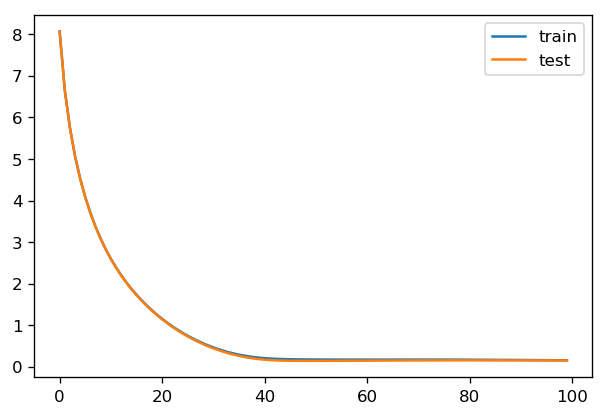

Test loss: 0.148445
Epoch 36, train loss: 0.254571
Epoch 37, train loss: 0.236752
Epoch 38, train loss: 0.221799
Epoch 39, train loss: 0.209882
Epoch 40, train loss: 0.200598
Epoch 41, train loss: 0.193127
Epoch 42, train loss: 0.187378
Epoch 43, train loss: 0.183208
Epoch 44, train loss: 0.180053
Epoch 45, train loss: 0.177665
Epoch 46, train loss: 0.175897
Epoch 47, train loss: 0.174478
Epoch 48, train loss: 0.173434
Epoch 49, train loss: 0.172600
Epoch 50, train loss: 0.171897
Epoch 51, train loss: 0.171342
Epoch 52, train loss: 0.170879
Epoch 53, train loss: 0.170467
Epoch 54, train loss: 0.170152
Epoch 55, train loss: 0.169941
Epoch 56, train loss: 0.169754
Epoch 57, train loss: 0.169635
Epoch 58, train loss: 0.169607
Epoch 59, train loss: 0.169664
Epoch 60, train loss: 0.169815
Epoch 61, train loss: 0.169781
Epoch 62, train loss: 0.169928
Epoch 63, train loss: 0.170118
Epoch 64, train loss: 0.170463
Epoch 65, train loss: 0.170681
Epoch 66, train loss: 0.171009
Epoch 67, train los

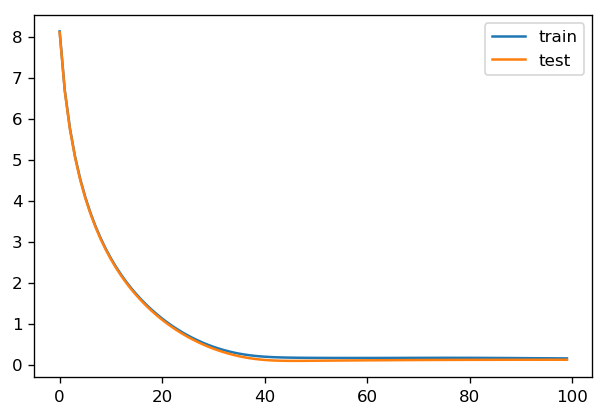

Test loss: 0.126427
Epoch 36, train loss: 0.292918
Epoch 37, train loss: 0.270132
Epoch 38, train loss: 0.250267
Epoch 39, train loss: 0.233007
Epoch 40, train loss: 0.219400
Epoch 41, train loss: 0.208049
Epoch 42, train loss: 0.198942
Epoch 43, train loss: 0.191799
Epoch 44, train loss: 0.186212
Epoch 45, train loss: 0.182173
Epoch 46, train loss: 0.179162
Epoch 47, train loss: 0.176740
Epoch 48, train loss: 0.175066
Epoch 49, train loss: 0.173699
Epoch 50, train loss: 0.172633
Epoch 51, train loss: 0.171805
Epoch 52, train loss: 0.171105
Epoch 53, train loss: 0.170566
Epoch 54, train loss: 0.170030
Epoch 55, train loss: 0.169626
Epoch 56, train loss: 0.169295
Epoch 57, train loss: 0.168898
Epoch 58, train loss: 0.168711
Epoch 59, train loss: 0.168451
Epoch 60, train loss: 0.168304
Epoch 61, train loss: 0.168354
Epoch 62, train loss: 0.168192
Epoch 63, train loss: 0.168259
Epoch 64, train loss: 0.168510
Epoch 65, train loss: 0.168605
Epoch 66, train loss: 0.168641
Epoch 67, train los

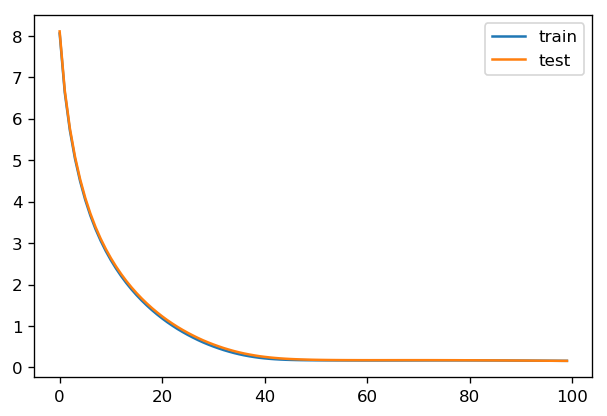

Test loss: 0.159065
Epoch 36, train loss: 0.292998
Epoch 37, train loss: 0.268990
Epoch 38, train loss: 0.248293
Epoch 39, train loss: 0.231621
Epoch 40, train loss: 0.217530
Epoch 41, train loss: 0.206223
Epoch 42, train loss: 0.197537
Epoch 43, train loss: 0.190819
Epoch 44, train loss: 0.185533
Epoch 45, train loss: 0.181788
Epoch 46, train loss: 0.178885
Epoch 47, train loss: 0.176664
Epoch 48, train loss: 0.175000
Epoch 49, train loss: 0.173708
Epoch 50, train loss: 0.172631
Epoch 51, train loss: 0.171786
Epoch 52, train loss: 0.171071
Epoch 53, train loss: 0.170434
Epoch 54, train loss: 0.169877
Epoch 55, train loss: 0.169386
Epoch 56, train loss: 0.168949
Epoch 57, train loss: 0.168565
Epoch 58, train loss: 0.168150
Epoch 59, train loss: 0.167883
Epoch 60, train loss: 0.167657
Epoch 61, train loss: 0.167299
Epoch 62, train loss: 0.167167
Epoch 63, train loss: 0.167119
Epoch 64, train loss: 0.166881
Epoch 65, train loss: 0.166678
Epoch 66, train loss: 0.166592
Epoch 67, train los

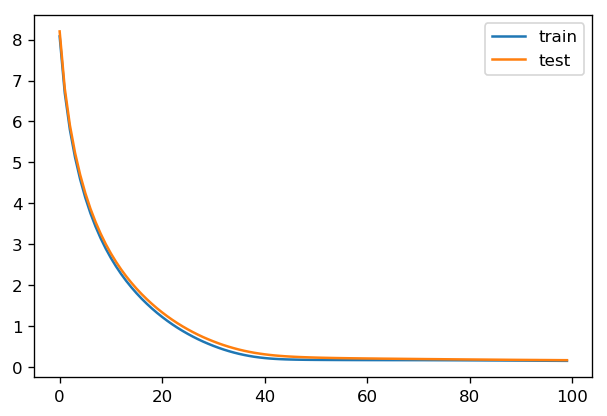

Test loss: 0.165271
Epoch 36, train loss: 0.250949
Epoch 37, train loss: 0.233455
Epoch 38, train loss: 0.219188
Epoch 39, train loss: 0.207545
Epoch 40, train loss: 0.198473
Epoch 41, train loss: 0.191321
Epoch 42, train loss: 0.186009
Epoch 43, train loss: 0.182190
Epoch 44, train loss: 0.179151
Epoch 45, train loss: 0.177011
Epoch 46, train loss: 0.175339
Epoch 47, train loss: 0.174100
Epoch 48, train loss: 0.173160
Epoch 49, train loss: 0.172379
Epoch 50, train loss: 0.171742
Epoch 51, train loss: 0.171249
Epoch 52, train loss: 0.170781
Epoch 53, train loss: 0.170417
Epoch 54, train loss: 0.170094
Epoch 55, train loss: 0.169793
Epoch 56, train loss: 0.169663
Epoch 57, train loss: 0.169627
Epoch 58, train loss: 0.169583
Epoch 59, train loss: 0.169443
Epoch 60, train loss: 0.169544
Epoch 61, train loss: 0.169571
Epoch 62, train loss: 0.169689
Epoch 63, train loss: 0.169907
Epoch 64, train loss: 0.170006
Epoch 65, train loss: 0.170192
Epoch 66, train loss: 0.170578
Epoch 67, train los

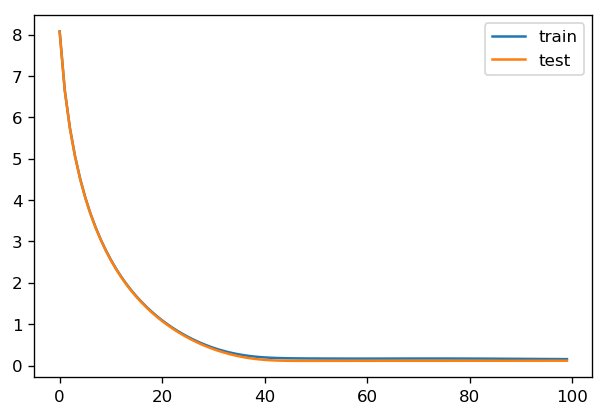

Test loss: 0.118897
Epoch 36, train loss: 0.302814
Epoch 37, train loss: 0.278594
Epoch 38, train loss: 0.257886
Epoch 39, train loss: 0.240270
Epoch 40, train loss: 0.225310
Epoch 41, train loss: 0.212968
Epoch 42, train loss: 0.202917
Epoch 43, train loss: 0.195051
Epoch 44, train loss: 0.188898
Epoch 45, train loss: 0.183969
Epoch 46, train loss: 0.180402
Epoch 47, train loss: 0.177718
Epoch 48, train loss: 0.175778
Epoch 49, train loss: 0.174239
Epoch 50, train loss: 0.173081
Epoch 51, train loss: 0.172178
Epoch 52, train loss: 0.171424
Epoch 53, train loss: 0.170790
Epoch 54, train loss: 0.170317
Epoch 55, train loss: 0.169876
Epoch 56, train loss: 0.169422
Epoch 57, train loss: 0.169102
Epoch 58, train loss: 0.168777
Epoch 59, train loss: 0.168538
Epoch 60, train loss: 0.168261
Epoch 61, train loss: 0.168162
Epoch 62, train loss: 0.168065
Epoch 63, train loss: 0.167951
Epoch 64, train loss: 0.167922
Epoch 65, train loss: 0.167754
Epoch 66, train loss: 0.167708
Epoch 67, train los

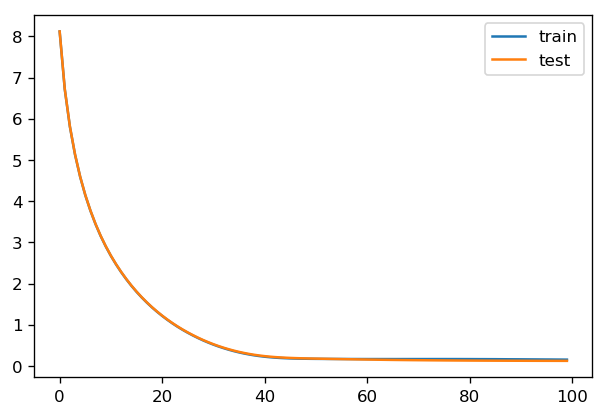

Test loss: 0.124398
Epoch 36, train loss: 0.306471
Epoch 37, train loss: 0.281687
Epoch 38, train loss: 0.260672
Epoch 39, train loss: 0.242449
Epoch 40, train loss: 0.227389
Epoch 41, train loss: 0.214809
Epoch 42, train loss: 0.204439
Epoch 43, train loss: 0.196433
Epoch 44, train loss: 0.190214
Epoch 45, train loss: 0.185297
Epoch 46, train loss: 0.181550
Epoch 47, train loss: 0.178671
Epoch 48, train loss: 0.176589
Epoch 49, train loss: 0.175013
Epoch 50, train loss: 0.173865
Epoch 51, train loss: 0.172972
Epoch 52, train loss: 0.172245
Epoch 53, train loss: 0.171619
Epoch 54, train loss: 0.171044
Epoch 55, train loss: 0.170550
Epoch 56, train loss: 0.170134
Epoch 57, train loss: 0.169734
Epoch 58, train loss: 0.169505
Epoch 59, train loss: 0.169163
Epoch 60, train loss: 0.168963
Epoch 61, train loss: 0.168853
Epoch 62, train loss: 0.168817
Epoch 63, train loss: 0.168648
Epoch 64, train loss: 0.168422
Epoch 65, train loss: 0.168561
Epoch 66, train loss: 0.168586
Epoch 67, train los

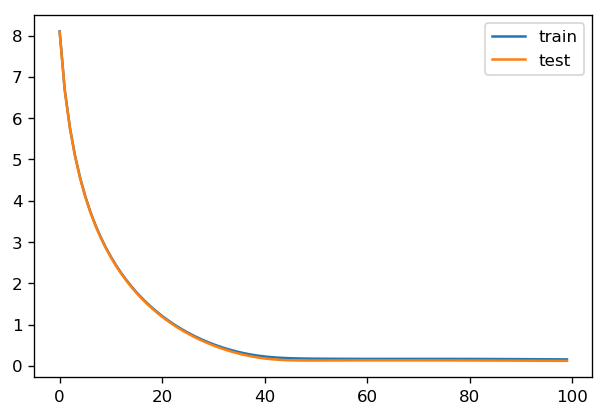

Test loss: 0.121114
Epoch 36, train loss: 0.308423
Epoch 37, train loss: 0.284140
Epoch 38, train loss: 0.263059
Epoch 39, train loss: 0.245124
Epoch 40, train loss: 0.229872
Epoch 41, train loss: 0.217319
Epoch 42, train loss: 0.206758
Epoch 43, train loss: 0.198410
Epoch 44, train loss: 0.191980
Epoch 45, train loss: 0.186631
Epoch 46, train loss: 0.182511
Epoch 47, train loss: 0.179368
Epoch 48, train loss: 0.176987
Epoch 49, train loss: 0.175199
Epoch 50, train loss: 0.173848
Epoch 51, train loss: 0.172811
Epoch 52, train loss: 0.172032
Epoch 53, train loss: 0.171355
Epoch 54, train loss: 0.170832
Epoch 55, train loss: 0.170378
Epoch 56, train loss: 0.170020
Epoch 57, train loss: 0.169693
Epoch 58, train loss: 0.169375
Epoch 59, train loss: 0.169208
Epoch 60, train loss: 0.169103
Epoch 61, train loss: 0.169012
Epoch 62, train loss: 0.168962
Epoch 63, train loss: 0.168891
Epoch 64, train loss: 0.168871
Epoch 65, train loss: 0.169002
Epoch 66, train loss: 0.169163
Epoch 67, train los

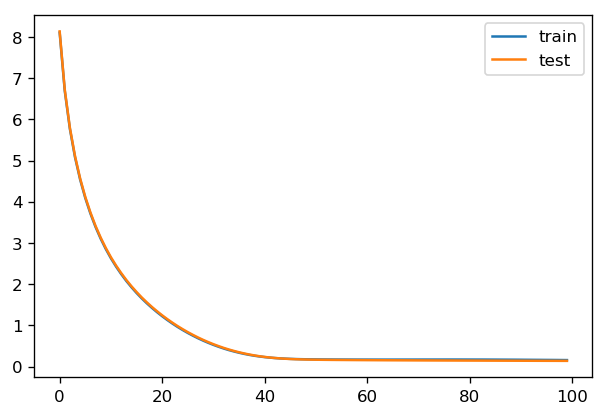

Test loss: 0.138445
Epoch 36, train loss: 0.299495
Epoch 37, train loss: 0.275888
Epoch 38, train loss: 0.255659
Epoch 39, train loss: 0.238315
Epoch 40, train loss: 0.223588
Epoch 41, train loss: 0.211609
Epoch 42, train loss: 0.201818
Epoch 43, train loss: 0.194128
Epoch 44, train loss: 0.188215
Epoch 45, train loss: 0.183857
Epoch 46, train loss: 0.180355
Epoch 47, train loss: 0.177857
Epoch 48, train loss: 0.175968
Epoch 49, train loss: 0.174531
Epoch 50, train loss: 0.173453
Epoch 51, train loss: 0.172616
Epoch 52, train loss: 0.171907
Epoch 53, train loss: 0.171357
Epoch 54, train loss: 0.170891
Epoch 55, train loss: 0.170430
Epoch 56, train loss: 0.170062
Epoch 57, train loss: 0.169771
Epoch 58, train loss: 0.169514
Epoch 59, train loss: 0.169337
Epoch 60, train loss: 0.169264
Epoch 61, train loss: 0.169092
Epoch 62, train loss: 0.168995
Epoch 63, train loss: 0.168935
Epoch 64, train loss: 0.168953
Epoch 65, train loss: 0.169004
Epoch 66, train loss: 0.169117
Epoch 67, train los

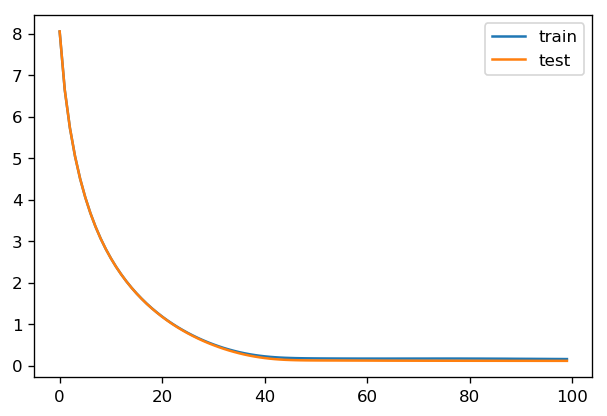

Test loss: 0.114559
Epoch 36, train loss: 0.328186
Epoch 37, train loss: 0.301406
Epoch 38, train loss: 0.278162
Epoch 39, train loss: 0.257678
Epoch 40, train loss: 0.240154
Epoch 41, train loss: 0.225618
Epoch 42, train loss: 0.213413
Epoch 43, train loss: 0.203567
Epoch 44, train loss: 0.195525
Epoch 45, train loss: 0.189411
Epoch 46, train loss: 0.184777
Epoch 47, train loss: 0.180992
Epoch 48, train loss: 0.178134
Epoch 49, train loss: 0.176014
Epoch 50, train loss: 0.174411
Epoch 51, train loss: 0.173231
Epoch 52, train loss: 0.172263
Epoch 53, train loss: 0.171512
Epoch 54, train loss: 0.170871
Epoch 55, train loss: 0.170312
Epoch 56, train loss: 0.169787
Epoch 57, train loss: 0.169383
Epoch 58, train loss: 0.168888
Epoch 59, train loss: 0.168529
Epoch 60, train loss: 0.168238
Epoch 61, train loss: 0.167907
Epoch 62, train loss: 0.167683
Epoch 63, train loss: 0.167565
Epoch 64, train loss: 0.167250
Epoch 65, train loss: 0.167225
Epoch 66, train loss: 0.167052
Epoch 67, train los

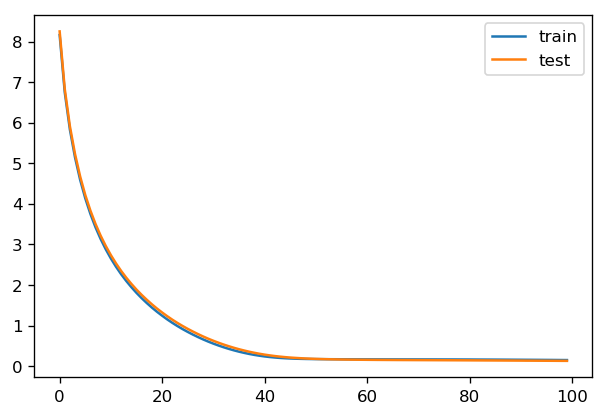

Test loss: 0.131007
Epoch 36, train loss: 0.264518
Epoch 37, train loss: 0.244402
Epoch 38, train loss: 0.228160
Epoch 39, train loss: 0.214871
Epoch 40, train loss: 0.204074
Epoch 41, train loss: 0.195820
Epoch 42, train loss: 0.189321
Epoch 43, train loss: 0.184525
Epoch 44, train loss: 0.181061
Epoch 45, train loss: 0.178463
Epoch 46, train loss: 0.176505
Epoch 47, train loss: 0.175136
Epoch 48, train loss: 0.174112
Epoch 49, train loss: 0.173345
Epoch 50, train loss: 0.172789
Epoch 51, train loss: 0.172312
Epoch 52, train loss: 0.171980
Epoch 53, train loss: 0.171679
Epoch 54, train loss: 0.171487
Epoch 55, train loss: 0.171279
Epoch 56, train loss: 0.171355
Epoch 57, train loss: 0.171305
Epoch 58, train loss: 0.171305
Epoch 59, train loss: 0.171376
Epoch 60, train loss: 0.171528
Epoch 61, train loss: 0.171694
Epoch 62, train loss: 0.171954
Epoch 63, train loss: 0.172123
Epoch 64, train loss: 0.172289
Epoch 65, train loss: 0.172667
Epoch 66, train loss: 0.172881
Epoch 67, train los

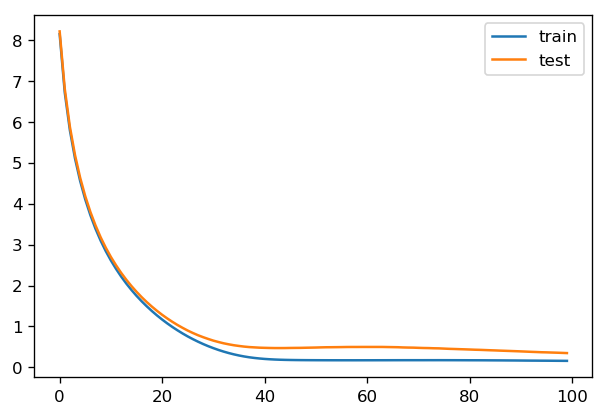

Test loss: 0.347233
Epoch 36, train loss: 0.297631
Epoch 37, train loss: 0.274084
Epoch 38, train loss: 0.253412
Epoch 39, train loss: 0.236039
Epoch 40, train loss: 0.221590
Epoch 41, train loss: 0.209305
Epoch 42, train loss: 0.199572
Epoch 43, train loss: 0.191827
Epoch 44, train loss: 0.185996
Epoch 45, train loss: 0.181858
Epoch 46, train loss: 0.178662
Epoch 47, train loss: 0.176195
Epoch 48, train loss: 0.174603
Epoch 49, train loss: 0.173328
Epoch 50, train loss: 0.172366
Epoch 51, train loss: 0.171586
Epoch 52, train loss: 0.170966
Epoch 53, train loss: 0.170397
Epoch 54, train loss: 0.169957
Epoch 55, train loss: 0.169573
Epoch 56, train loss: 0.169183
Epoch 57, train loss: 0.168984
Epoch 58, train loss: 0.168695
Epoch 59, train loss: 0.168506
Epoch 60, train loss: 0.168420
Epoch 61, train loss: 0.168255
Epoch 62, train loss: 0.168218
Epoch 63, train loss: 0.168324
Epoch 64, train loss: 0.168270
Epoch 65, train loss: 0.168390
Epoch 66, train loss: 0.168281
Epoch 67, train los

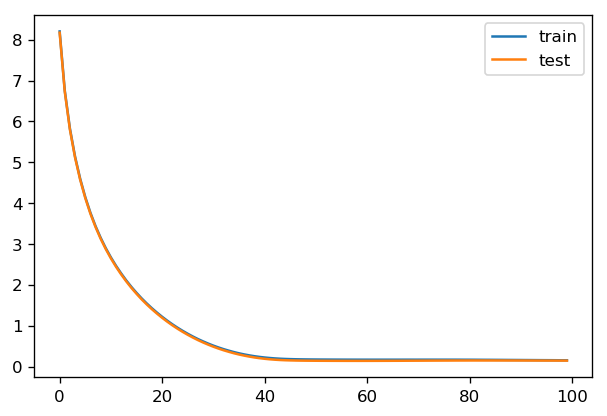

Test loss: 0.145298
Epoch 36, train loss: 0.295291
Epoch 37, train loss: 0.272537
Epoch 38, train loss: 0.252376
Epoch 39, train loss: 0.235639
Epoch 40, train loss: 0.221551
Epoch 41, train loss: 0.209988
Epoch 42, train loss: 0.200591
Epoch 43, train loss: 0.193307
Epoch 44, train loss: 0.187403
Epoch 45, train loss: 0.182978
Epoch 46, train loss: 0.179572
Epoch 47, train loss: 0.177007
Epoch 48, train loss: 0.175199
Epoch 49, train loss: 0.173773
Epoch 50, train loss: 0.172694
Epoch 51, train loss: 0.171844
Epoch 52, train loss: 0.171178
Epoch 53, train loss: 0.170612
Epoch 54, train loss: 0.170176
Epoch 55, train loss: 0.169759
Epoch 56, train loss: 0.169468
Epoch 57, train loss: 0.169159
Epoch 58, train loss: 0.169006
Epoch 59, train loss: 0.168894
Epoch 60, train loss: 0.168800
Epoch 61, train loss: 0.168689
Epoch 62, train loss: 0.168795
Epoch 63, train loss: 0.168885
Epoch 64, train loss: 0.169030
Epoch 65, train loss: 0.169177
Epoch 66, train loss: 0.169419
Epoch 67, train los

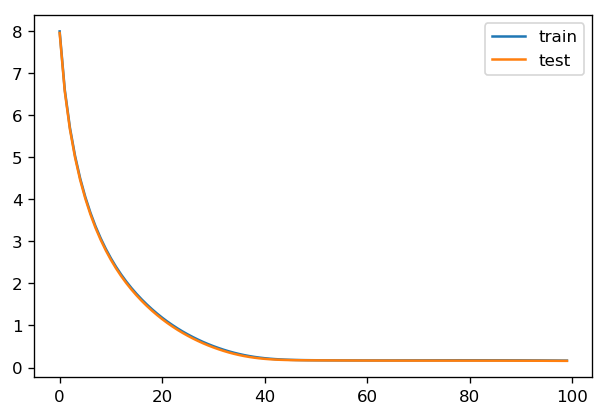

Test loss: 0.158343
Epoch 36, train loss: 0.268185
Epoch 37, train loss: 0.247494
Epoch 38, train loss: 0.230104
Epoch 39, train loss: 0.216137
Epoch 40, train loss: 0.204743
Epoch 41, train loss: 0.195886
Epoch 42, train loss: 0.188823
Epoch 43, train loss: 0.183834
Epoch 44, train loss: 0.180276
Epoch 45, train loss: 0.177380
Epoch 46, train loss: 0.175357
Epoch 47, train loss: 0.173887
Epoch 48, train loss: 0.172744
Epoch 49, train loss: 0.171835
Epoch 50, train loss: 0.171118
Epoch 51, train loss: 0.170500
Epoch 52, train loss: 0.169979
Epoch 53, train loss: 0.169587
Epoch 54, train loss: 0.169200
Epoch 55, train loss: 0.168867
Epoch 56, train loss: 0.168673
Epoch 57, train loss: 0.168526
Epoch 58, train loss: 0.168378
Epoch 59, train loss: 0.168351
Epoch 60, train loss: 0.168177
Epoch 61, train loss: 0.168325
Epoch 62, train loss: 0.168393
Epoch 63, train loss: 0.168606
Epoch 64, train loss: 0.168769
Epoch 65, train loss: 0.168800
Epoch 66, train loss: 0.169045
Epoch 67, train los

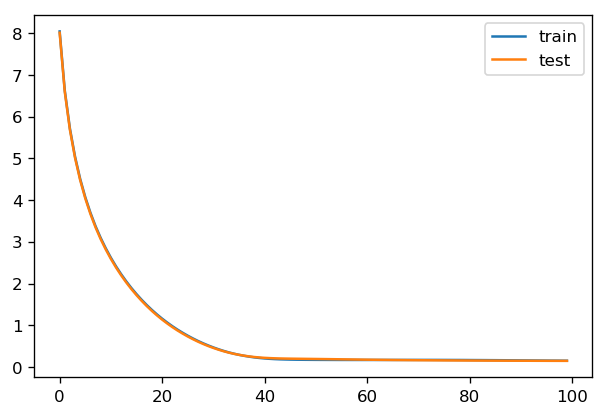

Test loss: 0.146837
Epoch 36, train loss: 0.321603
Epoch 37, train loss: 0.295869
Epoch 38, train loss: 0.273308
Epoch 39, train loss: 0.253537
Epoch 40, train loss: 0.236891
Epoch 41, train loss: 0.222091
Epoch 42, train loss: 0.210101
Epoch 43, train loss: 0.200973
Epoch 44, train loss: 0.193408
Epoch 45, train loss: 0.187541
Epoch 46, train loss: 0.183111
Epoch 47, train loss: 0.179751
Epoch 48, train loss: 0.177120
Epoch 49, train loss: 0.175342
Epoch 50, train loss: 0.173957
Epoch 51, train loss: 0.172872
Epoch 52, train loss: 0.172014
Epoch 53, train loss: 0.171323
Epoch 54, train loss: 0.170822
Epoch 55, train loss: 0.170300
Epoch 56, train loss: 0.169813
Epoch 57, train loss: 0.169442
Epoch 58, train loss: 0.169170
Epoch 59, train loss: 0.168844
Epoch 60, train loss: 0.168593
Epoch 61, train loss: 0.168437
Epoch 62, train loss: 0.168394
Epoch 63, train loss: 0.168289
Epoch 64, train loss: 0.168193
Epoch 65, train loss: 0.168198
Epoch 66, train loss: 0.168359
Epoch 67, train los

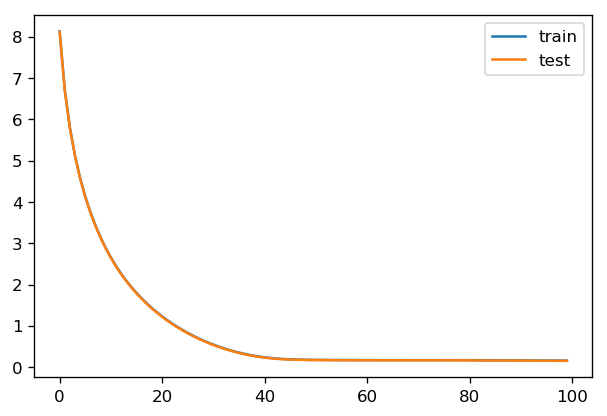

Test loss: 0.150861
Epoch 36, train loss: 0.304568
Epoch 37, train loss: 0.279785
Epoch 38, train loss: 0.258244
Epoch 39, train loss: 0.240312
Epoch 40, train loss: 0.225259
Epoch 41, train loss: 0.212606
Epoch 42, train loss: 0.202447
Epoch 43, train loss: 0.194108
Epoch 44, train loss: 0.187815
Epoch 45, train loss: 0.183062
Epoch 46, train loss: 0.179507
Epoch 47, train loss: 0.176703
Epoch 48, train loss: 0.174690
Epoch 49, train loss: 0.173149
Epoch 50, train loss: 0.172002
Epoch 51, train loss: 0.171071
Epoch 52, train loss: 0.170339
Epoch 53, train loss: 0.169766
Epoch 54, train loss: 0.169326
Epoch 55, train loss: 0.168876
Epoch 56, train loss: 0.168541
Epoch 57, train loss: 0.168296
Epoch 58, train loss: 0.168078
Epoch 59, train loss: 0.167948
Epoch 60, train loss: 0.167720
Epoch 61, train loss: 0.167740
Epoch 62, train loss: 0.167887
Epoch 63, train loss: 0.167901
Epoch 64, train loss: 0.168036
Epoch 65, train loss: 0.168151
Epoch 66, train loss: 0.168370
Epoch 67, train los

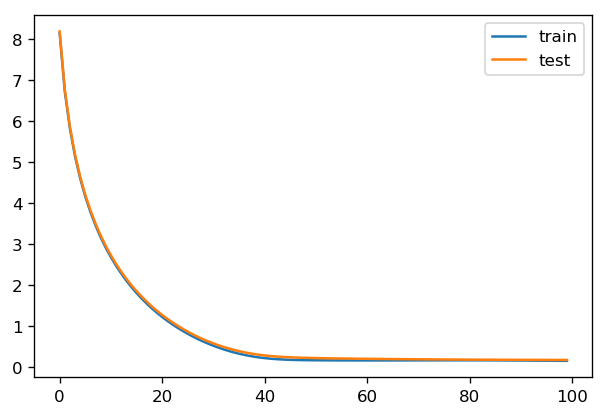

Test loss: 0.179612
Epoch 36, train loss: 0.262185
Epoch 37, train loss: 0.242596
Epoch 38, train loss: 0.226045
Epoch 39, train loss: 0.212642
Epoch 40, train loss: 0.202021
Epoch 41, train loss: 0.193732
Epoch 42, train loss: 0.187293
Epoch 43, train loss: 0.182458
Epoch 44, train loss: 0.178764
Epoch 45, train loss: 0.176009
Epoch 46, train loss: 0.173975
Epoch 47, train loss: 0.172524
Epoch 48, train loss: 0.171422
Epoch 49, train loss: 0.170589
Epoch 50, train loss: 0.169917
Epoch 51, train loss: 0.169372
Epoch 52, train loss: 0.168977
Epoch 53, train loss: 0.168633
Epoch 54, train loss: 0.168392
Epoch 55, train loss: 0.168217
Epoch 56, train loss: 0.168021
Epoch 57, train loss: 0.167977
Epoch 58, train loss: 0.167972
Epoch 59, train loss: 0.168102
Epoch 60, train loss: 0.168054
Epoch 61, train loss: 0.168227
Epoch 62, train loss: 0.168446
Epoch 63, train loss: 0.168779
Epoch 64, train loss: 0.169100
Epoch 65, train loss: 0.169333
Epoch 66, train loss: 0.169642
Epoch 67, train los

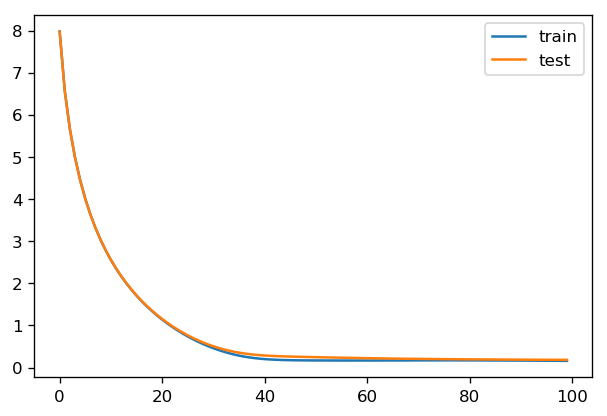

Test loss: 0.184402
Epoch 36, train loss: 0.412465
Epoch 37, train loss: 0.379360
Epoch 38, train loss: 0.349044
Epoch 39, train loss: 0.321256
Epoch 40, train loss: 0.296327
Epoch 41, train loss: 0.274182
Epoch 42, train loss: 0.254746
Epoch 43, train loss: 0.237590
Epoch 44, train loss: 0.223309
Epoch 45, train loss: 0.211346
Epoch 46, train loss: 0.201927
Epoch 47, train loss: 0.194037
Epoch 48, train loss: 0.188032
Epoch 49, train loss: 0.183396
Epoch 50, train loss: 0.179673
Epoch 51, train loss: 0.176947
Epoch 52, train loss: 0.174796
Epoch 53, train loss: 0.173111
Epoch 54, train loss: 0.171877
Epoch 55, train loss: 0.170910
Epoch 56, train loss: 0.170143
Epoch 57, train loss: 0.169445
Epoch 58, train loss: 0.168898
Epoch 59, train loss: 0.168373
Epoch 60, train loss: 0.167978
Epoch 61, train loss: 0.167512
Epoch 62, train loss: 0.167175
Epoch 63, train loss: 0.166866
Epoch 64, train loss: 0.166604
Epoch 65, train loss: 0.166282
Epoch 66, train loss: 0.166174
Epoch 67, train los

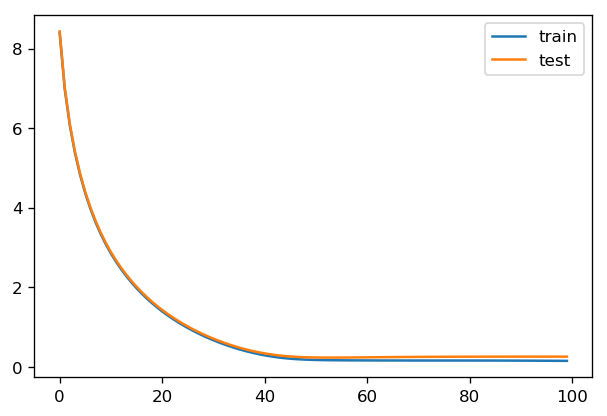

Test loss: 0.262433
Epoch 36, train loss: 0.335994
Epoch 37, train loss: 0.309438
Epoch 38, train loss: 0.285517
Epoch 39, train loss: 0.264733
Epoch 40, train loss: 0.246678
Epoch 41, train loss: 0.231638
Epoch 42, train loss: 0.218908
Epoch 43, train loss: 0.208664
Epoch 44, train loss: 0.200260
Epoch 45, train loss: 0.193356
Epoch 46, train loss: 0.188143
Epoch 47, train loss: 0.184036
Epoch 48, train loss: 0.180875
Epoch 49, train loss: 0.178477
Epoch 50, train loss: 0.176513
Epoch 51, train loss: 0.174933
Epoch 52, train loss: 0.173719
Epoch 53, train loss: 0.172736
Epoch 54, train loss: 0.172002
Epoch 55, train loss: 0.171321
Epoch 56, train loss: 0.170768
Epoch 57, train loss: 0.170170
Epoch 58, train loss: 0.169663
Epoch 59, train loss: 0.169103
Epoch 60, train loss: 0.168554
Epoch 61, train loss: 0.168144
Epoch 62, train loss: 0.167684
Epoch 63, train loss: 0.167278
Epoch 64, train loss: 0.166955
Epoch 65, train loss: 0.166625
Epoch 66, train loss: 0.166266
Epoch 67, train los

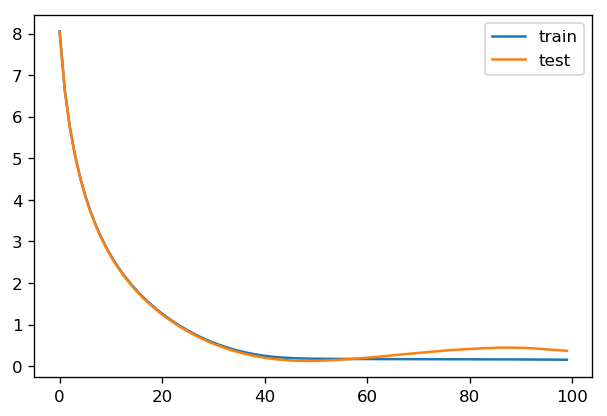

Test loss: 0.364516
Epoch 36, train loss: 0.270129
Epoch 37, train loss: 0.250009
Epoch 38, train loss: 0.232989
Epoch 39, train loss: 0.218740
Epoch 40, train loss: 0.207362
Epoch 41, train loss: 0.198334
Epoch 42, train loss: 0.191166
Epoch 43, train loss: 0.186034
Epoch 44, train loss: 0.181902
Epoch 45, train loss: 0.178724
Epoch 46, train loss: 0.176488
Epoch 47, train loss: 0.174816
Epoch 48, train loss: 0.173533
Epoch 49, train loss: 0.172537
Epoch 50, train loss: 0.171731
Epoch 51, train loss: 0.171074
Epoch 52, train loss: 0.170487
Epoch 53, train loss: 0.169993
Epoch 54, train loss: 0.169603
Epoch 55, train loss: 0.169274
Epoch 56, train loss: 0.169013
Epoch 57, train loss: 0.168637
Epoch 58, train loss: 0.168439
Epoch 59, train loss: 0.168424
Epoch 60, train loss: 0.168196
Epoch 61, train loss: 0.168070
Epoch 62, train loss: 0.168133
Epoch 63, train loss: 0.168197
Epoch 64, train loss: 0.168386
Epoch 65, train loss: 0.168581
Epoch 66, train loss: 0.168569
Epoch 67, train los

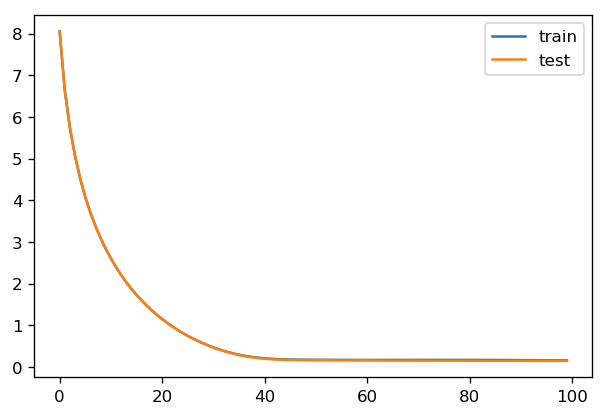

Test loss: 0.146091
Epoch 36, train loss: 0.314663
Epoch 37, train loss: 0.289505
Epoch 38, train loss: 0.267434
Epoch 39, train loss: 0.248358
Epoch 40, train loss: 0.232450
Epoch 41, train loss: 0.219009
Epoch 42, train loss: 0.207874
Epoch 43, train loss: 0.199176
Epoch 44, train loss: 0.192346
Epoch 45, train loss: 0.187027
Epoch 46, train loss: 0.183099
Epoch 47, train loss: 0.180042
Epoch 48, train loss: 0.177669
Epoch 49, train loss: 0.175914
Epoch 50, train loss: 0.174589
Epoch 51, train loss: 0.173568
Epoch 52, train loss: 0.172711
Epoch 53, train loss: 0.172022
Epoch 54, train loss: 0.171423
Epoch 55, train loss: 0.170962
Epoch 56, train loss: 0.170489
Epoch 57, train loss: 0.170116
Epoch 58, train loss: 0.169774
Epoch 59, train loss: 0.169520
Epoch 60, train loss: 0.169274
Epoch 61, train loss: 0.169155
Epoch 62, train loss: 0.169086
Epoch 63, train loss: 0.169020
Epoch 64, train loss: 0.169066
Epoch 65, train loss: 0.169103
Epoch 66, train loss: 0.169154
Epoch 67, train los

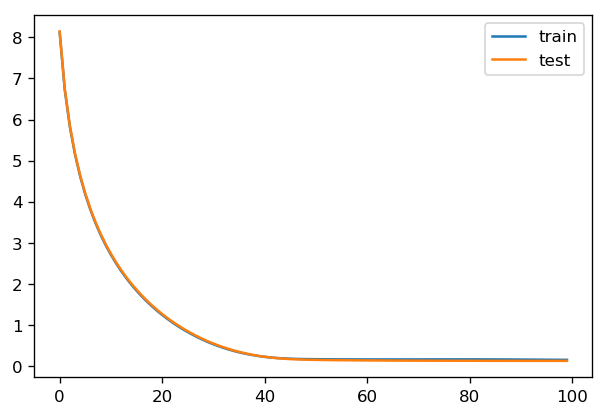

Test loss: 0.134538
Epoch 36, train loss: 0.297376
Epoch 37, train loss: 0.273279
Epoch 38, train loss: 0.252585
Epoch 39, train loss: 0.235312
Epoch 40, train loss: 0.220835
Epoch 41, train loss: 0.208829
Epoch 42, train loss: 0.199727
Epoch 43, train loss: 0.192390
Epoch 44, train loss: 0.186858
Epoch 45, train loss: 0.182536
Epoch 46, train loss: 0.179436
Epoch 47, train loss: 0.177076
Epoch 48, train loss: 0.175329
Epoch 49, train loss: 0.173965
Epoch 50, train loss: 0.172900
Epoch 51, train loss: 0.172062
Epoch 52, train loss: 0.171385
Epoch 53, train loss: 0.170794
Epoch 54, train loss: 0.170242
Epoch 55, train loss: 0.169826
Epoch 56, train loss: 0.169473
Epoch 57, train loss: 0.169089
Epoch 58, train loss: 0.168838
Epoch 59, train loss: 0.168721
Epoch 60, train loss: 0.168500
Epoch 61, train loss: 0.168348
Epoch 62, train loss: 0.168312
Epoch 63, train loss: 0.168373
Epoch 64, train loss: 0.168318
Epoch 65, train loss: 0.168412
Epoch 66, train loss: 0.168489
Epoch 67, train los

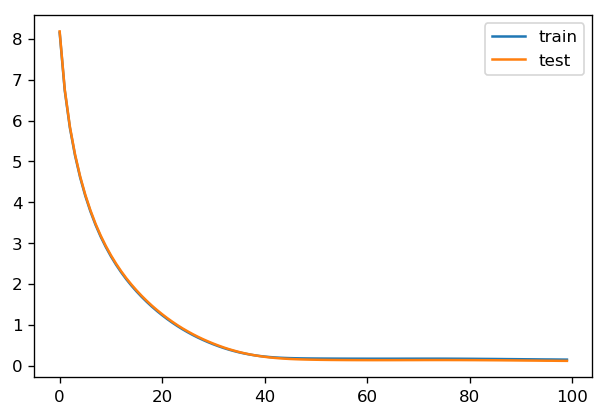

Test loss: 0.115850
Epoch 36, train loss: 0.294857
Epoch 37, train loss: 0.272266
Epoch 38, train loss: 0.252796
Epoch 39, train loss: 0.236569
Epoch 40, train loss: 0.222299
Epoch 41, train loss: 0.210857
Epoch 42, train loss: 0.201174
Epoch 43, train loss: 0.193699
Epoch 44, train loss: 0.187738
Epoch 45, train loss: 0.183119
Epoch 46, train loss: 0.179572
Epoch 47, train loss: 0.176900
Epoch 48, train loss: 0.174825
Epoch 49, train loss: 0.173249
Epoch 50, train loss: 0.172032
Epoch 51, train loss: 0.171013
Epoch 52, train loss: 0.170237
Epoch 53, train loss: 0.169544
Epoch 54, train loss: 0.169053
Epoch 55, train loss: 0.168557
Epoch 56, train loss: 0.168147
Epoch 57, train loss: 0.167832
Epoch 58, train loss: 0.167578
Epoch 59, train loss: 0.167422
Epoch 60, train loss: 0.167338
Epoch 61, train loss: 0.167214
Epoch 62, train loss: 0.167100
Epoch 63, train loss: 0.167115
Epoch 64, train loss: 0.167303
Epoch 65, train loss: 0.167476
Epoch 66, train loss: 0.167607
Epoch 67, train los

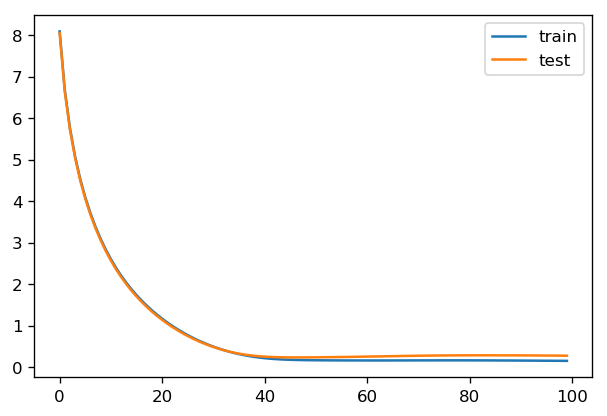

Test loss: 0.281645
Epoch 36, train loss: 0.282741
Epoch 37, train loss: 0.259949
Epoch 38, train loss: 0.240588
Epoch 39, train loss: 0.224464
Epoch 40, train loss: 0.211125
Epoch 41, train loss: 0.200730
Epoch 42, train loss: 0.192618
Epoch 43, train loss: 0.186531
Epoch 44, train loss: 0.181793
Epoch 45, train loss: 0.178384
Epoch 46, train loss: 0.175794
Epoch 47, train loss: 0.174029
Epoch 48, train loss: 0.172698
Epoch 49, train loss: 0.171672
Epoch 50, train loss: 0.170858
Epoch 51, train loss: 0.170179
Epoch 52, train loss: 0.169587
Epoch 53, train loss: 0.169032
Epoch 54, train loss: 0.168562
Epoch 55, train loss: 0.168193
Epoch 56, train loss: 0.167876
Epoch 57, train loss: 0.167502
Epoch 58, train loss: 0.167350
Epoch 59, train loss: 0.167138
Epoch 60, train loss: 0.167135
Epoch 61, train loss: 0.167213
Epoch 62, train loss: 0.167209
Epoch 63, train loss: 0.167184
Epoch 64, train loss: 0.167357
Epoch 65, train loss: 0.167620
Epoch 66, train loss: 0.167723
Epoch 67, train los

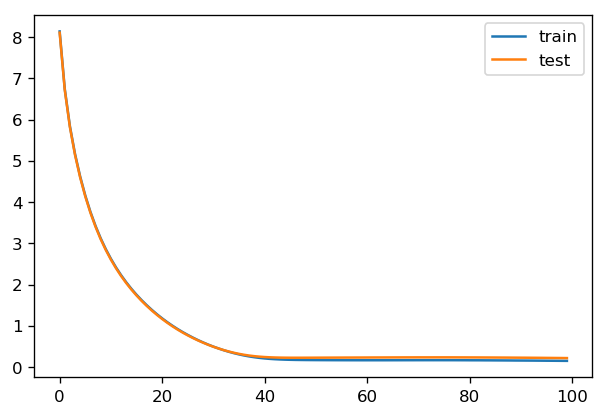

Test loss: 0.219821
Epoch 36, train loss: 0.312938
Epoch 37, train loss: 0.288170
Epoch 38, train loss: 0.265787
Epoch 39, train loss: 0.247002
Epoch 40, train loss: 0.230820
Epoch 41, train loss: 0.217522
Epoch 42, train loss: 0.206805
Epoch 43, train loss: 0.197902
Epoch 44, train loss: 0.190949
Epoch 45, train loss: 0.185607
Epoch 46, train loss: 0.181316
Epoch 47, train loss: 0.178086
Epoch 48, train loss: 0.175684
Epoch 49, train loss: 0.173829
Epoch 50, train loss: 0.172406
Epoch 51, train loss: 0.171278
Epoch 52, train loss: 0.170395
Epoch 53, train loss: 0.169747
Epoch 54, train loss: 0.169089
Epoch 55, train loss: 0.168546
Epoch 56, train loss: 0.168083
Epoch 57, train loss: 0.167666
Epoch 58, train loss: 0.167391
Epoch 59, train loss: 0.166939
Epoch 60, train loss: 0.166671
Epoch 61, train loss: 0.166458
Epoch 62, train loss: 0.166237
Epoch 63, train loss: 0.166084
Epoch 64, train loss: 0.165934
Epoch 65, train loss: 0.165891
Epoch 66, train loss: 0.165877
Epoch 67, train los

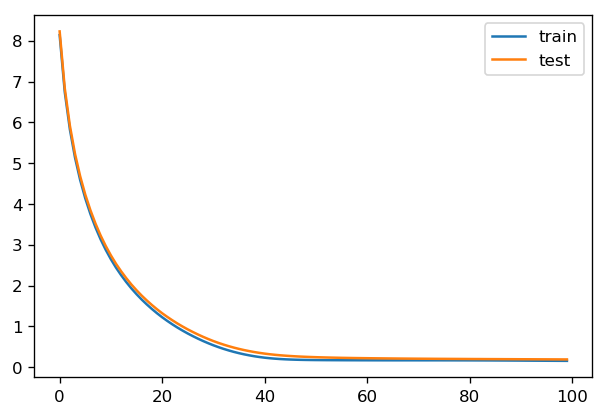

Test loss: 0.187975
Epoch 36, train loss: 0.317261
Epoch 37, train loss: 0.290930
Epoch 38, train loss: 0.268050
Epoch 39, train loss: 0.248481
Epoch 40, train loss: 0.231755
Epoch 41, train loss: 0.218257
Epoch 42, train loss: 0.207290
Epoch 43, train loss: 0.198432
Epoch 44, train loss: 0.191617
Epoch 45, train loss: 0.186370
Epoch 46, train loss: 0.182195
Epoch 47, train loss: 0.179261
Epoch 48, train loss: 0.177021
Epoch 49, train loss: 0.175310
Epoch 50, train loss: 0.174019
Epoch 51, train loss: 0.173017
Epoch 52, train loss: 0.172154
Epoch 53, train loss: 0.171428
Epoch 54, train loss: 0.170858
Epoch 55, train loss: 0.170312
Epoch 56, train loss: 0.169828
Epoch 57, train loss: 0.169373
Epoch 58, train loss: 0.168931
Epoch 59, train loss: 0.168648
Epoch 60, train loss: 0.168376
Epoch 61, train loss: 0.168103
Epoch 62, train loss: 0.167905
Epoch 63, train loss: 0.167875
Epoch 64, train loss: 0.167693
Epoch 65, train loss: 0.167603
Epoch 66, train loss: 0.167509
Epoch 67, train los

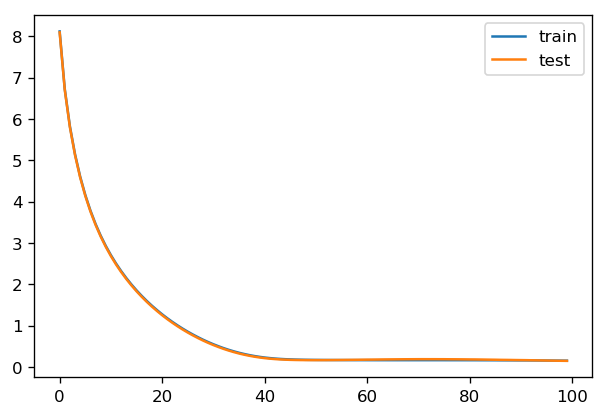

Test loss: 0.151353
Epoch 36, train loss: 0.309546
Epoch 37, train loss: 0.285242
Epoch 38, train loss: 0.264410
Epoch 39, train loss: 0.246656
Epoch 40, train loss: 0.231050
Epoch 41, train loss: 0.218219
Epoch 42, train loss: 0.207800
Epoch 43, train loss: 0.199160
Epoch 44, train loss: 0.192397
Epoch 45, train loss: 0.187079
Epoch 46, train loss: 0.183032
Epoch 47, train loss: 0.179964
Epoch 48, train loss: 0.177517
Epoch 49, train loss: 0.175722
Epoch 50, train loss: 0.174334
Epoch 51, train loss: 0.173251
Epoch 52, train loss: 0.172383
Epoch 53, train loss: 0.171729
Epoch 54, train loss: 0.171167
Epoch 55, train loss: 0.170744
Epoch 56, train loss: 0.170274
Epoch 57, train loss: 0.169972
Epoch 58, train loss: 0.169624
Epoch 59, train loss: 0.169444
Epoch 60, train loss: 0.169292
Epoch 61, train loss: 0.169065
Epoch 62, train loss: 0.168976
Epoch 63, train loss: 0.168932
Epoch 64, train loss: 0.168992
Epoch 65, train loss: 0.169022
Epoch 66, train loss: 0.169093
Epoch 67, train los

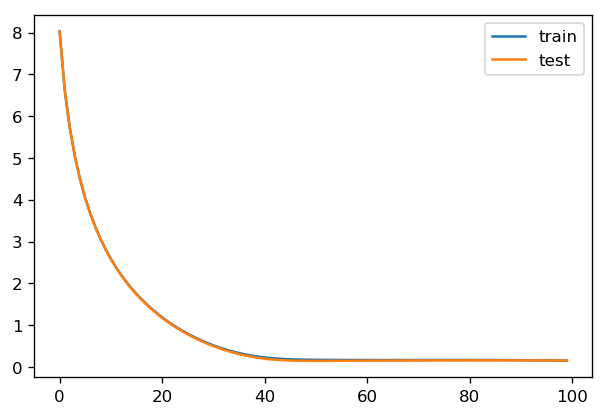

Test loss: 0.157693
Epoch 36, train loss: 0.315639
Epoch 37, train loss: 0.289757
Epoch 38, train loss: 0.267210
Epoch 39, train loss: 0.247690
Epoch 40, train loss: 0.231742
Epoch 41, train loss: 0.218038
Epoch 42, train loss: 0.206975
Epoch 43, train loss: 0.198374
Epoch 44, train loss: 0.191725
Epoch 45, train loss: 0.186724
Epoch 46, train loss: 0.182857
Epoch 47, train loss: 0.180079
Epoch 48, train loss: 0.177839
Epoch 49, train loss: 0.176199
Epoch 50, train loss: 0.174842
Epoch 51, train loss: 0.173806
Epoch 52, train loss: 0.172872
Epoch 53, train loss: 0.172130
Epoch 54, train loss: 0.171478
Epoch 55, train loss: 0.170884
Epoch 56, train loss: 0.170391
Epoch 57, train loss: 0.169879
Epoch 58, train loss: 0.169578
Epoch 59, train loss: 0.169307
Epoch 60, train loss: 0.169125
Epoch 61, train loss: 0.168945
Epoch 62, train loss: 0.168910
Epoch 63, train loss: 0.168853
Epoch 64, train loss: 0.168909
Epoch 65, train loss: 0.169032
Epoch 66, train loss: 0.169032
Epoch 67, train los

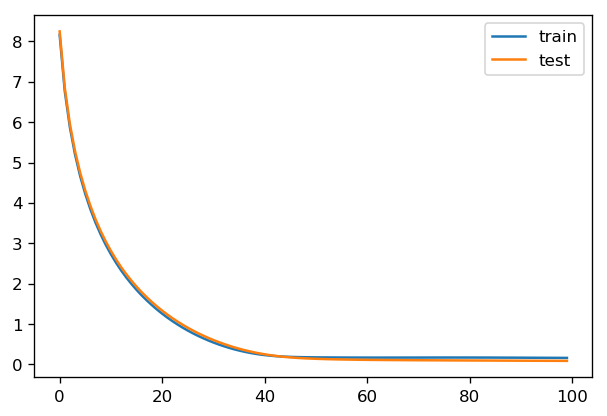

Test loss: 0.088118
Epoch 36, train loss: 0.324567
Epoch 37, train loss: 0.296717
Epoch 38, train loss: 0.272953
Epoch 39, train loss: 0.252290
Epoch 40, train loss: 0.234810
Epoch 41, train loss: 0.220023
Epoch 42, train loss: 0.208372
Epoch 43, train loss: 0.198931
Epoch 44, train loss: 0.191578
Epoch 45, train loss: 0.185920
Epoch 46, train loss: 0.181773
Epoch 47, train loss: 0.178710
Epoch 48, train loss: 0.176387
Epoch 49, train loss: 0.174716
Epoch 50, train loss: 0.173445
Epoch 51, train loss: 0.172408
Epoch 52, train loss: 0.171608
Epoch 53, train loss: 0.170910
Epoch 54, train loss: 0.170284
Epoch 55, train loss: 0.169780
Epoch 56, train loss: 0.169316
Epoch 57, train loss: 0.168953
Epoch 58, train loss: 0.168579
Epoch 59, train loss: 0.168229
Epoch 60, train loss: 0.167969
Epoch 61, train loss: 0.167740
Epoch 62, train loss: 0.167579
Epoch 63, train loss: 0.167505
Epoch 64, train loss: 0.167329
Epoch 65, train loss: 0.167323
Epoch 66, train loss: 0.167132
Epoch 67, train los

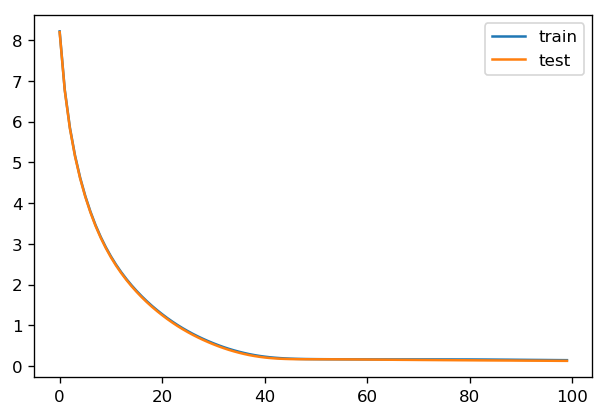

Test loss: 0.131478
Epoch 36, train loss: 0.328266
Epoch 37, train loss: 0.300846
Epoch 38, train loss: 0.276333
Epoch 39, train loss: 0.255414
Epoch 40, train loss: 0.237929
Epoch 41, train loss: 0.222858
Epoch 42, train loss: 0.210318
Epoch 43, train loss: 0.200326
Epoch 44, train loss: 0.192536
Epoch 45, train loss: 0.186656
Epoch 46, train loss: 0.182257
Epoch 47, train loss: 0.179069
Epoch 48, train loss: 0.176747
Epoch 49, train loss: 0.174866
Epoch 50, train loss: 0.173417
Epoch 51, train loss: 0.172281
Epoch 52, train loss: 0.171347
Epoch 53, train loss: 0.170475
Epoch 54, train loss: 0.169782
Epoch 55, train loss: 0.169118
Epoch 56, train loss: 0.168533
Epoch 57, train loss: 0.168017
Epoch 58, train loss: 0.167670
Epoch 59, train loss: 0.167198
Epoch 60, train loss: 0.166949
Epoch 61, train loss: 0.166771
Epoch 62, train loss: 0.166588
Epoch 63, train loss: 0.166501
Epoch 64, train loss: 0.166434
Epoch 65, train loss: 0.166233
Epoch 66, train loss: 0.166270
Epoch 67, train los

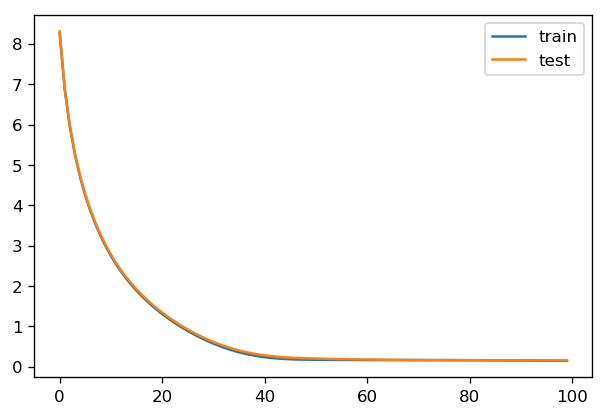

Test loss: 0.156803
Epoch 36, train loss: 0.356390
Epoch 37, train loss: 0.327691
Epoch 38, train loss: 0.301744
Epoch 39, train loss: 0.278889
Epoch 40, train loss: 0.258683
Epoch 41, train loss: 0.241847
Epoch 42, train loss: 0.226892
Epoch 43, train loss: 0.215165
Epoch 44, train loss: 0.205277
Epoch 45, train loss: 0.197139
Epoch 46, train loss: 0.190773
Epoch 47, train loss: 0.185900
Epoch 48, train loss: 0.182131
Epoch 49, train loss: 0.179349
Epoch 50, train loss: 0.177189
Epoch 51, train loss: 0.175564
Epoch 52, train loss: 0.174340
Epoch 53, train loss: 0.173388
Epoch 54, train loss: 0.172603
Epoch 55, train loss: 0.171980
Epoch 56, train loss: 0.171473
Epoch 57, train loss: 0.170957
Epoch 58, train loss: 0.170545
Epoch 59, train loss: 0.170134
Epoch 60, train loss: 0.169829
Epoch 61, train loss: 0.169504
Epoch 62, train loss: 0.169308
Epoch 63, train loss: 0.169051
Epoch 64, train loss: 0.168892
Epoch 65, train loss: 0.168660
Epoch 66, train loss: 0.168603
Epoch 67, train los

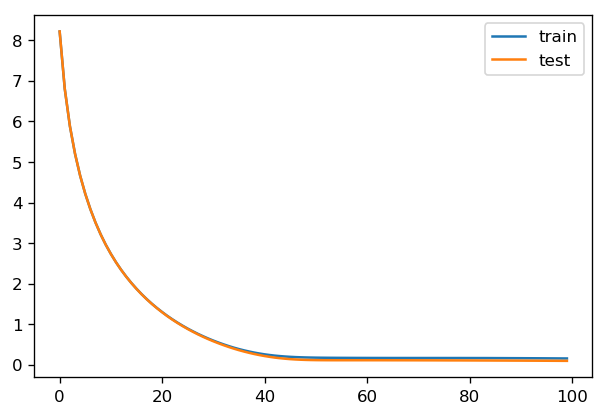

Test loss: 0.098077
Epoch 36, train loss: 0.294957
Epoch 37, train loss: 0.271949
Epoch 38, train loss: 0.252121
Epoch 39, train loss: 0.235249
Epoch 40, train loss: 0.221106
Epoch 41, train loss: 0.209534
Epoch 42, train loss: 0.200251
Epoch 43, train loss: 0.192958
Epoch 44, train loss: 0.187372
Epoch 45, train loss: 0.183223
Epoch 46, train loss: 0.180165
Epoch 47, train loss: 0.177808
Epoch 48, train loss: 0.176139
Epoch 49, train loss: 0.174771
Epoch 50, train loss: 0.173752
Epoch 51, train loss: 0.172937
Epoch 52, train loss: 0.172284
Epoch 53, train loss: 0.171723
Epoch 54, train loss: 0.171250
Epoch 55, train loss: 0.170869
Epoch 56, train loss: 0.170482
Epoch 57, train loss: 0.170220
Epoch 58, train loss: 0.170017
Epoch 59, train loss: 0.169822
Epoch 60, train loss: 0.169690
Epoch 61, train loss: 0.169617
Epoch 62, train loss: 0.169720
Epoch 63, train loss: 0.169646
Epoch 64, train loss: 0.169781
Epoch 65, train loss: 0.169789
Epoch 66, train loss: 0.170013
Epoch 67, train los

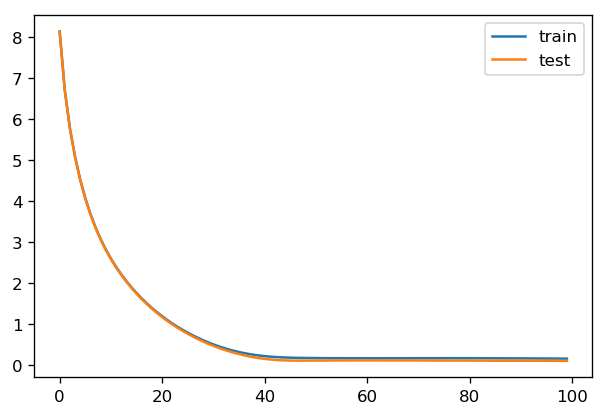

Test loss: 0.105743
Epoch 36, train loss: 0.281748
Epoch 37, train loss: 0.260239
Epoch 38, train loss: 0.241894
Epoch 39, train loss: 0.226546
Epoch 40, train loss: 0.213658
Epoch 41, train loss: 0.203563
Epoch 42, train loss: 0.195443
Epoch 43, train loss: 0.188966
Epoch 44, train loss: 0.184000
Epoch 45, train loss: 0.180311
Epoch 46, train loss: 0.177604
Epoch 47, train loss: 0.175529
Epoch 48, train loss: 0.174003
Epoch 49, train loss: 0.172817
Epoch 50, train loss: 0.171895
Epoch 51, train loss: 0.171176
Epoch 52, train loss: 0.170558
Epoch 53, train loss: 0.170025
Epoch 54, train loss: 0.169622
Epoch 55, train loss: 0.169323
Epoch 56, train loss: 0.168926
Epoch 57, train loss: 0.168726
Epoch 58, train loss: 0.168518
Epoch 59, train loss: 0.168354
Epoch 60, train loss: 0.168257
Epoch 61, train loss: 0.168260
Epoch 62, train loss: 0.168203
Epoch 63, train loss: 0.168321
Epoch 64, train loss: 0.168312
Epoch 65, train loss: 0.168437
Epoch 66, train loss: 0.168542
Epoch 67, train los

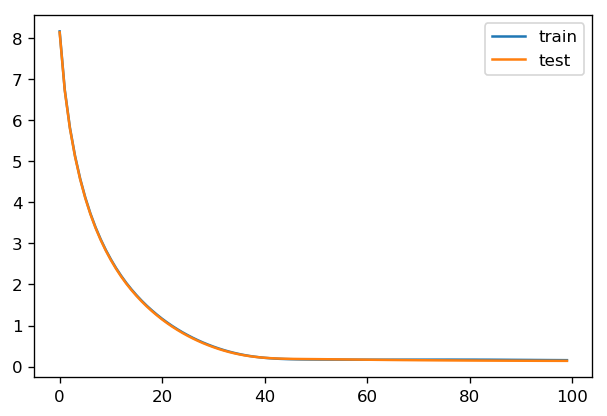

Test loss: 0.139715
Epoch 36, train loss: 0.283853
Epoch 37, train loss: 0.261189
Epoch 38, train loss: 0.241856
Epoch 39, train loss: 0.225834
Epoch 40, train loss: 0.212577
Epoch 41, train loss: 0.202003
Epoch 42, train loss: 0.194041
Epoch 43, train loss: 0.187820
Epoch 44, train loss: 0.183337
Epoch 45, train loss: 0.179850
Epoch 46, train loss: 0.177377
Epoch 47, train loss: 0.175510
Epoch 48, train loss: 0.174072
Epoch 49, train loss: 0.172995
Epoch 50, train loss: 0.172142
Epoch 51, train loss: 0.171405
Epoch 52, train loss: 0.170809
Epoch 53, train loss: 0.170308
Epoch 54, train loss: 0.169815
Epoch 55, train loss: 0.169513
Epoch 56, train loss: 0.169240
Epoch 57, train loss: 0.168940
Epoch 58, train loss: 0.168734
Epoch 59, train loss: 0.168588
Epoch 60, train loss: 0.168491
Epoch 61, train loss: 0.168538
Epoch 62, train loss: 0.168582
Epoch 63, train loss: 0.168680
Epoch 64, train loss: 0.168791
Epoch 65, train loss: 0.168876
Epoch 66, train loss: 0.169047
Epoch 67, train los

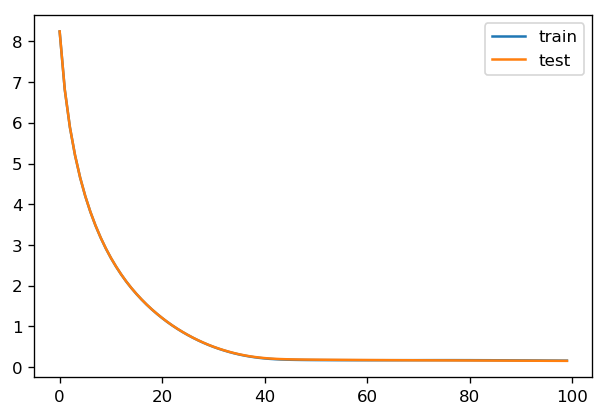

Test loss: 0.152647
Epoch 36, train loss: 0.317605
Epoch 37, train loss: 0.291307
Epoch 38, train loss: 0.268330
Epoch 39, train loss: 0.248876
Epoch 40, train loss: 0.232555
Epoch 41, train loss: 0.218964
Epoch 42, train loss: 0.207627
Epoch 43, train loss: 0.198629
Epoch 44, train loss: 0.191667
Epoch 45, train loss: 0.186199
Epoch 46, train loss: 0.182040
Epoch 47, train loss: 0.178857
Epoch 48, train loss: 0.176437
Epoch 49, train loss: 0.174739
Epoch 50, train loss: 0.173416
Epoch 51, train loss: 0.172421
Epoch 52, train loss: 0.171652
Epoch 53, train loss: 0.171039
Epoch 54, train loss: 0.170501
Epoch 55, train loss: 0.170077
Epoch 56, train loss: 0.169684
Epoch 57, train loss: 0.169501
Epoch 58, train loss: 0.169253
Epoch 59, train loss: 0.169048
Epoch 60, train loss: 0.168866
Epoch 61, train loss: 0.168831
Epoch 62, train loss: 0.168828
Epoch 63, train loss: 0.168709
Epoch 64, train loss: 0.168810
Epoch 65, train loss: 0.169007
Epoch 66, train loss: 0.169002
Epoch 67, train los

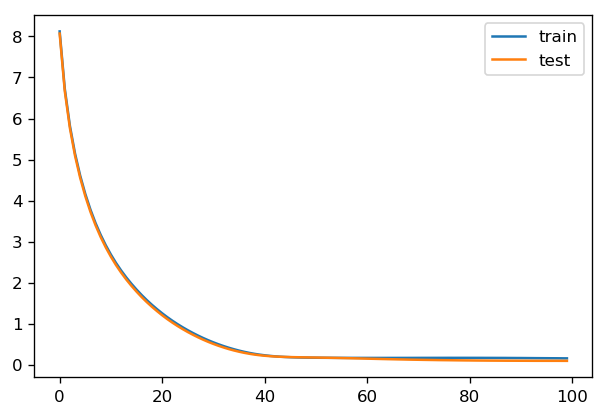

Test loss: 0.097210
Epoch 36, train loss: 0.329082
Epoch 37, train loss: 0.302380
Epoch 38, train loss: 0.279473
Epoch 39, train loss: 0.259265
Epoch 40, train loss: 0.241820
Epoch 41, train loss: 0.227495
Epoch 42, train loss: 0.215281
Epoch 43, train loss: 0.205221
Epoch 44, train loss: 0.197132
Epoch 45, train loss: 0.190833
Epoch 46, train loss: 0.185889
Epoch 47, train loss: 0.182071
Epoch 48, train loss: 0.179361
Epoch 49, train loss: 0.177158
Epoch 50, train loss: 0.175490
Epoch 51, train loss: 0.174184
Epoch 52, train loss: 0.173146
Epoch 53, train loss: 0.172270
Epoch 54, train loss: 0.171491
Epoch 55, train loss: 0.170869
Epoch 56, train loss: 0.170306
Epoch 57, train loss: 0.169833
Epoch 58, train loss: 0.169409
Epoch 59, train loss: 0.169117
Epoch 60, train loss: 0.168797
Epoch 61, train loss: 0.168780
Epoch 62, train loss: 0.168694
Epoch 63, train loss: 0.168861
Epoch 64, train loss: 0.168829
Epoch 65, train loss: 0.168999
Epoch 66, train loss: 0.169182
Epoch 67, train los

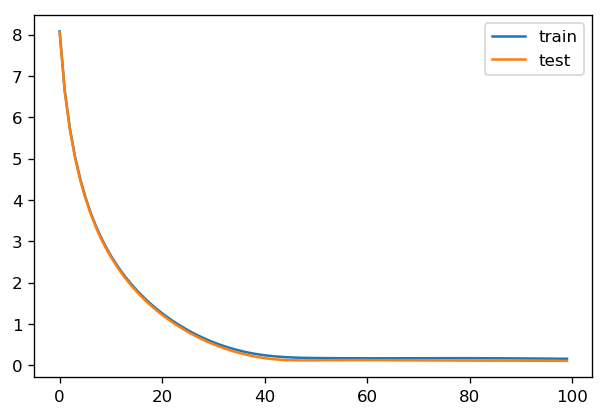

Test loss: 0.106548
Epoch 36, train loss: 0.346587
Epoch 37, train loss: 0.318635
Epoch 38, train loss: 0.293804
Epoch 39, train loss: 0.271900
Epoch 40, train loss: 0.252634
Epoch 41, train loss: 0.236368
Epoch 42, train loss: 0.222794
Epoch 43, train loss: 0.211333
Epoch 44, train loss: 0.202019
Epoch 45, train loss: 0.194595
Epoch 46, train loss: 0.188666
Epoch 47, train loss: 0.184068
Epoch 48, train loss: 0.180551
Epoch 49, train loss: 0.177790
Epoch 50, train loss: 0.175694
Epoch 51, train loss: 0.174128
Epoch 52, train loss: 0.172886
Epoch 53, train loss: 0.171941
Epoch 54, train loss: 0.171183
Epoch 55, train loss: 0.170621
Epoch 56, train loss: 0.170129
Epoch 57, train loss: 0.169757
Epoch 58, train loss: 0.169462
Epoch 59, train loss: 0.169215
Epoch 60, train loss: 0.168995
Epoch 61, train loss: 0.168801
Epoch 62, train loss: 0.168762
Epoch 63, train loss: 0.168797
Epoch 64, train loss: 0.168748
Epoch 65, train loss: 0.168910
Epoch 66, train loss: 0.168977
Epoch 67, train los

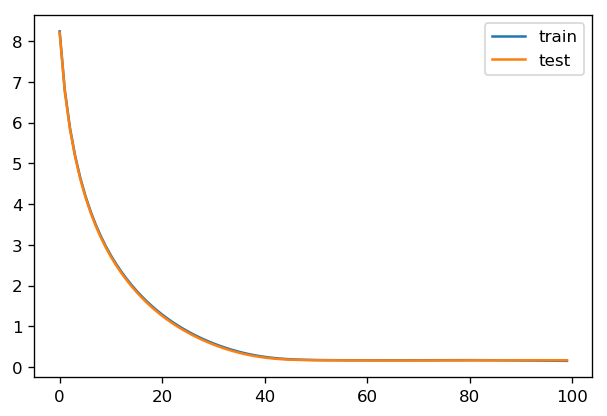

Test loss: 0.170024
Epoch 36, train loss: 0.332762
Epoch 37, train loss: 0.306608
Epoch 38, train loss: 0.282797
Epoch 39, train loss: 0.262377
Epoch 40, train loss: 0.244645
Epoch 41, train loss: 0.229351
Epoch 42, train loss: 0.216722
Epoch 43, train loss: 0.206303
Epoch 44, train loss: 0.197897
Epoch 45, train loss: 0.191502
Epoch 46, train loss: 0.186251
Epoch 47, train loss: 0.182262
Epoch 48, train loss: 0.179257
Epoch 49, train loss: 0.177071
Epoch 50, train loss: 0.175393
Epoch 51, train loss: 0.174113
Epoch 52, train loss: 0.173122
Epoch 53, train loss: 0.172327
Epoch 54, train loss: 0.171615
Epoch 55, train loss: 0.171033
Epoch 56, train loss: 0.170521
Epoch 57, train loss: 0.170011
Epoch 58, train loss: 0.169654
Epoch 59, train loss: 0.169302
Epoch 60, train loss: 0.168920
Epoch 61, train loss: 0.168599
Epoch 62, train loss: 0.168332
Epoch 63, train loss: 0.168194
Epoch 64, train loss: 0.168006
Epoch 65, train loss: 0.167922
Epoch 66, train loss: 0.167880
Epoch 67, train los

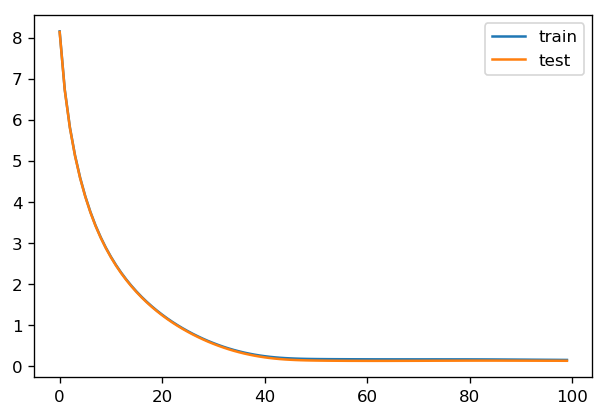

Test loss: 0.132933
Epoch 36, train loss: 0.275242
Epoch 37, train loss: 0.254839
Epoch 38, train loss: 0.237383
Epoch 39, train loss: 0.223273
Epoch 40, train loss: 0.211129
Epoch 41, train loss: 0.201768
Epoch 42, train loss: 0.194222
Epoch 43, train loss: 0.188481
Epoch 44, train loss: 0.183934
Epoch 45, train loss: 0.180564
Epoch 46, train loss: 0.178086
Epoch 47, train loss: 0.176190
Epoch 48, train loss: 0.174719
Epoch 49, train loss: 0.173644
Epoch 50, train loss: 0.172787
Epoch 51, train loss: 0.172095
Epoch 52, train loss: 0.171491
Epoch 53, train loss: 0.171047
Epoch 54, train loss: 0.170600
Epoch 55, train loss: 0.170300
Epoch 56, train loss: 0.170010
Epoch 57, train loss: 0.169836
Epoch 58, train loss: 0.169606
Epoch 59, train loss: 0.169529
Epoch 60, train loss: 0.169442
Epoch 61, train loss: 0.169511
Epoch 62, train loss: 0.169562
Epoch 63, train loss: 0.169673
Epoch 64, train loss: 0.169806
Epoch 65, train loss: 0.169873
Epoch 66, train loss: 0.170109
Epoch 67, train los

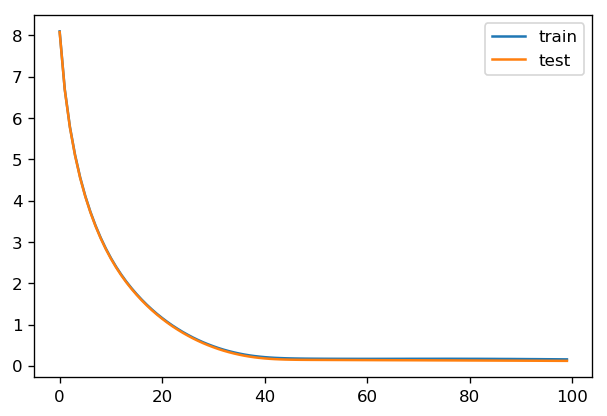

Test loss: 0.121222
Epoch 36, train loss: 0.294294
Epoch 37, train loss: 0.270288
Epoch 38, train loss: 0.249487
Epoch 39, train loss: 0.231916
Epoch 40, train loss: 0.217336
Epoch 41, train loss: 0.205586
Epoch 42, train loss: 0.196398
Epoch 43, train loss: 0.189442
Epoch 44, train loss: 0.184144
Epoch 45, train loss: 0.180241
Epoch 46, train loss: 0.177436
Epoch 47, train loss: 0.175362
Epoch 48, train loss: 0.173799
Epoch 49, train loss: 0.172593
Epoch 50, train loss: 0.171690
Epoch 51, train loss: 0.170954
Epoch 52, train loss: 0.170311
Epoch 53, train loss: 0.169788
Epoch 54, train loss: 0.169241
Epoch 55, train loss: 0.168792
Epoch 56, train loss: 0.168497
Epoch 57, train loss: 0.168215
Epoch 58, train loss: 0.167894
Epoch 59, train loss: 0.167714
Epoch 60, train loss: 0.167559
Epoch 61, train loss: 0.167467
Epoch 62, train loss: 0.167435
Epoch 63, train loss: 0.167269
Epoch 64, train loss: 0.167315
Epoch 65, train loss: 0.167409
Epoch 66, train loss: 0.167354
Epoch 67, train los

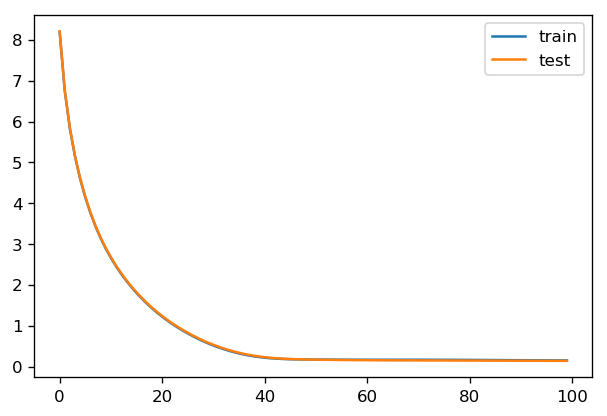

Test loss: 0.140113
Epoch 36, train loss: 0.320082
Epoch 37, train loss: 0.293250
Epoch 38, train loss: 0.269181
Epoch 39, train loss: 0.249103
Epoch 40, train loss: 0.231888
Epoch 41, train loss: 0.217077
Epoch 42, train loss: 0.205361
Epoch 43, train loss: 0.196016
Epoch 44, train loss: 0.188856
Epoch 45, train loss: 0.183447
Epoch 46, train loss: 0.179312
Epoch 47, train loss: 0.176567
Epoch 48, train loss: 0.174550
Epoch 49, train loss: 0.172960
Epoch 50, train loss: 0.171869
Epoch 51, train loss: 0.170929
Epoch 52, train loss: 0.170175
Epoch 53, train loss: 0.169531
Epoch 54, train loss: 0.168939
Epoch 55, train loss: 0.168353
Epoch 56, train loss: 0.167990
Epoch 57, train loss: 0.167529
Epoch 58, train loss: 0.167059
Epoch 59, train loss: 0.166757
Epoch 60, train loss: 0.166509
Epoch 61, train loss: 0.166172
Epoch 62, train loss: 0.165998
Epoch 63, train loss: 0.165860
Epoch 64, train loss: 0.165616
Epoch 65, train loss: 0.165421
Epoch 66, train loss: 0.165202
Epoch 67, train los

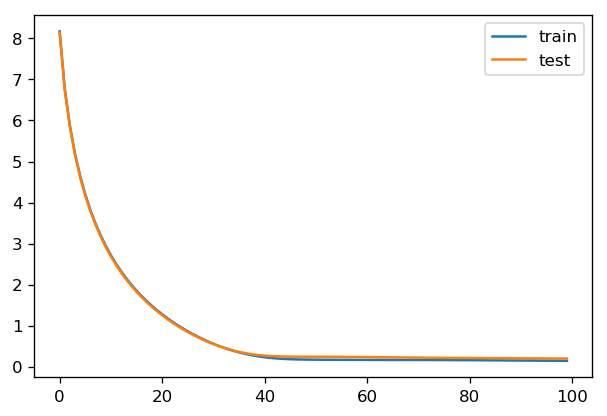

Test loss: 0.199252
Epoch 36, train loss: 0.283046
Epoch 37, train loss: 0.260617
Epoch 38, train loss: 0.241674
Epoch 39, train loss: 0.226252
Epoch 40, train loss: 0.213583
Epoch 41, train loss: 0.203147
Epoch 42, train loss: 0.195302
Epoch 43, train loss: 0.189049
Epoch 44, train loss: 0.184403
Epoch 45, train loss: 0.180810
Epoch 46, train loss: 0.178227
Epoch 47, train loss: 0.176249
Epoch 48, train loss: 0.174695
Epoch 49, train loss: 0.173554
Epoch 50, train loss: 0.172696
Epoch 51, train loss: 0.172012
Epoch 52, train loss: 0.171453
Epoch 53, train loss: 0.170988
Epoch 54, train loss: 0.170548
Epoch 55, train loss: 0.170271
Epoch 56, train loss: 0.169988
Epoch 57, train loss: 0.169833
Epoch 58, train loss: 0.169565
Epoch 59, train loss: 0.169525
Epoch 60, train loss: 0.169496
Epoch 61, train loss: 0.169471
Epoch 62, train loss: 0.169507
Epoch 63, train loss: 0.169671
Epoch 64, train loss: 0.169894
Epoch 65, train loss: 0.169911
Epoch 66, train loss: 0.170091
Epoch 67, train los

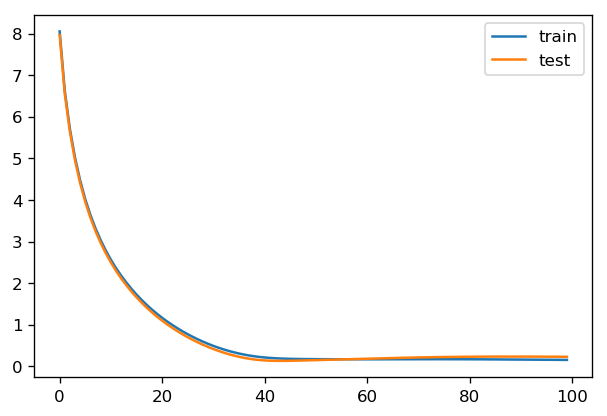

Test loss: 0.230139
Epoch 36, train loss: 0.251098
Epoch 37, train loss: 0.233876
Epoch 38, train loss: 0.219818
Epoch 39, train loss: 0.208273
Epoch 40, train loss: 0.199103
Epoch 41, train loss: 0.191946
Epoch 42, train loss: 0.186482
Epoch 43, train loss: 0.182287
Epoch 44, train loss: 0.179077
Epoch 45, train loss: 0.176718
Epoch 46, train loss: 0.174891
Epoch 47, train loss: 0.173511
Epoch 48, train loss: 0.172527
Epoch 49, train loss: 0.171762
Epoch 50, train loss: 0.171136
Epoch 51, train loss: 0.170622
Epoch 52, train loss: 0.170201
Epoch 53, train loss: 0.169808
Epoch 54, train loss: 0.169544
Epoch 55, train loss: 0.169286
Epoch 56, train loss: 0.169229
Epoch 57, train loss: 0.169035
Epoch 58, train loss: 0.169016
Epoch 59, train loss: 0.168951
Epoch 60, train loss: 0.168998
Epoch 61, train loss: 0.169143
Epoch 62, train loss: 0.169271
Epoch 63, train loss: 0.169449
Epoch 64, train loss: 0.169591
Epoch 65, train loss: 0.169952
Epoch 66, train loss: 0.170000
Epoch 67, train los

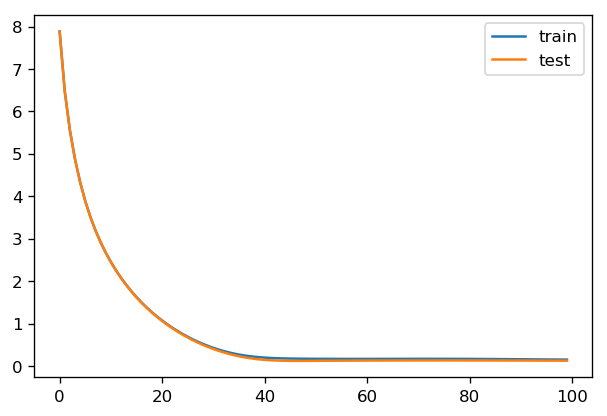

Test loss: 0.126995
Epoch 36, train loss: 0.316846
Epoch 37, train loss: 0.291067
Epoch 38, train loss: 0.268304
Epoch 39, train loss: 0.249131
Epoch 40, train loss: 0.232604
Epoch 41, train loss: 0.219158
Epoch 42, train loss: 0.208133
Epoch 43, train loss: 0.199588
Epoch 44, train loss: 0.192226
Epoch 45, train loss: 0.187006
Epoch 46, train loss: 0.182718
Epoch 47, train loss: 0.179561
Epoch 48, train loss: 0.176980
Epoch 49, train loss: 0.175211
Epoch 50, train loss: 0.173865
Epoch 51, train loss: 0.172767
Epoch 52, train loss: 0.171946
Epoch 53, train loss: 0.171273
Epoch 54, train loss: 0.170704
Epoch 55, train loss: 0.170230
Epoch 56, train loss: 0.169817
Epoch 57, train loss: 0.169396
Epoch 58, train loss: 0.169112
Epoch 59, train loss: 0.168842
Epoch 60, train loss: 0.168573
Epoch 61, train loss: 0.168441
Epoch 62, train loss: 0.168274
Epoch 63, train loss: 0.168132
Epoch 64, train loss: 0.168063
Epoch 65, train loss: 0.168017
Epoch 66, train loss: 0.167992
Epoch 67, train los

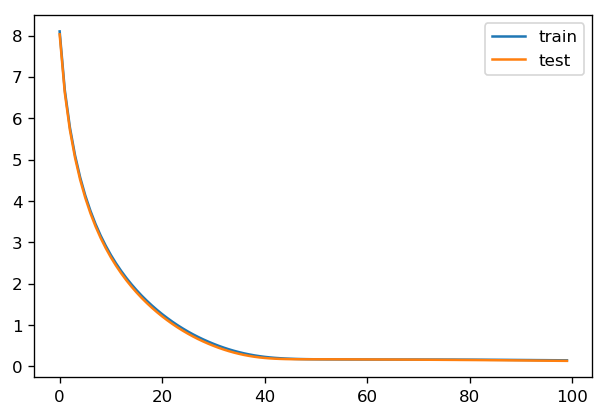

Test loss: 0.135725
Epoch 36, train loss: 0.298249
Epoch 37, train loss: 0.274904
Epoch 38, train loss: 0.254414
Epoch 39, train loss: 0.237091
Epoch 40, train loss: 0.222672
Epoch 41, train loss: 0.210963
Epoch 42, train loss: 0.201675
Epoch 43, train loss: 0.194239
Epoch 44, train loss: 0.188320
Epoch 45, train loss: 0.183862
Epoch 46, train loss: 0.180396
Epoch 47, train loss: 0.177766
Epoch 48, train loss: 0.175831
Epoch 49, train loss: 0.174371
Epoch 50, train loss: 0.173208
Epoch 51, train loss: 0.172292
Epoch 52, train loss: 0.171528
Epoch 53, train loss: 0.170931
Epoch 54, train loss: 0.170372
Epoch 55, train loss: 0.169860
Epoch 56, train loss: 0.169431
Epoch 57, train loss: 0.169098
Epoch 58, train loss: 0.168640
Epoch 59, train loss: 0.168377
Epoch 60, train loss: 0.168175
Epoch 61, train loss: 0.167934
Epoch 62, train loss: 0.167714
Epoch 63, train loss: 0.167610
Epoch 64, train loss: 0.167453
Epoch 65, train loss: 0.167588
Epoch 66, train loss: 0.167484
Epoch 67, train los

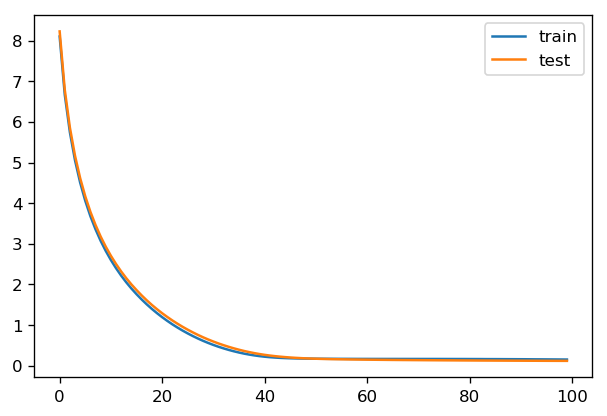

Test loss: 0.120310
Epoch 36, train loss: 0.300487
Epoch 37, train loss: 0.275923
Epoch 38, train loss: 0.254575
Epoch 39, train loss: 0.236561
Epoch 40, train loss: 0.221287
Epoch 41, train loss: 0.209024
Epoch 42, train loss: 0.199025
Epoch 43, train loss: 0.191500
Epoch 44, train loss: 0.185683
Epoch 45, train loss: 0.181392
Epoch 46, train loss: 0.178108
Epoch 47, train loss: 0.175721
Epoch 48, train loss: 0.173878
Epoch 49, train loss: 0.172485
Epoch 50, train loss: 0.171423
Epoch 51, train loss: 0.170543
Epoch 52, train loss: 0.169804
Epoch 53, train loss: 0.169172
Epoch 54, train loss: 0.168643
Epoch 55, train loss: 0.168182
Epoch 56, train loss: 0.167732
Epoch 57, train loss: 0.167378
Epoch 58, train loss: 0.167064
Epoch 59, train loss: 0.166732
Epoch 60, train loss: 0.166625
Epoch 61, train loss: 0.166398
Epoch 62, train loss: 0.166235
Epoch 63, train loss: 0.166188
Epoch 64, train loss: 0.166083
Epoch 65, train loss: 0.165995
Epoch 66, train loss: 0.166053
Epoch 67, train los

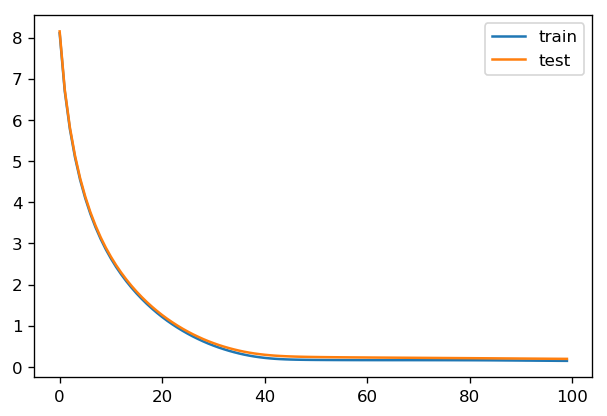

Test loss: 0.197296
50-fold validation: Avg train loss: 0.154830, Avg test loss: 0.160569


In [207]:
k = 50
epochs = 100#80#100#80#100
verbose_epoch = 35#75#95
learning_rate = 0.01 #0.001 0.24
weight_decay = 130 #200#80 #100.0 #20
train_loss, test_loss = k_fold_cross_valid(k, epochs, verbose_epoch, X_train,
                                           y_train, learning_rate, weight_decay)
print("%d-fold validation: Avg train loss: %f, Avg test loss: %f" %
      (k, train_loss, test_loss))


<div class="alert alert-warning">
By looking at the average values,our stacked model is the best.</div>

<div class="alert alert-danger">
<h2>Conclusions and Remarks</h2>
<ul><li>The best model seems to be the stacked one.</li>
    <li>Other ideas would be to following a bayesian inference approach and implementing a gaussian process which we will not do for the lack of time and since we have a large dataset and inverting it takes time.</li>
    <li>Deepnets could produce better results but need a lot of tweaking and experimenting.</li>
    <li>Getting a lower RMSE needs experimenting with various things. We have no perfect data not perfect data that can give us perfect results,we just have to try.</li>
    <li>Some cells were not run again since they take too much time.</li></ul> 
    </div>

<div class="alert alert-info">
<h2>References</h2><br>

A big thanks goes to Prof. Pietro Michiardi and the teaching assistant for answering my questions and guiding me.<br><br>
The following is al ist of references we used:<br>
https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/<br>
https://machinelearningmastery.com/an-introduction-to-feature-selection/<br>
http://jmlr.csail.mit.edu/papers/volume3/guyon03a/guyon03a.pdf<br>
https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/<br>
https://codingstartups.com/practical-machine-learning-ridge-regression-vs-lasso/<br>
https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/https://codingstartups.com/practical-machine-learning-ridge-regression-vs-lasso/<br>
https://www.kaggle.com/erikbruin/house-prices-lasso-xgboost-and-a-detailed-eda<br>
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard<br>
http://blog.kaggle.com/2017/06/15/stacking-made-easy-an-introduction-to-stacknet-by-competitions-grandmaster-marios-michailidis-kazanova/<br>
https://www.kaggle.com/agehsbarg/top-10-0-10943-stacking-mice-and-brutal-force<br>
https://www.kaggle.com/humananalog/xgboost-lasso<br>
https://www.kaggle.com/apapiu/regularized-linear-models<br>
http://ww2.amstat.org/publications/jse/v19n3/Decock/DataDocumentation.txt<br>
https://www.kaggle.com/harunshimanto/house-price-prediction<br>
</div>